In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
import os 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import hamming

In [29]:
data = pd.read_csv("dataset_graphcomponent.csv")
synomy_data = data[data['relation']=='S']
print (synomy_data)

                w0          w1 relation  component
0      unnecessary    unneeded        S          0
3      undesirable    unwanted        S          0
11          single  individual        S          0
12          single   unmarried        S          0
18            best        good        S          0
...            ...         ...      ...        ...
99826        order  commission        S          0
99827       pursue     imitate        S          0
99828          saw        find        S          0
99830          fix        rest        S          0
99831          hug     embrace        S          0

[86257 rows x 4 columns]


In [30]:
print (len(set(synomy_data["w1"])) - len(set(synomy_data["w0"])))

2783


In [31]:
W1 = list(set(synomy_data["w1"]))
W1 = np.array(W1)
print ("Length W1 = ",len(W1))
W0 = list(set(synomy_data["w0"]))
W0 = np.array(W0)
print ("Length W0 = ",len(W0))

Length W1 =  25259
Length W0 =  22476


In [32]:
print (W1)

['mask' 'ineffective' 'blowhole' ... 'fice' 'tugboat' 'blockheaded']


In [33]:
print (W0)

['mask' 'ineffective' 'weirdo' ... 'dumping' 'tugboat' 'blockheaded']


In [34]:
print (len(set([w for w in W0 if len(w)==4])))

1440


In [35]:
four_words = [w for w in W0 if len(w)==4]

In [42]:
#import RNA
edges = []
for w0 in four_words : 
    for w1 in four_words :
        if hamming(w0, w1) == 1 : 
            edges.append((w0,w1))
        

In [44]:
print (len(edges))

2072160


In [46]:
import networkx as nx 
import matplotlib.pyplot as plt 
G_four = nx.Graph()
G_four.add_edges_from(edges)

print (len(list(nx.connected_component_subgraphs(G_four))))


AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

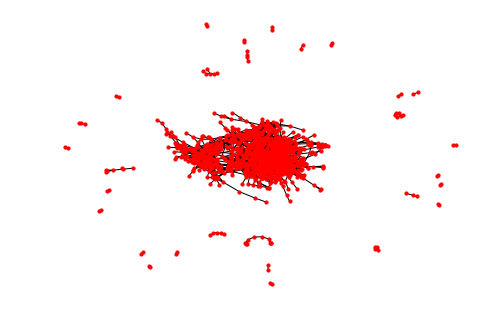

In [69]:
nx.draw(G_four, node_size=10)
plt.show()

In [72]:

for g in list(nx.connected_component_subgraphs(G_four)) : 
    if len(g.nodes)==1275 : 
        Gian = g 

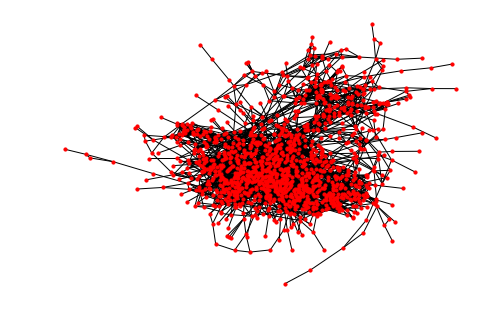

In [73]:
nx.draw(Gian, node_size=10)
plt.show()

In [7]:
Edges = []
for word in W0 [:1000] : 
    for w in synomy_data[synomy_data["w0"]==word]['w1']: 
        Edges.append((word,w))
    

In [8]:
import networkx as nx 
import matplotlib.pyplot as plt

691


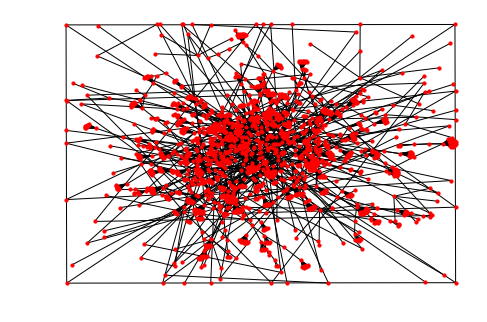

In [70]:
G = nx.Graph()
G.add_edges_from(Edges)
print len(list(nx.connected_component_subgraphs(G)))
tria

for G in list(nx.connected_component_subgraphs(G)):
    A = nx.to_numpy_matrix(G)
    if np.trace(np.linalg.matrix_power(A, 3))/6. >=1 : 
        nx.draw(G, node_size=10)
plt.show()

In [47]:
df = pd.read_csv("freqVSSyn.csv")

print (df)

       Unnamed: 0        word    frequence  number_of_edges
0               0        fawn     761340.0              6.0
1               1   deferment     342709.0              1.0
2               2       woods   14647735.0              1.0
3               3     clotted      89781.0              4.0
4               4     hanging   10190519.0              6.0
...           ...         ...          ...              ...
20669       20669     rotting     606382.0              4.0
20670       20670       space  121505269.0              4.0
20671       20671   northerly     479948.0              4.0
20672       20672  untalented      36419.0              1.0
20673       20673     jawbone     116777.0              2.0

[20674 rows x 4 columns]


In [48]:
dict_df = {}
for key in set(df['number_of_edges']): 
    dict_df[key] = list(df[df['number_of_edges']==key]['frequence'])

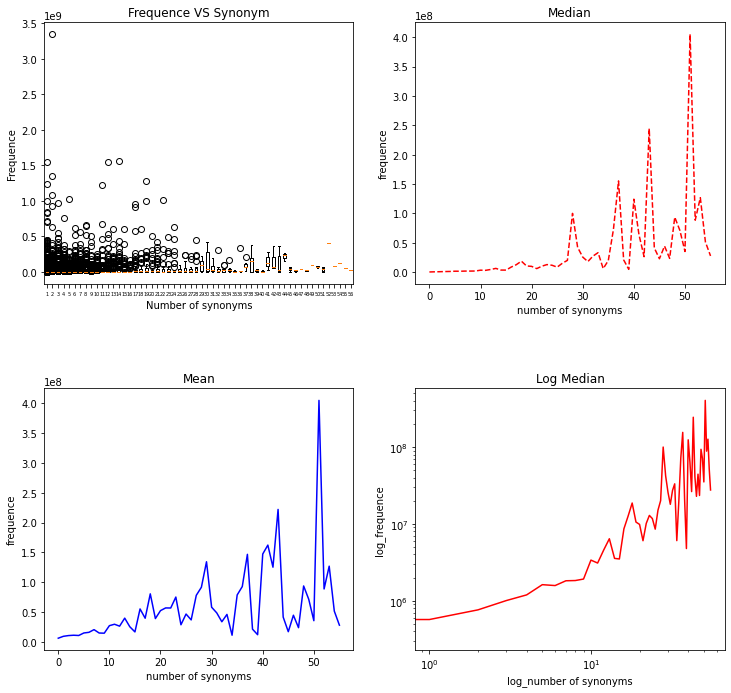

In [52]:
from pylab import rcParams
left = 0.225  # the left side of the subplots of the figure
right = 1.8   # the right side of the subplots of the figure
bottom = 0.02  # the bottom of the subplots of the figure
top = 2.2   # the top of the subplots of the figure
wspace = 0.2  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.4
fit = True #Display the fitting line on the plot or not
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

plt.subplot(2,2,1)
plt.title('Frequence VS Synonym')
plt.xlabel("Number of synonyms")
plt.ylabel("Frequence")
plt.tick_params(axis='x', labelsize=5)
plt.boxplot(dict_df.values())

plt.subplot(2,2,4)
plt.title('Log Median')
plt.xlabel("log_number of synonyms")
plt.ylabel("log_frequence")
plt.loglog(medians, color="red")


plt.subplot(2,2,2)
plt.title('Median')
plt.xlabel("number of synonyms")
plt.ylabel("frequence")
plt.plot(medians, 'r--')


plt.subplot(2,2,3)
plt.title('Mean')
plt.xlabel("number of synonyms")
plt.ylabel("frequence")
plt.plot(means, color="blue")
plt.savefig("freqVSsyn.pdf")

plt.show()

In [50]:
means =[]
medians =[]

for key in dict_df.keys() :
    means.append(np.mean(dict_df[key]))
    medians.append(np.median(dict_df[key]))

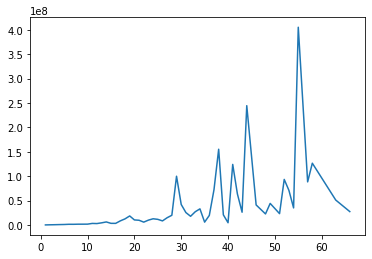

In [51]:
plt.plot(dict_df.keys(),medians)
plt.show()

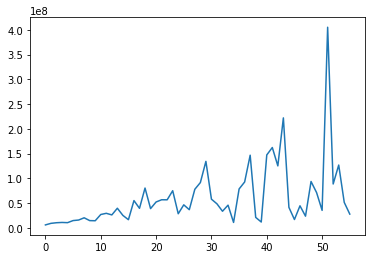

In [53]:
plt.plot(means)
plt.show()

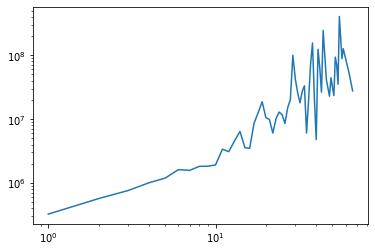

In [54]:
plt.loglog(dict_df.keys(),medians)
plt.show()

In [55]:
ricci_data = pd.read_csv("ricciVSfreq.csv")

print (ricci_data)

       Unnamed: 0             word  adj_ricci_avg    frequency
0               0             awed       0.500000     226844.0
1               1            china       0.250000  124472054.0
2               2  unprepossessing       1.000000      16233.0
3               3     introversion       0.666667      64498.0
4               4         geminate      -0.397205      18583.0
...           ...              ...            ...          ...
20669       20669           loathe       0.625000     340224.0
20670       20670        befuddled      -0.205080     107136.0
20671       20671          diamond       0.250000   39573067.0
20672       20672            fatty      -0.254762    5363547.0
20673       20673             ring      -0.301748   54342432.0

[20674 rows x 4 columns]


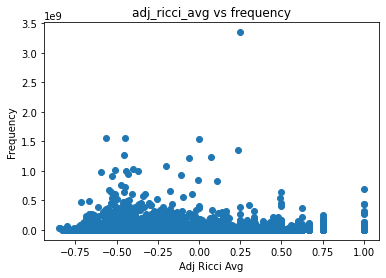

In [56]:
plt.scatter(ricci_data["adj_ricci_avg"],ricci_data["frequency"])
plt.xlabel("Adj Ricci Avg")
plt.ylabel("Frequency")
plt.title("adj_ricci_avg vs frequency")
plt.savefig("scatter.pdf")
plt.show()

In [57]:
len(set(ricci_data["adj_ricci_avg"])), len(set(ricci_data["frequency"]))

(13297, 20511)

In [58]:
dict_df = {}
for key in set(ricci_data['adj_ricci_avg']): 
    dict_df[key] = list(ricci_data[ricci_data['adj_ricci_avg']==key]['frequency'])

In [60]:
ricci_median = []
adj_ricci_avg = []
for key in dict_df.keys() :
    ricci_median.append(np.median(dict_df[key]))
    adj_ricci_avg.append(key)

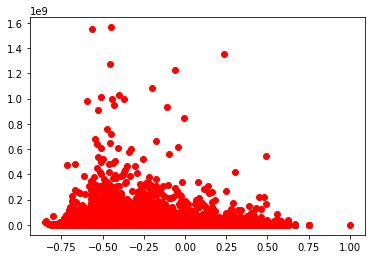

In [61]:
plt.plot(adj_ricci_avg, ricci_median, "ro")
plt.show()

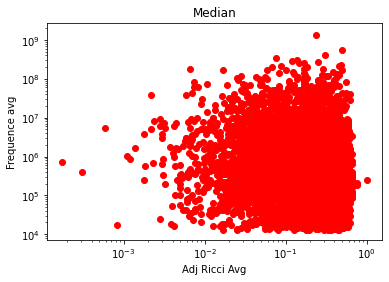

In [62]:
plt.loglog(adj_ricci_avg,ricci_median, 'ro')
plt.xlabel("Adj Ricci Avg")
plt.ylabel("Frequence avg")
plt.title("Median")
plt.savefig("median_ricci.pdf")
plt.show()

In [64]:
ricci_vs_degree =[]
for line in ricci_data.values:
    ricci_vs_degree.append([line[2],float(df[df['word']==line[1]]['number_of_edges'] )])

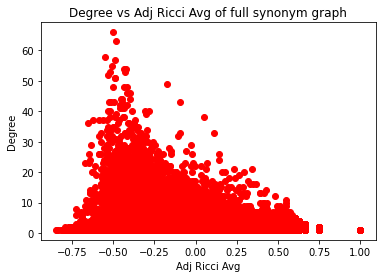

In [65]:
ricci_vs_degree = np.array(ricci_vs_degree)

plt.plot(ricci_vs_degree[:,0], ricci_vs_degree[:,1], "ro")
plt.xlabel("Adj Ricci Avg")
plt.ylabel("Degree")
plt.title("Degree vs Adj Ricci Avg of full synonym graph")
plt.savefig("dgVSadvricci.pdf")
plt.show()

In [68]:
ricci4letter_vs_degree =[]
for line in ricci_data.values:
    if len(line[1]) == 4 : 
        ricci4letter_vs_degree.append([line[2],float(df[df['word']==line[1]]['number_of_edges'] )])
print (len(ricci4letter_vs_degree))

1424


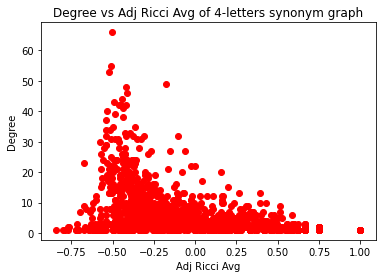

In [69]:
ricci4letter_vs_degree = np.array(ricci4letter_vs_degree)

plt.plot(ricci4letter_vs_degree[:,0], ricci4letter_vs_degree[:,1], "ro")
plt.xlabel("Adj Ricci Avg")
plt.ylabel("Degree")
plt.title("Degree vs Adj Ricci Avg of 4-letters synonym graph")
plt.savefig("dgVSadvricci_4letters.pdf")
plt.show()

In [70]:
ricci_data_plus = pd.read_csv("ricci.csv")
print (ricci_data_plus)

       Unnamed: 0           w0          w1     ricci
0               0  unnecessary    unneeded  0.250000
1               1  undesirable    unwanted  0.500000
2               2       single  individual -0.549020
3               3       single   unmarried -0.444444
4               4         best        good -0.092832
...           ...          ...         ...       ...
86252       86252        order  commission -0.784038
86253       86253       pursue     imitate -0.425000
86254       86254          saw        find -0.610000
86255       86255          fix        rest -0.833077
86256       86256          hug     embrace -0.380952

[86257 rows x 4 columns]


In [71]:
ricci_4letter_edges = []
for line in ricci_data_plus.values : 
    if len(line[1]) == 4 and  len(line[2]) == 4 :
        ricci_4letter_edges.append(tuple(line))


In [72]:
class FilterFunction(object) : 

    def __init__(self, word):
        self.word = word
        
    def wordFilter(self, tupl) : 
        if (tupl[1] == self.word or tupl[2] == self.word ) and tupl[3]<0 : 
            return tupl

In [75]:

dict_edge_with_negricci = {}
number_of_edges = {}
for line in ricci_data.values: 
    if len(line[1]) == 4 : 
        list_ = list(filter(FilterFunction(line[1]).wordFilter, ricci_4letter_edges))
        number_of_edges[line[1]] = list_
        dict_edge_with_negricci[line[1]] = len(list_)
 

In [76]:
graph_4 = pd.read_csv("graph_data.csv")
graph_4

,Unnamed: 0,word,degree,neighbor
0,0,fawn,6.0,"['lawn', 'pawn', 'faun', 'yawn', 'fain', 'dawn']"
1,1,hats,19.0,"['vats', 'hays', 'hits', 'haws', 'rats', 'hams..."
2,2,foul,6.0,"['fool', 'fowl', 'foal', 'soul', 'four', 'foil']"
3,3,four,8.0,"['dour', 'hour', 'lour', 'pour', 'tour', 'sour..."
4,4,hate,15.0,"['hake', 'bate', 'fate', 'hare', 'rate', 'late..."
...,...,...,...,...
2252,2252,rule,6.0,"['pule', 'ruse', 'rile', 'role', 'rune', 'mule']"
2253,2253,yell,9.0,"['sell', 'yelp', 'bell', 'well', 'dell', 'cell..."
2254,2254,pods,13.0,"['mods', 'pols', 'sods', 'gods', 'bods', 'pots..."
2255,2255,sash,10.0,"['gash', 'hash', 'sass', 'cash', 'rash', 'mash..."


In [77]:
neg_ricci4letter_vs_degree =[]
for key in dict_edge_with_negricci.keys():
    if not graph_4[graph_4['word']==key]['degree'].empty : 
        neg_ricci4letter_vs_degree.append([dict_edge_with_negricci[key],float(graph_4[graph_4['word']==key]['degree'] )])
print (len(neg_ricci4letter_vs_degree))

1203


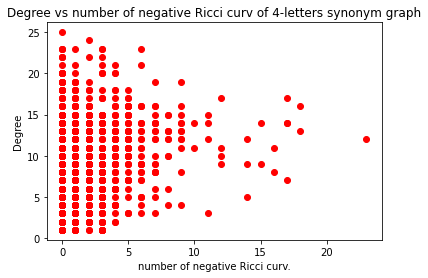

In [78]:
neg_ricci4letter_vs_degree = np.array(neg_ricci4letter_vs_degree)
plt.plot(neg_ricci4letter_vs_degree[:,0], neg_ricci4letter_vs_degree[:,1], "ro")
plt.xlabel("number of negative Ricci curv.")
plt.ylabel("Degree")
plt.title("Degree vs number of negative Ricci curv of 4-letters synonym graph")
#plt.savefig("dgVSnegricci_4letters.pdf")
plt.show()

In [80]:
medians = []
means = []

dict_ = {}

for id_ in set(neg_ricci4letter_vs_degree[:,0]) : 
    list_ = [] 
    for rc in neg_ricci4letter_vs_degree :
        
        if rc[0] == id_ : 
            list_.append(rc[1])
                         
    if len(list_) == 4 : 
        print (id_ , list_)
    medians.append([id_, np.median(list_)])
    means.append([id_, np.mean(list_)])
    dict_[id_] = list_
            
    
    

11.0 [15.0, 14.0, 12.0, 3.0]
12.0 [9.0, 17.0, 10.0, 11.0]
17.0 [14.0, 14.0, 7.0, 17.0]


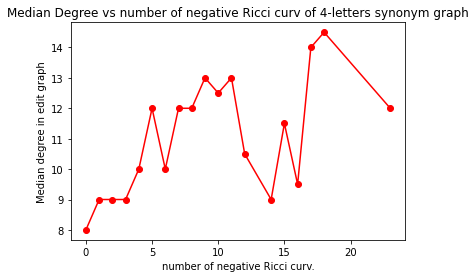

In [81]:
medians = np.array(medians)
plt.plot(medians[:,0], medians[:,1], "r-o")
plt.xlabel("number of negative Ricci curv.")
plt.ylabel("Median degree in edit graph")
plt.title("Median Degree vs number of negative Ricci curv of 4-letters synonym graph")
plt.savefig("md_dgVSnegricci_4letters.pdf")
plt.show()

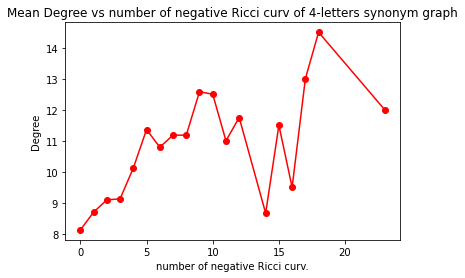

In [82]:
means = np.array(means)
plt.plot(means[:,0], means[:,1], "r-o")
plt.xlabel("number of negative Ricci curv.")
plt.ylabel("Degree")
plt.title("Mean Degree vs number of negative Ricci curv of 4-letters synonym graph")
plt.savefig("mean_dgVSnegricci_4letters.pdf")
plt.show()

In [83]:
ricci_data_4letter_editG = pd.read_csv("ricci_4letter_2.csv")
ricci_data_4letter_editG

,Unnamed: 0,w0,w1,ricci
0,0,abed,abet,-0.333333
1,1,abed,aced,0.055556
2,2,abed,aged,0.333333
3,3,abed,aped,0.125000
4,4,abed,awed,0.214286
...,...,...,...,...
10431,10431,chug,chum,0.416667
10432,10432,biff,miff,0.500000
10433,10433,biff,tiff,0.416667
10434,10434,miff,tiff,0.416667


In [5]:
arr_100 = np.array([  321,  9685, 10000, 10000,  8933,   114,   170, 10000, 10000,
        5504,  6334,  2005,   488,  4857, 10000,   393,  2444,  9849,
       10000,  5552,   781, 10000,  8287,   515, 10000,  6115,   150,
       10000,  2208,   597, 10000,  5161,  5699,  1086,   442,   357,
        7257,  4810, 10000,   160, 10000, 10000,   248, 10000,   234,
       10000, 10000,  7893,   142, 10000,  4037,   116, 10000, 10000,
       10000,  9742, 10000, 10000,   300,  2506,   216,  7200,    99,
        7526,  4175,    96, 10000,   184,   619,  8892,   152, 10000,
       10000,  9827,  6566,  1239,  5925, 10000,   470,  2920, 10000,
         117,  6137,   731, 10000,  7153,   330,  3595,  5538, 10000,
       10000, 10000,  3495, 10000,   198, 10000,  1270,   235,  1151,
        5480,   190,   216,  9642,   141,  5240,  9960,  1652,    40,
        3079,  7333,  8634,   213,   413,  3263,  2774,  7955, 10000,
         316,  4451,   820,  3173, 10000,    95, 10000,  3114,  3594,
       10000, 10000, 10000,  2537,  1078, 10000,   101,   534,  1001,
       10000,   100,  4874,  9948,   216,   420,  1289, 10000,    58,
         484,    14, 10000,   183, 10000,   860, 10000, 10000,  1566,
        5875,  3937, 10000, 10000, 10000,   248,  8760,   674,  5332,
          87,    86,  6049, 10000, 10000,   210, 10000, 10000,  1996,
         253,  5763, 10000,   853, 10000,  1929,   178, 10000,  2111,
        9080,  1569, 10000,   289,   122,  3647, 10000, 10000,   716,
        7314, 10000,   436,  9134,    94, 10000,  3261,  8923,    79,
        2379,  3324, 10000, 10000,   194,   958,  4690,   132,   178,
         568,   320, 10000,  4807,   368, 10000, 10000, 10000, 10000,
       10000,  9440,  1695,  7602,   532,  5273, 10000,   426, 10000,
       10000, 10000, 10000, 10000,  3896,  1585,  9452,  1316, 10000,
        6689,  9176,  9080,   355,    92,   174,  7297, 10000, 10000,
       10000, 10000, 10000,   451,   309,  5931,  2700, 10000, 10000,
         549,   219,   719,    30, 10000,   626,   770,  5075,   184,
        1392, 10000,   935,  6091,   191, 10000,  2829,  1519, 10000,
       10000,   682,  4436,   168,   232, 10000,  6773,  9834, 10000,
        4058, 10000,  6577,  3361,   119,    90,   367,  4938,  5137,
       10000,  4259,  3638, 10000, 10000,  7398,  6306,   159,   251,
         108,  4497,    76, 10000,  6226,  1419, 10000, 10000,   389,
        1830, 10000,  3345, 10000,   178,   903,  3855,  3718,  7214,
       10000, 10000,    78, 10000,  5994, 10000,   269, 10000, 10000,
        1416,  1982,   520,  4273, 10000,    51, 10000,   129, 10000,
         475,  4607, 10000,  4997, 10000,  2742, 10000,  6659, 10000,
         101, 10000,   690,  8358,  4066, 10000,  1426, 10000,  1325,
       10000,  1386, 10000, 10000,  4056,  2575,  1080,  6571, 10000,
       10000,  4356, 10000, 10000, 10000,  6645, 10000, 10000,   353,
        9926, 10000, 10000,  4073,  4187,   109,   496,    71, 10000,
        4081, 10000, 10000, 10000, 10000,  4073, 10000,   600, 10000,
       10000,  7574,  2374,  2959, 10000, 10000, 10000, 10000, 10000,
        6735,   699,  9214,  9537, 10000,   649,   226,   298,  5986,
         114,  2775,  4620, 10000,  3163, 10000, 10000, 10000,  5153,
       10000,  8132,  1787,    33,  7293,  1006,  5503,  7742,  2426,
         380,  2667,  5644,   502,   496, 10000, 10000,   871, 10000,
         424, 10000, 10000, 10000,  2644,    51,  6831,  3522, 10000,
         726, 10000,  9748,   106,  6648,   201,  3291, 10000, 10000,
       10000,  6042,  9924, 10000,   167,   147,   470, 10000, 10000,
        9046,  9306,   459,   207, 10000,  5994,  2310, 10000, 10000,
       10000, 10000, 10000,  9203,  3540,   719, 10000,  7748,   624,
         305, 10000,   183,    61,   251,  7438,   116,   311, 10000,
        5185,  8886,  9404,  2935,   411,  3685,   917,  8030, 10000,
        5198, 10000,    89, 10000,  3177,   238, 10000,   335, 10000,
         276,   396, 10000,  2557,  2979,   127,   161,  5081, 10000,
       10000,  8823,   231, 10000,   405,   607,  7903, 10000,  7090,
        9467,  5509,   318,  6997,   105,   115,  5960,  6564, 10000,
        2437,  5966,  1320,  4557,  3938,  1085, 10000,   409,   691,
        2958,  4801,  2820,   340,    78,   917,  3451,  9269,   337,
       10000,  8642, 10000, 10000, 10000,   281, 10000, 10000,    85,
        6650,  6380, 10000, 10000,  1387, 10000,   133, 10000,  6259,
        1489,  5010, 10000,  4585,  9753,   998, 10000,  3900, 10000,
        2650,  8251,  3025, 10000,  5045, 10000,  1041,    61, 10000,
         203, 10000, 10000,  7243, 10000,   385,    67, 10000,  3605,
       10000,  8188,   777,  9822, 10000,  5486,    66,   447,  7683,
       10000,   174,   225, 10000,  1264,   300, 10000, 10000,  7374,
         243, 10000, 10000, 10000,  9205,   336, 10000, 10000,   369,
        1762,  4713,    80,  5122,    99, 10000,  4697, 10000,  8961,
       10000,  5996,  5371,   106, 10000,  9141, 10000,   850, 10000,
         308,   252, 10000,  1284,   365, 10000, 10000, 10000,   232,
       10000,    57,  5691, 10000,  2011,  9094,   393,  5728, 10000,
        4271,  4276,  6667, 10000,  7362,  3396, 10000,   311, 10000,
        3700, 10000,  5201,  8015, 10000, 10000, 10000,  1628, 10000,
       10000,  5048,   403,  6982,  1109,    75, 10000,  3901,  7084,
        2462,  5604, 10000,  2914, 10000, 10000,   253,   141,  5853,
       10000, 10000,   456,   431,  2467,  5284,  5155,   285,   226,
       10000,   200,    90,   683, 10000, 10000,   549,   535, 10000,
         267, 10000,   144, 10000,   474,   274,  2345,  1916, 10000,
        1949,  3075,   403,   318,  2465,  3178, 10000,    58,  1063,
        3548,  1342, 10000,  1202, 10000,  1007,  9944,   603,   795,
         187,   196,  3830, 10000, 10000,  1419, 10000,   558, 10000,
        1486,  7956, 10000,  5413,  1643,  8718, 10000,   145,   884,
         150, 10000,  4152,  7709,  4023,  8927, 10000,  7952, 10000,
       10000,   808, 10000,  3905,  6444,   341,  4899, 10000, 10000,
       10000, 10000,   110,   115, 10000,  2056,   264,   350,  9948,
       10000, 10000, 10000,   299, 10000, 10000,   125,  1802,  7600,
         194, 10000,   115, 10000, 10000,   141, 10000,  2707,  3363,
         210,  8487, 10000,   110,   215, 10000,  2742, 10000,  1204,
        7785, 10000,  1850,  2306,    27,  8680, 10000,  4054,   155,
        7625, 10000,  4044,   410,  6763,  3756,  9295,  5906,   559,
       10000,  4968,  7965, 10000, 10000,  5497,  3064,  1019,  3496,
       10000,  4421,  5356,  5289, 10000, 10000, 10000,   160,   125,
        5193,   219,  1756,  1063,  8553, 10000,   163,  1888,  1368,
        6184,  6104,  4371, 10000,   194,  1140,    57,   446,  2262,
        6615,   300,   321, 10000,  7921, 10000,  1603, 10000,  4777,
       10000,  3727,  4970, 10000,  7535,   258, 10000, 10000, 10000,
       10000,   218,  2196,   379, 10000, 10000,   216,  9811,  3281,
        6447,   145,  3596,  4160, 10000,   701, 10000,  4466,  2544,
       10000, 10000, 10000, 10000,   461,  8572, 10000,   465, 10000,
         120,  4293,  9711,   133, 10000,   129,   225,    54,  3685,
         289,   138, 10000,   246, 10000,   719, 10000,  8591,  8176,
        2647,  2502,  1497,   216, 10000, 10000,   110,   248,  5834,
        8698,  5901,  3420,  4594,   324,  8290,  1050,   135,   982,
        3166, 10000,   128, 10000, 10000,  1383,   259, 10000,   244,
        4557, 10000,    59,  8519, 10000,  9206,    42,  3471, 10000,
        3739,  2399,   551, 10000,   105, 10000, 10000, 10000,   152,
         147,  6488,  9376, 10000,  1601, 10000,  7522,  9487, 10000,
       10000,  4030,  4289, 10000, 10000, 10000, 10000, 10000, 10000,
        2262,  7317,   238,    83,  2755, 10000,  1687, 10000,  9895,  3800])

In [6]:
arr_250 = np.array([ 3850,  4882,  6339,  6405,   211,  6476,  9728,  1442,  6167,
         192,   431,   850,  4108, 10000,   220,   123, 10000,   100,
        1453,  1301,  1725,   133,   421,  2134,   534,  5239,  4742,
         127,  2109,  1557,  1211,  5868,  1342,  7539,  5578,   117,
         862,  9405,   764,  5459,  6810,    77,  1016,   814,   250,
         946,  2040,  2737,  3539,  1009,    59,  2701,   876,  6564,
       10000,  2397,  2085,  7093,  1116,   116,    87,  5411,  2022,
         114,  1539,  1569,  1607,  1349,  4219,    90,  4264, 10000,
          60,  6147,   272,   229,  5946,    76, 10000,  4508,  7146,
        4132,  4277,  3816,  3982,  2821,  4062,  8258,  1768,   499,
        2045,  4145,   417,  5967,  1787,   553,  3095,   382,  3404,
         575,  2000,   725,  1708,  4008,  2633,  1493,  3877,    12,
        5946,  1882,  5881, 10000,  4368,  1788,  5399,  7705,   153,
        2505,  3185,  1259,   703,  1065,  1990,  8273,  3362,   485,
        1035,  6991,  2818,  3088,  2424,  2595,   101,    57, 10000,
        3316,  3139,  5468,   601, 10000, 10000,    53,  1214,  8423,
         198,   533,  1644,   191,  2265,    20,  1600,  2028, 10000,
       10000,   169,  5800,  4823,   235,     9,  2269,   978,  1908,
          59,    62,  1681,  3169,  4352,  6056,  4542,   199,   149,
        2746,   703,   125,   824,   127,   136,   471,  8424,  3471,
        7905,    19,    97,   155,  7351,   119,   909,   216,   232,
        8185,  8565, 10000,   910,  9853,  7818,   802,   150, 10000,
        2722,  3106,  7030,    79,   119,   206,  5556,  3574,   101,
       10000,  3628,  1753,  9343,  3770,   120,  2127,  3759,  2240,
        1886,    89,  1838,   595,   166,   897,    80,    40,   130,
         114,  3456, 10000,  7192,   165,  4041,   171,  1790, 10000,
        7117,   965,    21,    11,  1570,  2990,  1245,  9875,   456,
         104, 10000,  2660, 10000,  1906,    27,   998,   810, 10000,
        5031,  2270,   407,    33,  4279, 10000,  1107,  1605,  1099,
         120,  6142,  6009,  5038,  5973,  8149,   903,   584,   622,
        2314, 10000,  2915,    62, 10000,   168,  2619,   490,  6027,
        1314,   661,   527,  5136,  4072,   170,  1470,   195,   707,
         226,  1123,  9510,  9546,  1408,  4824,   164,  3636,  5898,
         589,    92,   286,   503,  1681,  1847,  6645,   266, 10000,
       10000, 10000,  5636,    88,   140,  2834,    65,  6727,  3157,
         182,  2204,  7622,   329, 10000,   617, 10000,  1153,  1960,
          50,  1619,   315,  3577,  1111,   214,  2078,  4695,  6266,
         222,  5500,  3925,  6461,   156,   155,   680,  5072,   273,
        1497,   107,    99,  3086,  2288,  4918,   425,   122,    88,
       10000,   816,  7363,  1551,  7376,   500,  1425,  2871,  3676,
         407,  8275,   829,    57,   100,  2330,   988,   190,    61,
          29,  7472,  1092,  4810,   168,   877,   173,   162,    62,
         112,  1650,  1477,  3211,   482,  6514, 10000,  5808,  6874,
         255,  6660,  3056,   136,   259,  7336,  2214,  6581,  5083,
          94,   607,  3090, 10000,  3716,    59,  4610,  8276,  5625,
        1997, 10000,   321,   129,  5754, 10000,   132,  2406,  5822,
         972, 10000,    29,  7022,    92, 10000,    97,  7039,  3503,
       10000, 10000,  7122,  5393, 10000,   184,  1600, 10000,  4841,
        3363,  1977,   194,  3787,   519,  3708,    68, 10000,  1242,
          68,   745,   130,   792,  7449,  1469,   260,  1373,  3071,
         154,  4637,  1793,  2707,  2865,    80,    62,  3690,  3246,
         934,   155,  3539,   195,   217,  9442,  2133,   188,   116,
        3826,  4220, 10000,   649,  1721, 10000,   537,   176,    47,
         113,  4776,  7920,   102,  1334, 10000,  1120,   224,  3662,
         203,  5940,   216,   214,  8050,   712,  3462,  6687,   120,
          41,   602,   508,  1810,  5718,  2289,  3275,    99,  1302,
        2925,   107,   439,  6375,  4677, 10000,    85,   811,   153,
          71,  9203,  1448,  1062,  2154,  2650,  3080,  1095,  4727,
        2393,  5771, 10000,  2040,   423,  2328,  3606,   139,  1505,
         169,  3304,   296,   747,   204,    76,   134,    78,    77,
        2829,   101,  1053,  2065,    21,  7495,    88,   446,   316,
         649,  2090,  3942,  4545,  1473,  6099,  2349,  4070,  2651,
        2299,    91,  3595, 10000,  4507,  1552,   307,   269,  4580,
         402,   122,   625,    12,  1636,  7560,  6612,   161,  3780,
        3612,    80,  3491,   179,   134,  7350,   424,    93,   403,
       10000,  2138,   216,    43, 10000,  9334,  2023,   982,  2405,
        7644,  2152,  6306,   170,  2072,  5298,   139,  4832,   181,
        1613,   367,  4257,  7556,  8204,   247,  2676,   216,  1122,
        7609,   807,  2707,  5214,   975,  8319, 10000,   616,  5830,
         414,   190,  6679, 10000, 10000,   353,   149,   604, 10000,
       10000,  3150,  8333,   568,  4555,  1314,  5229,   308,   147,
        6142,  9075,  4468,  3204,  1634,  3022,    92,  8900,  2359,
        1457,   365,  3196,  4658,   252,   350,   450,    43,  4963,
        2735,    64,   105,  4608,  1258,  2554,  1006, 10000,  8443,
       10000,  1216,  1524,  3349,  4394,   163,   415,  1437,  4618,
        1631,  5609,   328,   247,    47,  4386,    67,  2693,   405,
          27,   184,  1591,  3529,  3868,   140,  9792,   213,    85,
        5617,  4105,   606,  7202,   690,  2610,   103,    97, 10000,
        7193,  2407,  5874,  1239,  5172,   100,  1896, 10000,  5186,
        4747,  1291,  4868,  1283,   238,   766,  7412,  6139,   175,
          88,   166,  2688,  3984,   708,  1509,  6522,  1924,  1330,
        2284,  2058,  8026,   245,   102,  2336,  5425,   613,  9799,
        3166,  2179,   131, 10000,  2296,  3328,   471,   596,    58,
        9002,   508,  4377,   147,  1992,  6235,  4605,  3782,  2482,
         278,  8765,    45,   127,   984,  2534,  4685,  3696,  4434,
        5564,  3360,  6295,   103,  5677,  1354,  2299,    73,  3247,
         238,  9029,  9993,  6471,   369,    53,  3793,  2441,  1343,
        5568, 10000,   534,  4447, 10000,  2883,   193,  2002,  4406,
        6340,   241,  2288,    22,   126,   115,   969,  7645,   197,
         272,  4867,  7093,  6598,  5415,   256,   142,   121,   143,
         532,  1696,  2755,  1269,   100,  1598,  1996,   631,  3783,
         191,  6591,  3309,   342,  2149, 10000,  6330,  4524,  4395,
        6908,    34,  6419,  2072,  6499,  6576,  5386,   166, 10000,
         574,  3794,  7401,   213,  1221, 10000,   111,  2118,   559,
        5119,  1891,  6265,  5068,    67,   253,  5818,   171,  1600,
        7699,   518,  3586, 10000,   346,  4038,  1088,   124,  7863,
        5534,   982,  3635, 10000,  1581,    16,  5500,  2481,   499,
       10000,  3688,  1435,  1586,    62,  9801,   193,  1442,  5267,
       10000, 10000,    54,  7489,   105,  1124,    51,  6598,   797,
        1835,  1249,  1242,  4941,  6148,   998,  2260,  1533,  2881,
        3709,   161,   111, 10000,  1809,   750,   449,   111,  9936,
       10000,   143,   807,   340,   586,    57, 10000,   432,   135,
         114,  6086,  3102,  6325,  1028,  4986,   253,   110,  5075,
        1059,   109,  1633,   165,  7094,   511,    67, 10000,  7235,
        5169,   951,  2202,   229,  1157,  7408,   223,  2507,   136,
        4311, 10000,    85,  4785,  2160,  2457,  2371,  3973,  4821,
         154,   674,  4299, 10000,    59,    46,   346,   106, 10000,
        4262,   115,  6117,    79,  2379,    90,   145,  6748, 10000,
        3230,   202,    94,   293,  4949,  4083,  6601,   410,  4971,
        4401,  6731,  1677, 10000,  2360,   794,  2794,  3423,   373,
       10000,  2730,  1124,  3403,  5535,  2717,   139,   128,    43,  1846])

In [7]:
arr_500 = np.array([   65,   187,  1683,   718,  1479,    48,   157,  1060,   979,
        3217,  2170,   613,  2760,  1415,   189,  2496,    61,  3087,
         968,  1472,   105,    19,   124,  1718,  4744,  1532,  5891,
         410,  3239,    86,   623,   404,  4325,   511,    43,   150,
         840,   336,  4238,  1303,   744,  3091,   175,  2075,  3831,
          92,    65,   880,   535,    45,    82,    59,   126,    45,
        2091,  4751,   527,   580,  3069,   435,  2241,   226,    74,
        1765,  3081,   248,  1164,   497,  2448,   103,   103,    65,
        2017,  1140,   834,   165,  1610,  4917,   194,   430,   229,
        1385,    78,   119,  1801,   216,  2323,   124,   537,  5414,
        1432,    84,    81,  1044,   159,   115,    95,   455,  2084,
        2029,  1377,   235,    62,  2259,  4635,   371,   112,  1607,
         464,    79,  1607,   625,   451,  2513,   725,    62,   152,
          97,  4692,   101,    25,  5989,  3197,   624,   601,   614,
         207,  6648,  2531,    92,   464,  1282,   415,    53,   428,
        1388,  1539,    35,   141,    58,   196,   146,   133,   106,
        1088,  1387,    36,   736,    79,  1268,  2096,    80,   701,
        1174,   333,   211,   111,  2494,   183,   576,   117,  2001,
        1342,  2439,   238,   972,  2853,   315,  3166,   847,  4114,
         100,   110,   603,    44,   253,    77,  1649,   586,   836,
        1231,  1213,  8113,   142,    61,  1161,   137,   183,   348,
         103,  2379,    83,  2273,  1946,    59,  1320,  2475,   415,
        1741,   816,   245,  1072,  2192,   696,  3119,  2096,    21,
        5032,   168,    73,   328,   140,    86,    98,   381,  1332,
        1404,  3097,  7830,   439,    18,  1275,  3831,  1709,   157,
        6750,   277,   682,   337,  1597,  1282,  1558,   876,  1256,
         116,   645,   122,   464,  4567,   667,   191,  7672,  7373,
         152,   697,   120,  1953,   333,  1102,   115,  1302,   187,
         190,   149,    47,  1319,   763,   122,   601,  1536,   343,
          60,   101,  4081,   947,  2856,  7484,   241,  3532,   243,
          74,  3703,   761,  1071,  3153,    65,  3881,  1305,    47,
         129,  2954,   380,   137,  4317,   291,    56,    53,  1278,
        2398,  1261,   238,    50,  1356,    85,   101,  2093,    88,
         152,   325,   108,   539,    64,   348,    82,   109,   167,
         953,   135,  4424,   240,  4108,   111,   303,   824,    71,
         559,    78,   416,   245,   366,  5212,   137,  1574,    97,
        4611,   112,    70,   113,  2297,  2457,  1469,   273,  2344,
         931,  2230,  5895,  1390,    87,   120,  3410,  1898,  1350,
          67,  4275,  1302,   359,   220,  1311,   170,   537,  1942,
          46,   722,  8489,   485,   109,    98,   282,   117,  1711,
         686,   232,    66,   904,    74,  1375,   466,  1529,  1386,
        1420,   100,   278,    37,  4015,  5609,   567,  2304,  1206,
          88,  2617,  1111,  3298,    24,  5745,  5945,    89,  1684,
        2748,   137,   980,   160,   790,    96,   667,   733,   750,
         303,   101,   555, 10000,  1949,  5715,    57,   242,    57,
        1162,    95,  3827,  6176,   141,   460,    88,    77,  2601,
        2425,   159,   103,  2679,   650,  4344,  2343,    68,   105,
        2998,   885,  3868,    80,  5839,    71,  1562,  2058,  1822,
         429,   128,   322,  4384,  1832,   103,   871,    63,   675,
          35,    79,   132,  2495,  2985,   573,  5987,   267,  5845,
        3012,  2779,  3244,   315,   178,  2317,   138,  1595,  7484,
         118,   117,    75,  3383,  2102,   687,   115,  2287,  2069,
          91,    73,    78,  2164,   196,   295,    72,   374,   115,
        1494,   106,   517,   487,    67,    57,   113,   486,  1196,
         260,   492,   121,  2401,   900,   110,    74,     9,    80,
         394,  1508,  3963,  1685,    63,  4482,  1796,    45,    87,
         400,   588,    59,   892,   819,   894,    28,  1168,   539,
        6305,  2775,  1812,  1502,  2601,   642,  1241,   982,  2249,
        3369,    44,   113,   328,   224,  2542,  1401,  1327,  1905,
        1732,  3018,  3292,    87,  1853,  1062,  4823,    71,  3059,
         540,  3407,   112,    73,  2706,  2740,  6894,    88,   495,
         555,  2447,   168,  3286,    60,    60,  2928,  4556,   981,
        3017,    73,  1795,    90,   201,  1362,   135,  2221,    94,
       10000,    95,   218,   436,   128,  1283,   187,  1059,   285,
        1266,  2367,   846,    83,  1274,  1608,  2395,   131,   283,
        3772,   229,    59, 10000,   557,  5747,   859,  1190,   940,
        1984,  4017,  7261,    17,  1929,   749,   990,   169,    75,
        1707,    82,  1730,   108,   106,   364,  5984,  1745,   126,
          55,   103,    68,    94,  1719,  1249,  2372,    80,   127,
        7218, 10000,    84,   400,    96,  3949,   299,   686,   101,
        8327,  1868,  1215,  3208,   108,   197,  5242,    43,   151,
         736,   108,  1621,  6241,    50,    98,  4109,  4282,  1454,
        2370,  1319,  1916,  4117,   202,    99,  1220,  3270,  1264,
         141,   593,  3715,   498,   550,  1418,  1780,   197,  3738,
        1878,  1183,    32,   112,   220,   118,  4916,   252, 10000,
         209,    32,  2551,   119,   249,   142,  4680,   448,   159,
        2587,  2323,   173,  1156,  1323,  3815,   751,  1971,    95,
        2684,    88,   155,    92,   819,  8239,    63,  3096,   540,
         758,   964,  3085,  2417,    30,    95,  2105,  3550,    56,
         915,  1164,  4954,   547,    67,  1014,   496,   381,   137,
          48, 10000,    60,   210,    68,   117,   145,    45,    84,
        1313,   164,  1161,    55,   388,    21,  1194,  2580,   368,
         606,   169,  1451,    55,   199,  2317,  1817,  1385,  1840,
         111,   764,   409,   649,    35,   168,  1432,  1842,   365,
        2152,   118,   721,  1975,  1701,  3120,   129,  3990,  1437,
        1517,    91,   415,    61,   108,  1104,    55,    91,   110,
        4572,   108,   295,  1678,    24,   137,  5866,    41,   562,
        3090,   100,  2518,   439,  3565,   139,   140,   241,  1502,
        1869,  3162,    64,   355,  2354,  9476,  1243,   120,  2212,
         139,   948,  2279,   225,  1870,   119,   665,  8572,  3107,
        1661,  1228,  6739,  9139,  2265,  1921,   557,  1829,  1846,
          83,  1047,   378,  3204,  3618,   223,    79,  2196,  5817,
        1630,  2661,  2206,  1756,  1039,   192,   626,  4591,   426,
         357,    19,  5414,  5232,    28,  3527,    95,    61,  2822,
        2579,  1231,  1630,   781,  9028,    95,   888,  1042,   668,
          81,   143,   102,   148,   958,   805,   962,   425,  1747,
        8993,   961,     6,   193,   845,  4323,    21,  3282,   125,
        2394,  1579,    77,  1316,   245,  5731,  1460,  2015,  2753,
        5034,   643,    72,   251,   127,  1181,   107,   131,  2632,
        1453,   907,  5272,   207,  1701,   148,  1138,   112,  1716,
        2070,  1189,   171,   181,   624,   139,  7837,  2576,  1574,
          31,  4425,  1478,   268,    79,  3552,  3064,  2545,    97,
        1156,   650,   108,   542,     6,  1162,  4229,   108,  1074,
         593,  1971,    34,   130,   137,   165,    37,   154,   114,
        1053,    44,    58,   110,    50,  2031,    52,    62,  1952,
          69,    58,  3633,  2775,  3492,   283,  1017,    50,   101,
         742,    69,  1676,   958,   538,  3334,    75,   713,  5107,
        2438,  3717,  1314,  1063,  2431,  1695,   147,   220,  2600,
         911,   101,  1722,   746,   281,  1151,  2934,  1439,   677,
          97,    89,   857,   408,  1195,    53,  1236,  1342,   514,
        1048,   278,   298,   129,  1189,  2958,   101,    67,   979,  2245])

In [8]:
arr_750 = np.array([ 868,  707,   73, 1610, 1286, 1161,  289,  959,  155, 3723, 1278,
       2155,  274, 1212, 2408, 1830,  681,  530,   96,  229,  115, 1270,
       1342,  148,  106,  196,   80, 1967, 2319,   27,   31, 3993,  315,
       1716,  625,  120,  103,  426, 3242,   88,   38,  144,  121,   78,
        191, 1082,  516, 1454,  134,   77, 1192,  185, 2174,  160,   69,
       1348,   53,   45,  258, 4585,  296,  604, 1988,   93,  139, 3847,
        757,  542,   56, 1295,   41, 1661,  161,  204, 2800,  120,  198,
        105, 1034,  123, 1969, 1440,   90,   69, 2182,  338,   49,  101,
         52, 1517,   49,  195,  512,  111,  684, 1696, 1074,   90,   79,
        475, 1204, 2432, 1912, 3168,   42,   48,  115, 1995,  372,  286,
       1846,  117, 1822,  357,  961, 6459,  793, 2291,  839,  204,  789,
         61,   30, 2305,  105, 2181,  631,  561,  627,   59,   85, 1562,
        284, 1508, 3433,   57,  567,  113, 2737,  158, 2347, 1069,  108,
        341,  129,  310, 3883,  250,   69, 4812, 1861,  100,  571,  113,
       1136,  335,   56, 1237, 1860, 1952, 2367,  117, 1605,   52, 3816,
        105, 1369, 1456, 5316, 1430, 3360,   66, 1125, 2592, 3886,   67,
         92,  103, 5581,  257,  454, 4027, 3314, 1008,  359,   73,  601,
         32,   34,  163, 4015,  587,  733,  124,  979,  418,  273,  185,
        110, 1246,   66,  263,   52, 1960,   53,   88,   62, 2067,  747,
        975,  596,  921,  167,  103,  675, 3499,  231, 1569, 2204, 1311,
         52,  862,  483,  381,  239, 3267,  186,  582, 1665,  117,  990,
        571,  155, 1861,   33,  120,  663,  250, 1205,  574,   62,  613,
        130,   96, 1763,  194,  113,  210,  102, 1265,  127, 2678,   92,
         88, 1170,  154,   23, 5767, 2399, 2983,  650,   65, 2945,   43,
        141,   99,   75,   55,  104, 1105,  112,   43,  494, 1747,  556,
        962, 1844,  852,   16, 2211,  141,   61,  102,  209, 2154,  238,
       1827,  288, 1442,   44,  124,  110, 8121,   46, 1513, 1964,  105,
       2394, 2222, 3340, 1660,  208, 1085,  143, 2911,  124,  757, 6953,
        880,  151,  856,   54,  152,  155,  110,  466,  251, 2606, 1286,
        259, 3442,   85,  416,  132,  515,   72,  194, 2039,   61, 1159,
         70, 4141,   28,   85, 2055, 2083,  649, 1094,  983, 1092,   30,
         52,  647,  588, 4066,   68, 2703, 4280,  421,   46,  273, 1676,
         22,  118,  123,  293,  804, 3030, 4463,  629,  419,  178, 1148,
       8176,  145,  259,  116,  134,  651, 1023,   20,  125, 1407,   94,
         99, 1735,  890,  855,  910,   94,  229,  113,  142,   61, 2202,
        537,  941,  284,  708,   85,  534, 1750,  938,   65, 3809, 1653,
       1856,   71, 1462,   93, 1723,  254,  313, 1027,   82,  310,  699,
       1462,  101, 2016, 1519,   68,   58,  164, 2770,   69,  101, 1057,
         47,  201,    9,  601, 2439,  501,  385,  817, 3140,  114,   66,
         73, 1990,  146,  686,   65, 2875,  788, 2940,  336, 2460,  201,
         62,   74,  810,   86,   74,   63, 1217,   80, 1851,   62,  106,
        181,  110,  218,   69, 1099,  978, 1489,    9,   99, 5947,   66,
        103,  825,  785, 1969,  109,  408,  408,  218, 1307,   88,   93,
       2227, 1074, 2370,  627, 5183,   41,  677, 1018,  188,   90,   45,
       1543,  156,  566,  721,  403,   72, 1197,   30,  311,  147,  833,
       2415,  695,   42,   97, 3565, 3077, 3052, 1462, 3589,  227,  110,
       1840,   46,  174,  137,  153,  107, 1719,   65,  823,   39,   82,
        722,  565,  109,  122,  451,  131,   93, 1484,  116,  228,  726,
        622,   85,  185, 4536,   74,  455, 2274, 1665,  135, 1278,  100,
         38, 1110,  122,   85,  677, 2235,  256,   86,   90,  682,   74,
       1169,  886, 3233, 1744,   87,   63, 4404, 2154, 2005,  100,  102,
         74, 1076,  300,  108,  204,  182,  175,  679, 3301,  466, 1366,
        647, 1336,   77,   84,  583,  816,   68,   45,  103,   73, 3257,
       1261,  731,  599,  495,   43,  723, 1857, 1129,   38, 2032,   42,
         58, 1700,  671,  300, 2485,   73,  667,   63,   71,  924,  298,
       1641,  715,  161, 1591, 1460,  774,  316,   73,  207, 1521,  118,
       3026,  102,  234, 3568, 1026,   72, 5559, 1167,  229,  114, 2705,
        987,  127,  318,  128,  443, 1289,   63,   68,  152, 3213,   73,
        199,  116,  111,  340,   48,  143,   74,  188,  513,   48,  691,
        328,   84, 5527,   59, 1473,  945,  202, 1550,  358,  176, 2406,
       1136,  130,  381,   60, 1275,   76,  115,  277,  667,  311, 1001,
       1375, 1860,   65, 1849, 2197,  106,   96,   40,  951,   57,   30,
       3006,   26,   69, 2093, 2188,   94,   59,  826, 5264,   27, 2075,
         82,  573,  122,   47,  794, 2832,  112,  302,  128,   44,   23,
        617, 1078, 1553,   39,  521,  507,  137,   72,  910, 1028, 1062,
       2863, 1009,  103,  254, 1122,  262, 1819,  439,  416,   83,  161,
       3007, 3938,   48, 1022,   47,  169,  443,   37,  122,  582,  918,
         54,   47, 1356,   85,   45,   61,  397,  360,  123, 1147, 1647,
        104,  116,   17,  562, 1710,  210, 2261,   33,  282, 2573,  186,
       4295, 1532,   70,   37, 2300,  126,  123, 2043,   74,   95,  195,
       1444,  105,  126,   50,   71,   40,   57, 1627,  255,   59,  101,
        418, 2428,  458,  104,   56,  950,  111, 1194,  240,  215, 1939,
         26, 1657,  972, 1091,   87,   88, 1081, 3563, 5019,  148,  114,
        111,  162,  690,  986,  337, 4041,   52,  684, 1680,  686,   38,
         75,  772, 1632,   92,  102, 2803,   28,  412,   45, 2094,   99,
       2362,  867,  574, 1377, 2887,  271,  653,  325,  106,  167, 4394,
         82,  203,  650,  194,   71,  479, 1447, 2308,   86,   36, 1214,
        130,  197, 1678, 2022,  107,  616, 1399,  844,  453, 2660,   72,
         89,  317,  660,  400,   73,  528,   30, 1528,  745,  283,  258,
        795,   33,  109,  148,  759,  152,   79,   41,  606,   83,  114,
        242,   51,   91,  272,  658,  853,  184, 1027, 2990, 2335, 1657,
       1523, 1223,  631,  306,  162,  937,   79, 3567,   64, 1235,  306,
         80,  108,  661,   69,   85,   83,  834, 3601,  281,  102,   94,
        133,  869,  843,  275,  120,   69,  146, 1938,   54,  213,  141,
         61, 3277, 1584,   22,  242, 1205,  723, 1365,    6, 5727,   14,
       1241,  142,   70,  144, 1623,   53, 5612,  399,   98,  607,  109,
       1589,   70,  587, 1334,  855,  162, 1290,  228,   62, 1814,   90,
        217,  912,  711, 2197,  227,  572, 1453,  259,   87,  912,  499,
       1095,   95, 2866,   62,  250,   92,  213, 2128, 1562,   15,  111,
        233,   81,  100,  535, 1224,   79,  129,   54,  304,  110, 1436,
       1315,  124,  126,  103,  117,  486,  968,  773,  173,  369])

In [9]:
arr_1000 = np.array([373, 1376,  113,  141,   38,   61,  314,   56,   76,   96,  576,
         90,  202, 1715,  534,  136, 1033,   39,   61,  279,  478,   44,
       1790,  191,   82, 1054,  130,  156,  271,   66, 1078,   97,  121,
        360,  117,  352,  398,  198, 1307,  892,  131,  770,   62, 1022,
       1622,  440, 1259,  380,   95,  224, 1631,  190,   38,   94,   97,
        876,  152,  167,   52,   56,   96,   99,   93,   87, 1427, 2698,
         59,   70, 3143, 1211,   31,  711,  372,  107,  141,   70,   81,
        576,   72,  137,  742,  784,   48, 2039,   74, 1253,  304,  932,
        534,  166,   70, 1391,   52, 3861,  103,   78,  313,   98,   53,
        108,  988, 2343,  605,  110,   96,   51,   66,  728,  289,   70,
         95,  666,  110,  104,  220,  557, 3269,   37,   41,  138, 1738,
        191,   42,   90,  467,  474,   89,  114,   22,  485,  101,   53,
         72,  119, 1518,   91,  372,  100,  136,   85, 3497, 1570,  719,
         86,  547,   66,  896,  404, 1501,   24,  359,   91,  570,   87,
        104, 1701, 3153,  102,  256, 3103,  835,  491,   76, 1980,  403,
         47,  231,   42,  508,  718, 3845,  299,  896,  267,  241,  184,
        463,  584, 1586,  802,   95,  177,  242, 1498, 2903,  731, 1570,
       2360, 2424,  313,  733,  273,  137, 3320,  324,  939,   98,  693,
        116, 1305,   79,  123,  247, 2963,   32,   44,  337, 1323, 1170,
         61,  236,  151,  494, 1010,   49,  661,  167, 2301,  114,   98,
         50, 1242, 1210,  724,  623,  568,  112,  136,   45,   75,   83,
         38, 2303,   69, 2173,  108,   97,   84,  372, 4324, 4468,   75,
        123,  248, 1019,   91,   14,  531,  126,   99, 1050,  277,   99,
         33,  705,  606, 3671, 2471, 6399,   61,  832, 1624,  835, 1857,
        582,  553, 1009, 2530,   79,  102,  101,   93,  624, 1371,   53,
        138,  230, 1512,  115,   39,   94,  918,  115,   26, 1123,  385,
        586,  258,  807,   74,  272,  509,  735, 1573,   65, 1788,  458,
       1007,   67,  118,   96,  885,   43,  100,   32, 1064, 1112,  336,
       1010,   68,  142,  220,  169,  117,  123,   84, 2054, 1302,   67,
         56, 1975,  757,   88,  116,   96,  163, 2944, 1579,  649,  567,
        441,  945,   81,   80,  141,  875,   55, 1735,  511,  403, 2837,
       1543, 1502,  166,   70, 1529,  614,   91,   77,  491,   86,   79,
         45,   34, 1384,  313, 2905,  168,   51,  575, 1111,  389,   79,
        146, 1299,  973,   37,  998,  271, 1109,  236,  245,   99,   91,
       1067,  343, 1292, 2275,  149, 1713,  888, 3120,  238,  109, 1010,
        115, 1994,  187,  305,  513,  194,   84,  207,  101,  102,  133,
         63,   94,  128, 2309,  361,  620,  673,  738,   79, 3674,   52,
       2086,  468, 3207, 1264,   68, 1341,  123,   83, 1822, 1653,  176,
         36,   78,  753, 2046, 1209,   91,  104,  117,  219, 2458,   93,
        585,  395,  283,  994,  102,   17,  668, 3059,   29, 2150,  615,
        938,   51, 3804,  463, 2334,  775, 1023,   52, 1456, 2003,  980,
        199,  333,   80,  898,   64,  649,  627,   39, 1203,   91,  101,
        757,   68,  102, 2690, 2857,   24,   32,   51,  981,   68, 1181,
        135, 1814,  110,  120,  116,  453,   72,   88,   69,   70,   55,
         93, 2412, 3267,  100,  130,   57,   49,  135,   99, 3050,  102,
        695,   92, 3482,  899,  822,  912,  562,   92,  529,  139,  696,
         58,  124,   70,   62,   66, 1622, 1952,    4, 1080,  107,  465,
        780, 4944,  440,  780,  446,  326,   68, 1425,   82,   57, 1225,
         51,   48,   69,  755,  134,   44,  116,   84,   92, 1566,  317,
        356,   89, 4023,   96,   43,  128,   51,   38,  334, 1775,   90,
       1978,  337,  563,   85,  147,   76,  475,  111,  444,  175,   94,
       1506,  138,  148,  739,  247,  110,   56,  447,   76,   91, 2980,
         54,   55,   64,  166,  578,  699, 1091,   43, 2806,   53,  146,
        569,  145,  140,  121, 1281,   90,   90,  151,   41,   89,  526,
         90, 1720,  457, 1324,  145,  177,   49,    6,  393,   46,  124,
         44, 1200,  107,  133,  139,  245, 3534,  823, 3773, 1587,  344,
        124,   66,  654,  706,   86,  238, 1859,  258,  834,  465,  325,
        116, 1132,  634,  296,   91,  375,  247,   75, 1599,  675,  101,
         99,  586,  614, 1561,   79,  449, 1275,   66, 3390,   91,   88,
        530,  172,  892,  743, 1303,  118,  161,   66,  108, 1675,  483,
         96, 6053,   93,   46, 1208,   61,  147,  117,   62,  679,  948,
        268, 3171,  253, 1182,  753,   61,  121,   59,  718,   67, 1955,
        558, 1915, 1261,   93,  196,  631, 3947,  669,  839,  142,  359,
        929,  103,  394,  146,  211,   58, 1311, 1158, 2586,   99,  651,
       1133,   59, 1724,  120, 2347, 1094, 1147,  809,  485, 1895,   61,
         96,   20,   88,  774,   90,  938,  199,  342,   60,   44,   77,
       1775,  199,   23, 1246,   30,  100,  988, 1331,  280,   74,  138,
         93, 2102,  132,   84,  371, 1435,   61,  123,  193,  701,  174,
        210,   97, 1320,  150,  109,   70,  335,  658,  174, 2668,  309,
         62, 1093,  724, 1819,   17,  654,   78, 1294,   51, 2589, 1620,
       1413, 1867,  197,  550, 1615,  824,  120, 1021,   80, 1961,   31,
        173,  112,   95,   47, 1343,  111,   42,   60,  510, 1273,   34,
       2374,  555,  768,   82,  364,   73,   90,  338, 2779,   88, 3731,
         66,  429,  104,  809,  839,  100,  769, 2026, 1317, 5952,   64,
        541, 1542,   87, 1902, 1042,  608, 4289,   92,  116,  301,  310,
        405,  155, 1390,  120,   96, 2580,   46,  284, 1160,   80,  733,
        110,  347,   58, 2350,  586,   85, 2458, 3168,   73,   55,  749,
       1621,  115,  122,   58,   94,   52,   69,  179, 2322,   83,  667,
         36,   43,   80, 1355, 1213,  360,   17,  124,  637,   88, 1137,
        820, 1325,   80, 2375,  615,  814,  667,  127,  136,  436,  121,
        738,  595,  218,  151, 1761,   81,  113, 1074,   23, 2599,  288,
         15, 1547,  136,  931,  727,   75, 1319,  786,   92,  182, 3930,
         78,   75, 2192, 2834,   91,   69,  283,   66,  135,  114,  145,
        102,   61,   82,   49,   16,   35,   89, 2048, 1902, 1871,  415,
         11,   46,  973,  142, 1479,  106,   94,  120,  301, 1035,  153,
        203, 3313, 4485,  121,  110,   80,  207, 1567,  214, 2776,  714,
         91,  913,   67,  125,   53,   65,   84,  705,  208,   41,    8,
         73,  174,  553,   36,   51,   51,  164, 1144,  390,  544,   34,
         43, 1965, 2445,  154,  105,  103,  172, 1533, 1687,  317,  404,
        334,   43,   99,  101,  145,  665, 2020,  125,  110,  505, 1101,
       1826,   39,  228,  137,  486, 1497,   24, 1367,  108,  118])

In [10]:
data_word_evol = {
    100 : list(arr_100), 
    250: list(arr_250), 
    500: list(arr_500), 
    750: list(arr_750),
    1000: list(arr_1000)
}

In [11]:
x = []
y = []

for key in data_word_evol.keys() : 
    x.append(key)
    y.append(data_word_evol[key])

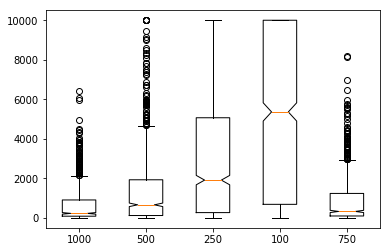

In [12]:
plt.boxplot(y, x, labels=x)
plt.show()

In [13]:
df_word_ev = pd.DataFrame(data_word_evol)
df_word_ev.to_csv("word_evo_data.csv")

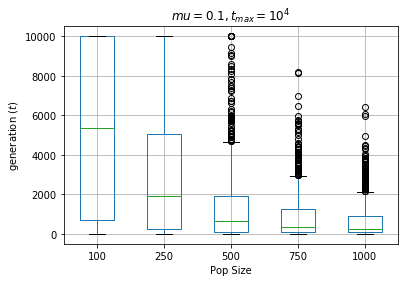

In [14]:
boxplot = df_word_ev.boxplot(column=[100, 250, 500, 750, 1000])
plt.xlabel('Pop Size')
plt.ylabel(r'generation ($t$)')
plt.title(r'$mu = 0.1, t_{max}=10^4$')
plt.savefig("box_plot.pdf")

plt.show()

In [15]:
success = []
for key in sorted(data_word_evol.keys()) : 
    p = np.array(data_word_evol[key])
    success.append([key,len(p[p<10000])])

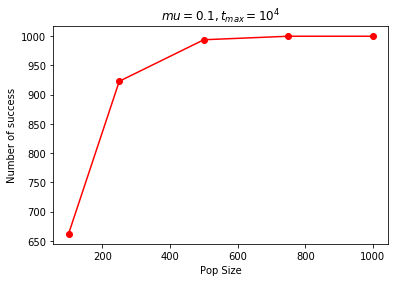

In [16]:
success = np.array(success)
plt.plot(success[:,0], success[:,1], 'r-o')
plt.xlabel('Pop Size')
plt.ylabel("Number of success")
plt.title(r'$mu = 0.1, t_{max}=10^4$')
plt.savefig("success.pdf")

plt.show()

In [17]:
def compute_fitnesses(dict_, pop) : 
    fitnesses = [] 
    for word in pop : 
        if word in dict_ : 
            fitnesses.append(1.)
        else : 
            fitnesses.append(0.)
    
    return fitnesses

[31, 23, 10]


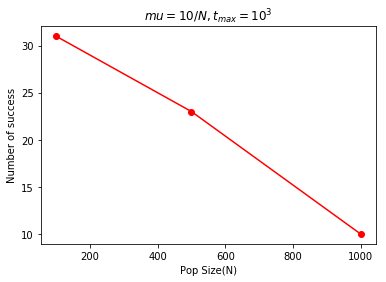

In [18]:

df = pd.read_csv("words.csv")
dict_= list(df["word"]) 
root_path = "Word_evol_5/"
successes = []
gen_data = []

for i in [100, 500, 1000] : 
    gens = []
    for j in range(100) : 
        
        gens.append(len(os.listdir(root_path+str(i)+"/"+str(j))))
    gen_data.append(gens)
    gens = np.array(gens) 
    successes.append(len(gens[gens<1000]))
print successes

success = np.array(success)
plt.plot([100,500,1000], successes, 'r-o')
plt.xlabel('Pop Size(N)')
plt.ylabel("Number of success")
plt.title(r'$mu = 10/N, t_{max}=10^3$')
plt.savefig(root_path+"success.pdf")

plt.show()
    

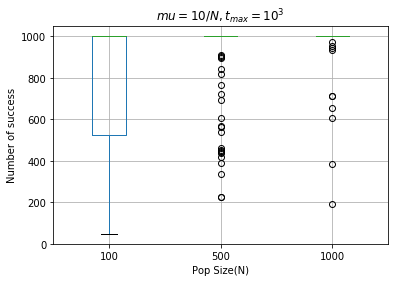

In [19]:

df_gen = pd.DataFrame(np.array(gen_data).T, columns=[100,500,1000])
boxplot = df_gen.boxplot(column=[100, 500, 1000])
plt.xlabel('Pop Size(N)')
plt.ylabel("Number of success")
plt.title(r'$mu = 10/N, t_{max}=10^3$')
plt.savefig("box_plot.pdf")

plt.show()

In [20]:
import multiprocessing as mp 


df = pd.read_csv("words.csv")
dict_= list(df["word"]) 
root_path = "Word_evol_5/500/"

In [21]:
def getFitnesses(i): 
    
    fitness_run = [1.]
    for file_ in os.listdir(root_path+str(i)) : 
        df = pd.read_csv(root_path+ str(i)+"/"+file_)
        fitness_run.append(np.mean(compute_fitnesses(dict_,df.get_values()[:,1])))
    return fitness_run


In [347]:
pool = mp.Pool(mp.cpu_count())
fit_data= pool.map(getFitnesses, range(100))
pool.close()

        

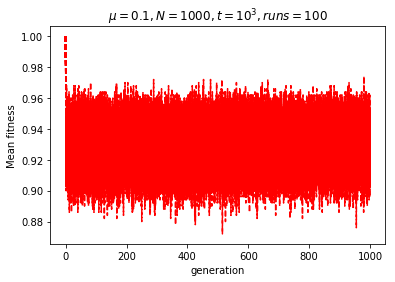

In [349]:
for fit in fit_data: 
    plt.plot(fit, 'r--')
plt.xlabel('generation')
plt.ylabel(r'Mean fitness')
plt.title(r"$\mu =0.1, N=1000, t=10^3, runs=100$")
plt.savefig(root_path+"median_fitness100run.pdf")
plt.show()

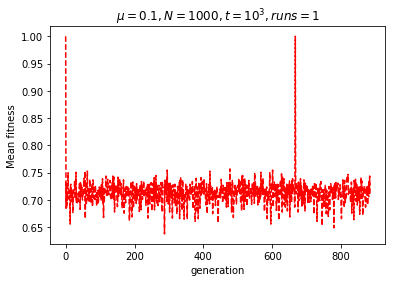

In [209]:

plt.plot(fit_data[1], 'r--')
plt.xlabel('generation')
plt.ylabel(r'Mean fitness')
plt.title(r"$\mu =0.1, N=1000, t=10^3, runs=1$")
plt.savefig(root_path+"men_fitness1run.pdf")
plt.show()

In [350]:
def compute_degree(pop):
    
    degrees = []
    for w1 in pop : 
        neighbors = []
        for w2 in pop : 
            if RNA.hamming_distance(w1,w2) == 1 : 
                if w2 in dict_ : 
                    neighbors.append(w2)
            
        degrees.append(float(len(set(neighbors))))
    
    return degrees

In [210]:
#Save Data in a csv file

pd.DataFrame(np.array(fit_data)).to_csv(root_path+"means_fitness_1000.csv")
#pd.DataFrame(np.array(mean_dgs)).to_csv(root_path+"means_degree_100.csv")

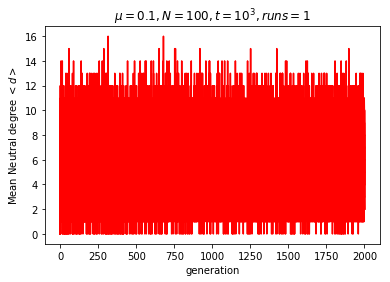

In [358]:
for dg_list in mean_dgs: 
    plt.plot(dg_list, "r-")
#plt.plot(np.ones(len(mean_dgs[0]))*9.21908, 'b--')
plt.xlabel('generation')
plt.ylabel(r'Mean Neutral degree $<d>$')
plt.title(r"$\mu =0.1, N=100, t=10^3, runs=1$")
plt.savefig(root_path+"max_degree1runs.pdf")
plt.show()

In [202]:

pd.DataFrame(np.array(fit_data)).to_csv(root_path+"means_fitness_100.csv")
pd.DataFrame(np.array(mean_dgs)).to_csv(root_path+"means_degree_100.csv")

In [99]:
df = pd.read_csv("words.csv")
dict_= list(df["word"])
print (dict_)

['abed', 'abet', 'aced', 'aged', 'aped', 'awed', 'axed', 'abut', 'acer', 'aces', 'acid', 'iced', 'ages', 'apes', 'apex', 'sped', 'awes', 'owed', 'axes', 'aver', 'acts', 'ales', 'ares', 'ices', 'amid', 'arid', 'avid', 'seed', 'shed', 'sled', 'spec', 'spew', 'spud', 'sued', 'awls', 'awns', 'ewes', 'owes', 'axis', 'exes', 'ever', 'over', 'ants', 'arts', 'alas', 'albs', 'alms', 'alps', 'arcs', 'area', 'arks', 'arms', 'ires', 'ores', 'ides', 'aria', 'grid', 'deed', 'feed', 'geed', 'heed', 'meed', 'need', 'peed', 'reed', 'seen', 'sees', 'seek', 'seem', 'seep', 'seer', 'send', 'teed', 'weed', 'shad', 'shew', 'shod', 'bled', 'fled', 'slew', 'slid', 'skew', 'stew', 'scud', 'spun', 'spur', 'stud', 'cued', 'hued', 'rued', 'sues', 'suet', 'surd', 'ails', 'owls', 'owns', 'eves', 'ewer', 'eyes', 'odes', 'ones', 'even', 'oner', 'oven', 'ante', 'anti', 'anus', 'arty', 'aims', 'elms', 'amps', 'asps', 'arch', 'urea', 'asks', 'auks', 'irks', 'army', 'iris', 'orbs', 'idea', 'idem', 'grad', 'grim', 'grin',

In [103]:
for w in dict_ : 
    if type(w) == str : 
        #print(w)
        list_w = list(w)
        if "'" in list_w or len(w) !=4 : 
            print ("remove ",w)
            dict_.remove(w)

In [104]:
pd.DataFrame(np.array(dict_), columns=['word']).to_csv("words.csv")

In [107]:
edges = []

for w1 in dict_ : 
    for w2 in dict_ : 
        if hamming(str(w1),str(w2)) == 1 : 
            if tuple(reversed((str(w1),str(w2)))) not in edges : 
                edges.append((str(w1),str(w2)))
print (len(edges))

KeyboardInterrupt: 

In [77]:
G = nx.Graph()
G.add_nodes_from(dict_)

G.add_edges_from(edges)


In [78]:
for g in list(nx.connected_component_subgraphs(G)): 
    print len(g.nodes)

2257


In [79]:
assert (np.array_equal(np.ones(len(dict_))*4,np.array([float(len(w)) for w in dict_ ])))

In [81]:
degrees= G.degree

degrees = np.array(degrees) 

print degrees.shape



(2257, 2)


In [82]:
data = []

for node in G.nodes : 
    data.append([node, float(G.degree(node)), list(np.array(list(G.edges(node)))[:,1])])

In [83]:
data = np.array(data)
print data.shape

(2257, 3)


In [84]:
pd.DataFrame(data, columns=['word','degree','neighbor']).to_csv('graph_data.csv')

In [94]:
graph_data = pd.read_csv("graph_data.csv")
print (graph_data.describe())

       Unnamed: 0       degree
count   2257.0000  2257.000000
mean    1128.0000     9.184759
std      651.6841     5.300373
min        0.0000     1.000000
25%      564.0000     5.000000
50%     1128.0000     9.000000
75%     1692.0000    13.000000
max     2256.0000    26.000000


In [95]:
np.max(np.array(degrees[:,1], dtype=float))

NameError: name 'degrees' is not defined

In [91]:
result = []
for i in range(30000) : 
    result.append(float(graph_data[graph_data['word']=='opus']['degree']))

In [107]:
def getFreqs(root_path, word_) : 
    freqs = []
    for i in range(10) : 
        dg_list = []
        for g in range(len(os.listdir(root_path+str(i)+"/selected/"))): 
            df = pd.read_csv(root_path+ str(i)+"/selected/gen"+str(g)+".csv")
            dg_list.append(list(df.get_values()[:,1]).count(word_))

        freqs.append(dg_list)

        print(i)
    return freqs

In [110]:
graph_data[graph_data['word']==word_]['neighbor']


528    ['onus', 'opts']
Name: neighbor, dtype: object

In [21]:
levy_data = [[('GCUACGGCGGCGAUUGA', 100), ('GGACAGCCACCUAAUGG', 77)], [('GCAUAGGCACCGGUGGG', 93), ('GCGGUUGCUUGGGGAGG', 100)], [('GCAAAUGCGCCGGAGGG', 99), ('CCAUUUGGGCCUGCGGG', 98)], [('GCGUCCGCCUUAAAAUA', 100), ('GGGUGUCCGCAAGGUUU', 100)], [('CCAUAAGGGGCGCAGGC', 57), ('GCUUCCGCACCUCCUGG', 59)], [('CCCCAGGGAGCGGUACC', 100), ('GCUAUUGCCUGACCCCG', 100)], [('GCAAAUGCAAAGCAGGA', 100), ('GGACGUCCACCGGAAGG', 87)], [('GGGUCCCCUGCGAGAGC', 53), ('GGGUUACCUGCGUUAGC', 56)], [('GCACAUGCACCUCGUGA', 100), ('GCGCGCGCAUAACAUUU', 100)], [('GCGUCUGCUGUAAUCUG', 100), ('GCGUUGGCUGGGAGACC', 39)], [('GGGUCGCCAGCUUGUGC', 52), ('GGGUAACCACCGUAGGG', 98)], [('GCGAAUGCCAAUGAAUC', 100), ('GCUUAGGCCGGGGAACC', 41)], [('GCUAUAGCAUUUGAUAA', 100), ('GCAUUUGCUUCAUAUCA', 100)], [('GCGUAAGCAGGGAGACC', 96), ('GCUCUUGCAGGGACACC', 83)], [('GGACUUCCGGCCAAGGC', 53), ('GCGGCAGCACCCAAGGG', 20)], [('CCGGAUGGGUAAACUCG', 100), ('GGAAUUCCACCUCUUGG', 67)], [('GCAUAAGCGGCCAUGGU', 100), ('GCGGAAGCUGGGGUACC', 26)], [('GCGAAUGCGGUUGUGUC', 100), ('GCAAUCGCCGGGGUACC', 70)], [('GCACGUGCAACACAAGG', 100), ('GCAUGAGCUCCGAGGGG', 84)], [('CCUCUUGGGCCGUAGGG', 99), ('GGUGUCCCAGCUUUUGC', 74)], [('GCACUUGCGUACUGAUU', 100), ('GCAAAUGCAUGAUCUCG', 100)], [('GCUUAUGCUACUCAAAA', 100), ('GCAUACGCGGCGUCAGC', 85)], [('GGAAAGCCGGCGGAAGC', 37), ('GGUACGCCACAUGUCGU', 100)], [('GCAGGCGCGCCCCACCA', 100), ('GGGAAUCCAGGGUAACC', 62)], [('GCUGUUGCAGUCACGCG', 100), ('GCACGCGCACCUUAUGG', 44)], [('GCCAUGGCAAUUGAAUG', 100), ('GCCAUAGCAGCGUCGAU', 100)], [('GCUCCAGCACCGACGGG', 83), ('CCUCCCGGAGCUCAUGC', 32)], [('GGGUAUCCGGUAAGACA', 100), ('GCAGAUGCGCCGCGAGG', 89)], [('GGACUUCCGACAAACAC', 100), ('GCAACAGCCCCUAAUGG', 43)], [('CCGUCCGGAUGUAAUCG', 100), ('CCGUCGGGCGCUAAUGC', 97)], [('CCUUUUGGGAUUAAAAU', 100), ('GCGAGCGCGAAAACUUG', 100)], [('GCUGGUGCAAUGACGCU', 100), ('CCUUUUGGUCCGUUAGG', 47)], [('GCUUAGGCAAACUUACA', 100), ('GGAUAACCAAAAUACCC', 100)], [('GCUCGCGCACUUACAUA', 100), ('GGGGAACCGGUCCAGCC', 100)], [('GCAAUUGCGGCGUCGGC', 24), ('GGGAAUCCGGCGUUAGC', 75)], [('GCGCCAGCCAUUAUAUC', 100), ('GCACGCGCGCCCUCGGG', 55)], [('GCGAUGGCAAUGCAUGU', 100), ('GGACCUCCAAUAUGUGU', 100)], [('GCGGUAGCUGGUUUAAU', 100), ('GCAAAUGCGGCGUAAGC', 64)], [('GCGACUGCAGCUUAUGC', 96), ('GCAUCAGCGACUAUCCU', 100)], [('GGGAGUCCUGCGUUAGC', 100), ('CCUAAGGGUGAGCAUAA', 100)], [('GGAGUUCCGGUUGGUAG', 100), ('CCUAAGGGUCCGACAGG', 42)], [('GCACUGGCGCUAGAUAA', 100), ('GCGAAGGCAGGGUUACC', 39)], [('GCCCCGGCAGCGCUAGC', 30), ('GCAGAAGCUCCGCCGGG', 15)], [('GCGCCCGCACCUAAUGG', 98), ('GGGUUACCAAGUUUCGC', 100)], [('GCGUAAGCUCCGAGAGG', 39), ('GCGCUAGCACCUUUGGG', 76)], [('GGGAUGCCGAAGUACAA', 100), ('GGUAAUCCGCGUUCGGC', 100)], [('GCCACGGCUCUGUUACG', 100), ('GCUAUUGCGGAAUAUCC', 100)], [('CCGUGGGGAGCUUGUGC', 73), ('GGAAGUCCGCUAGUUGC', 100)], [('GCGGUGGCUUGAUCUGU', 100), ('GCUACGGCGAUUCAGUC', 100)], [('GCUAGUGCAUAAAAAAG', 100), ('GGAGAGCCAGCUGAUGC', 13)], [('CCAACAGGACGCACGAA', 100), ('GCUUCGGCUGGGUUACC', 90)], [('CCGCCUGGAUUCGUCUG', 100), ('GGCUUACCGUAGAAAAU', 100)], [('GCAAAUGCACAGUUAGA', 100), ('GGAUGCCCGAAAUACAU', 100)], [('GCGGAGGCAUUCAUGAG', 100), ('GCGUGAGCGAAGGACUA', 100)], [('GCAAUUGCAGGGCUACC', 93), ('GCUACAGCAAGUCUCGU', 100)], [('GGGUUUCCUGCGGUAGC', 91), ('GCGGCCGCACUUAAUGC', 100)], [('GGAAGGCCGGGAUAUAG', 100), ('CCUUAUGGGCCGGAAGG', 28)], [('CCAAAAGGGCCGUGGGG', 53), ('GCUUAGGCAGGGUUACC', 81)], [('GCAACUGCACCGUCAGG', 58), ('GCUCUUGCUCCGCCAGG', 64)], [('GCACAAGCCCCGCAAGG', 77), ('GGUCGCCCGAUUGUACU', 100)], [('GCGCAAGCGAUAAGGAG', 100), ('GCUAGUGCCGCGUGAGC', 66)], [('GGGCAGCCUGAAAAAGA', 100), ('GCAAUUGCGGACGGUUA', 100)], [('GCACACGCGCCGCCAGG', 45), ('GGGAUACCAGGGGAACC', 93)], [('CCUGUCGGACCUUAUGG', 27), ('GCGCCUGCAGCUCUUGC', 31)], [('GGACACCCAUCAAGAUC', 100), ('CGGAGACGAGCGGCGGC', 20)], [('GCACCCGCACCAGAUUA', 100), ('GCUUGUGCCGGGAAACC', 44)], [('GCUUACGCUCCGCAAGG', 68), ('GCCUCAGCACCGUUAGG', 34)], [('GCGGUGGCAUCUGGUAC', 100), ('CCGGGAGGAGGGUCACC', 74)], [('GGAUAACCACACCAAGA', 100), ('GCCGCUGCACCGUUAGG', 63)], [('GCCGGCGCAAUUAAGUA', 100), ('GGACCCCCGCGGCAGGC', 100)], [('GCCUACGCUCAUAUUGG', 100), ('GCAUGAGCGCCGAGGGG', 48)], [('AAAAAUCCGGGAACCCC', 100), ('CGGUCACGAGCUUUUGC', 48)], [('GGAGAUCCAGGGAGACC', 77), ('GGGGUUCCAGGGCAACC', 38)], [('CCGCUAGGCCAAACCCG', 100), ('GCACAUGCUUUCCCCCG', 100)], [('GGGAAGCCACACUAAAG', 100), ('CCAAAUGGAGCCGAGGC', 38)], [('GCUGAAGCACCUCGUGG', 42), ('GGAGCUCCAGCGAUAGC', 61)], [('GCGCAAGCCGGGAAGCC', 73), ('GGGACCCCGGAGGAUUC', 100)], [('GCUUAUGCGAUCAAGAU', 100), ('GCCCGUGCGCUGAAUGC', 100)], [('GCUCUCGCGGGAACCAA', 100), ('CCGUAGGGACCUGGUGG', 71)], [('GCUCCCGCUGUGAUAUG', 100), ('GGCAUACCGGAACUUCC', 100)], [('GCUUCUGCACAGACUGA', 100), ('CCAAAGGGGGCGGAAGC', 23)], [('GCAUGUGCUGAUUUAUC', 100), ('CCAAGAGGACCUAAUGG', 61)], [('GCGAUCGCUUUACACAG', 100), ('GCCAAGGCGCCGAAUUU', 100)], [('GCUAACGCGCCUACGGG', 74), ('GGUGGACCGCGGAGCGC', 100)], [('GCGCAUGCAAACCUUGA', 100), ('GGAUUGCCAGGGCCGCC', 89)], [('UGAACUUACGGGAUGCC', 100), ('GCAAGGGCUCCGGAGGG', 44)], [('GGGUAGCCAGCGCGAGC', 29), ('GCGUUAGCACCGCCAGG', 39)], [('GCGAAUGCAAGUAUGUG', 100), ('GGAAAGCCGCGCACAGC', 100)], [('CCUAGUGGCGCUCGUGC', 61), ('GCCAACGCGCCGGAAGG', 14)], [('GCCACUGCGCCGUUAGG', 34), ('CCACUAGGAGGGAAACC', 36)], [('GUCACAGACUACCAUCA', 100), ('CCAAUAGGAGCUUAUGC', 81)], [('GCCCAGGCGCUCACGGA', 100), ('CCAAAAGGGGCCUAGCC', 100)], [('GCCUAUGGUACACAGUA', 100), ('GCACUGGCACUGUACUC', 100)], [('GCGUGUGCACCGUCGGG', 100), ('GCGACAGCAAAAACCAC', 100)], [('GCAGGCGCAGCGACGGC', 46), ('GCAUUCGCUGGGACACC', 78)], [('GCACCGGCAAGUUCUUA', 100), ('GGAAAUCCGGCGAUGGC', 87)], [('GCCAAGGCGCUACAUGC', 100), ('GCGCAGGCCCCUCUUGG', 34)], [('GCAGUGGCUGGGGAACC', 62), ('CCGAAAGGACCGUCAGG', 86)], [('CCACAGGGAUUGUACUA', 100), ('GGAAACCCAGCGUUAGC', 48)], [('GGGGAACCGCGACAGGC', 100), ('GGGUAUCCGGACUGUCC', 100)], [('GUUGUAGGCGCGUAGGC', 100), ('GGGACGCCGGCGAGAGC', 29)], [('GCAAAAGCACAAUUCCU', 100), ('GCGUUUGCAACCGUUGG', 100)], [('GGGAGACCUGGGGGACC', 76), ('GGCCGACCGGAUUAUCC', 100)], [('GCCACUGCGAAUCACCG', 100), ('GGUAGCCCGCGUCAAGC', 100)], [('GCAUUUGCCCCUCUUGG', 67), ('GGCGAGCCAGGGACACC', 48)], [('GCGGUUGCAUGUGAAUC', 100), ('GGUCAACCGUUAGUCGA', 100)], [('GCUGAUGCAGUGAUACC', 100), ('GCGAAGGCCAUUUUAGA', 100)], [('GCUUCAGCAGGGAUACC', 69), ('GGACUACCAGCGAAGGC', 22)], [('GCGCCUGCUGAUCACAG', 100), ('GCGGGAGCAGCGAUGGC', 95)], [('GCAUAAGCAGGGUAACC', 86), ('GGGACUCCGGAUUAUCC', 100)], [('GCAGUCGCAUAACGUGU', 100), ('GGACAACCAGGGAUGCC', 35)], [('GCGUCAGCCUACAGUUA', 100), ('GCAACCGCCCCUUAUGG', 52)], [('GGUGUACCGUUAACAAU', 100), ('GCGAGUGCUCCGGUGGG', 17)], [('GGGAACCCAGCGUAAGC', 68), ('GCACGUGCAGAAUCUUC', 100)], [('GCGCUGGCUGACUUACA', 100), ('GCGCCAGCGAGAUAUCG', 100)], [('GCAAUUGCAUCUAAACG', 100), ('CCAUGCGGGUACAUCAC', 100)], [('GCGGUUGCACCUUUGGG', 35), ('CCACACGGACCCAUACC', 100)], [('GCCCCCGCUAACUGAGU', 100), ('GGGGAACCAGCUGCGGC', 56)], [('GCUAUAGCGCCCCAGGG', 52), ('GCGUUAGCAGCUUAUGC', 59)], [('CCCACGGGAAUCUAAUA', 100), ('CCAAUCGGAGGACAAUA', 100)], [('GCAUCUGCACCUCUUGG', 78), ('GCACACGCCACCACACC', 100)], [('CCGACAGGGCUGAUCCA', 100), ('CCGCCAGGACCGAAGGG', 85)], [('GCGAAGGCUCCGUAAGG', 22), ('GCAAUAGCCCCUCCCGG', 100)], [('GCAAAAGCCCAUGAACC', 100), ('GCCAGGGCGAUUUGAUG', 100)], [('GGUUAACCAGGGACGCC', 88), ('GGGAAGCCUACAACGUG', 100)], [('GCACAUGCAGCCAAGGC', 81), ('AACAAAGUUCCGCAAGG', 100)], [('GCGUUAGCUGCCUCGGC', 97), ('GGGAGCCCGGUCGAGCC', 100)], [('GCUAUUGCCAGUACCGG', 100), ('CCAACAGGACCCUAGGG', 37)], [('GCAUAUGCUCCGUCGGG', 97), ('GCACGUGCCGGGAAACC', 58)], [('GGGAGCCCGAGGUCAAA', 100), ('GCGCAGGCGUCCAUAAG', 100)], [('GGACCUCCACCUUAUGG', 71), ('GGGUGACCAGGGCAACC', 11)], [('GCAUGCGCGCCACUGGU', 100), ('GCACAUGCCCUAGCUAU', 100)], [('GCGGACGCGAGUUGUAC', 100), ('GGUACCCCGGACUGUCC', 100)], [('CCUUAUGGUACCCGACU', 100), ('GGAAGGCCGGGGCACCC', 100)], [('GGGUUUCCGACAGAUCU', 100), ('GCGAAAGCACCCGAGGG', 47)], [('GCAAUUGCAGGAAAGUG', 100), ('CCAGGAGGAGCGUUAGC', 83)], [('GGGAUCCCUGGUAGACG', 100), ('GGUACUCCCCCGACAGG', 68)], [('GCAAACGCAGGGGUACC', 74), ('GCCUAGGCCGCUCGUGC', 31)], [('GGUCAUCCGCGUAGAGC', 100), ('CCUCAUGGCGCUAAUGC', 83)], [('GCAUCCGCACAAUAUCG', 100), ('GGCUAACCACCUCAUGG', 40)], [('CCGUUAGGAGCCCAGGC', 77), ('GCACACGCCCUGUUCUC', 100)], [('GCACCUGCAGCUUUUGC', 56), ('GGGGAACCGCCGUAAGG', 70)], [('GCCCCCGCACGUCGUAC', 100), ('CCAUCCGGAGCGACAGC', 24)], [('GCGUACGCGAUCAGUUU', 100), ('GCACUGCGCGCGAUAGC', 100)], [('GCAUAUGCUUACAUCGU', 100), ('GGAAUCCCAGCUUAUGC', 89)], [('GGUGGGCCAGAUAUUUC', 100), ('GCAACUGCGGCUCCGGC', 87)], [('GGGACACCUUCAUGAUG', 100), ('CCGCCGGGCUGAGCAAG', 100)], [('GCGCAAGCCUUCGAUAA', 100), ('CCGCUGGGGCUAAUUAG', 100)], [('GCUCCAGCAUAACCAUG', 100), ('GCUUCGGCACCUUAUGG', 61)], [('GGACGUCCGAAUUAUCU', 100), ('CCAAAUGGGGCGAGGGC', 34)], [('GGGCUACCACAUAUCCG', 100), ('GCAUCUGCAGCGAAGGC', 49)], [('GCCUCUGCACCGAUAGG', 77), ('CCUCCGGGACAUGAAUG', 100)], [('GCAAACGCAGGGCUCUU', 100), ('CCAAGUGGACCGAUAGG', 51)], [('CCACAGGGGCGUAUGGC', 100), ('GCUCUUGCACCCUCGGG', 96)], [('GCAGCAGCGUUCAGGAG', 100), ('GCGUGAGCUAUUGUAUG', 100)], [('GCCUAGGCUAAACUCAG', 100), ('GCCGAGGCAGCGAGAGC', 94)], [('GCGCAAGCACCUACUGG', 55), ('GGGAGACCAGGGAAACC', 67)], [('GCGCGUGCACGAUAUAC', 100), ('GCUAAUGCUACCCACUG', 100)], [('GCAUAUGCCGGGGGACC', 50), ('GCUACCGCACUAUUUGG', 100)], [('CCUGGUGGGUAAGUGUG', 100), ('GCCUUCGCAGUACUCUU', 100)], [('GCAUUCGCAGGGACACC', 74), ('GCGGACGCACAUCUUUU', 100)], [('GCUAAGGCUCCGAUAGG', 48), ('UGCAGAUGUCCGAUAGG', 100)], [('GCAAGAGCCCUCCAGUA', 100), ('GGAAUCCCUGAAAAUUA', 100)], [('CCGUAGGGAGCUUGUGC', 66), ('GGGUCACCGGCGCUGGC', 74)], [('GCAGGCGCACCUUAUGG', 54), ('CCGCGAGGGCCGAGAGG', 46)], [('GGGGGACCAGGUCUAAC', 100), ('GCGCUGGCACCUACUGG', 77)], [('GCGAUGGCACAAUUAGA', 100), ('GCUGAAGCACCGAGGGG', 61)], [('GGACUCCCGAGAAAAGC', 100), ('GCUUAGGCCCCUAAUGG', 70)], [('GCAGCUGCUCCGAAGGG', 95), ('GGUUAGCCAGCUCUUGC', 73)], [('GCACAUGCGCCGCAAGG', 81), ('CCGCAGGGACUUGAACC', 100)], [('GCUUUUGCGAACUACAG', 100), ('GCGCGAGCUGUACGUUA', 100)], [('GGUCGCCCGGCACUGCC', 100), ('GCCCCGGCACCUGAUGG', 59)], [('GCGAUUGCGAUAAAGGA', 100), ('GGGCUGCCUUACUUUCU', 100)], [('UCAUGAUCUCCGUUAGG', 100), ('GCCUCGGCACCUUCGGG', 48)], [('GGAAACCCUGCGUUAGC', 17), ('CCAGAUGGACCCAAGGG', 45)], [('GCGGCCGCAUCACAAAC', 100), ('GCAGUCGCAGCGUAGGC', 66)], [('GCUCAAGCAAACAACAU', 100), ('GCUCAUGCAGCUAUUGC', 80)], [('GGGGCACCGAUCCAAAU', 100), ('GCUAAUGCCGCGUGAGC', 45)], [('GCCCAUGCAUUUGACCU', 100), ('GCAGCGGCACCAUUACG', 100)], [('GCGAUGGCGGCGGAGGC', 30), ('GGAACCCCGGCGAUGGC', 40)], [('GCGUGGGCCAGACUAAA', 100), ('GCUCUUGCGUUAUUAUA', 100)], [('GCGUUAGCCAUUUGUAC', 100), ('GGUUCUCCGCUUAUUGC', 100)], [('GCAAACGCGGCGGGAGC', 52), ('GCCAGAGCAGGGAGACC', 58)], [('GCAAAGGCACCUUCGGG', 41), ('GCGAAUGCACCUUUUGG', 50)], [('GGGAGACCGGCGGAAGC', 38), ('GGACUACCAGAAUCGCA', 100)], [('GCACUUGCCGAUAGACC', 100), ('GGGUCUCCAAGAUAUGG', 100)], [('GCUGCUGCGAAUUGACA', 100), ('GCGCAAGCCGUAUUCCA', 100)], [('GCGCAGGCAGGGUAACC', 12), ('GCAAGCGCGCCCAAGGG', 33)], [('GCUAGAGCAAACAAUGC', 100), ('CCGCCAGGGCCGAAAGG', 79)], [('GCAUCAGCAAAUAGCAU', 100), ('GCUGUUGCACCUCCUGG', 100)], [('GGUGAACCAGCGACGGC', 69), ('GGAUUGCCAGGGCCACC', 74)], [('GGGAUGCCAGGAUUAGA', 100), ('CCGCACGGAUUUAAAGG', 100)], [('UAACAACGACCGACAGG', 100), ('GCACUUGCCGCUCCUGC', 66)], [('GGUGCCCCGAUUAGUUC', 100), ('GCUUAGGCGGAUCUUCC', 100)], [('GCGCAUGCCAUACUUUG', 100), ('GCUAUUGCAACAAGAUU', 100)], [('GCUUAUGCGACCGCACA', 100), ('GGGCUCCCGCGUUAAGC', 100)], [('GCUAAUGCCCCGAAAGG', 99), ('GCGUAUGCGAUCUAAUG', 100)], [('GCGUAAGCCCCUGUUGG', 43), ('GCAUCCGCGGAAACUCC', 100)], [('CCAGUCGGAUGAGUUAU', 100), ('CCGUAAGGGCCGGUAGG', 63)], [('GGAAAACCGACCUCUAA', 100), ('CCUGAUGGAGCUAUUGC', 47)], [('GGAUGUCCACCUAAGGG', 69), ('CCAUGAGGACCGAGAGG', 85)], [('GCUCGUGCUCCGUUAGG', 24), ('GCGCAUGCCGGGACACC', 81)], [('GCGGAUGCAGAGACUCG', 100), ('GGACAACCGCGAUACGC', 100)], [('GCAGUAGCAGGGGGACC', 72), ('GGGAAACCGCCGGGAGG', 40)], [('GGGAGGCCAGAAAGCAU', 100), ('GCUUUUGCUAGUUGAUA', 100)], [('GCAAUGGCUCUUUUGAA', 100), ('GCGUGCGCUGGGAAACC', 57)], [('GCCAGAGCAGAGAGCCC', 100), ('GGGCAGCCUGGGUUACC', 97)], [('GCCUCGGCUGACUACAU', 100), ('CCAAUAGGAGCGCGAGC', 11)], [('GCUCUCGCUCCUUUCGA', 100), ('GCAUGAGCCCCUAAUGG', 20)], [('GCAUCUGCGCCGCCGGG', 94), ('CCAUUAGGGGCGACGGC', 92)], [('GCGAUAGCACCUAGUGG', 75), ('GCCAGCGCGAGUCCACG', 100)], [('GGGUCCCCGAGGUCGUC', 100), ('GGAUUCCCUUAAAAGAU', 100)], [('GCAGCUGCCCAUGAUGU', 100), ('GCGCCAGCCAUGUAUUG', 100)], [('GCGGAGGCGAAGCAUUA', 100), ('GCGCAAGCUGGGAAACC', 70)], [('GCCCCAGCAGUCCGUUC', 100), ('GCGAAAGCAGGGAAACC', 92)], [('GGUUCUCCUAUAGGUCC', 100), ('GCUUGCGCACCUUUGGG', 79)], [('CCCGCGGGACCUCAUGG', 57), ('GGAGGGCCAGGGAAACC', 78)], [('GCAUCAGCCCCGCAAGG', 68), ('AUUGAAUCAGGGGAGCC', 100)], [('GGAAGCCCGCUGGAUGC', 100), ('GCGAGUGCAAACGAUUC', 100)], [('GGCGUACCGGUUUAAUC', 100), ('CCUCCCGGAGCUCUUGC', 36)], [('GCCUCUGCAACCGACUU', 100), ('GCGGGGGCUGGUUAAUA', 100)], [('GCUGCGGCUUUAAAACU', 100), ('GGUUUACCAAGCAGAGC', 100)], [('UCAAUUAGUGCCAAGGC', 100), ('GCGCAUGCCCCGUUACG', 100)], [('GCUUGCGCACCCUAGGG', 70), ('GCUAUUGCCCCUCCUGG', 79)], [('GGGGAUCCACGGAUAUG', 100), ('GCUUUUGCGCCCCAGGG', 60)], [('GGUCAUCCUGAAAAAUG', 100), ('CCUUGCGGACCUAAUGG', 33)], [('CCUACUGGAGUGCUAUA', 100), ('GGAUAGCCAGCGGAAGC', 21)], [('GCAUUGGCGCUAUAACA', 100), ('GCGUGGGCAAGUAAACG', 100)], [('GCCAAAGCAAACGCCGG', 100), ('GCUAUUGCCGCUAUUGC', 88)], [('GCAGGUGCAUCAAAAUA', 100), ('GGAAAACCACCGCGAGG', 55)], [('GGACAUCCGUUUAGUUU', 100), ('GGAUCCCCUGCGACGGC', 27)], [('GGGAAACCGCGUAUGGC', 100), ('GGGACGCCGAGUUAACC', 100)], [('GCACCUGCAGACACGGA', 100), ('GCACGUGCAGACUCCGG', 100)], [('GCUACUGCAGUUCGCUU', 100), ('GGAUAACCACCGAAAGG', 44)], [('GCAUUGGCGGAAAUAAA', 100), ('GCGAAGGCAAAAGUUAG', 100)], [('GCACACGCGGCGAAAGC', 66), ('GCCGUAGCACCUAUUGG', 86)], [('GGGAGGCCACCGAGAGG', 79), ('GCGCUAGCGAUUACGGU', 100)], [('GCAUAAGCCCCUCCUGG', 41), ('GGGAAUCCAGCGGAAGC', 92)], [('GGUUCACCAGCGAAGGC', 44), ('GCGGAAGCUGGGGAACC', 55)], [('GGGUGUCCAUUCGUGUA', 100), ('GCGUACGCAGCUCUUGC', 48)], [('CCUUGUGGCGCUGUUGC', 29), ('GCAACAGCGCCGGGGGG', 92)], [('GCUCCUGCAUGUUUUCC', 100), ('GCAGAUGCUCCGUUAGG', 85)], [('GCAUCUGCAGCGUGAGC', 94), ('GCAAGCGCGUAGUUGUC', 100)], [('CCCUCGGGACAUUAUGU', 100), ('GGGAACCCGGCGCUGGC', 51)], [('GAUAAGUGCGCGUGAGC', 100), ('GGGUUUCCAGCUUGUGC', 89)], [('CCAUGCUGGUAGAUAUA', 100), ('GCGCGCGCACCCCUAAU', 100)], [('GCAUGCGCACCGAAAGG', 34), ('GGAAUUCCGUAUGCGAA', 100)], [('GCAAGGGCUCCGUAAGG', 13), ('GCGAUGGCAGCCCAGGC', 34)], [('CCGUUAGGGGCGUGAGC', 67), ('GCAACUGCCGUCCACAG', 100)], [('GCCUAAGCAGUAUAGAU', 100), ('GCGGAUGCACCUGGUGG', 79)], [('GGGUGACCAUACACAUA', 100), ('CCGCCCGGACCGCUAGG', 44)], [('GCUAGGGCAUCAUGAUU', 100), ('GCUCGCGCACCUUAGGG', 37)], [('GCUACGGCGUUAAGAGU', 100), ('GCAUUUGCGGCGUAAGC', 61)], [('GCAUUGGCACUAUCCGC', 100), ('GCCUUUGCACCGUUAGG', 42)], [('GGAAACCCACUUGUGUA', 100), ('GCACUUGCAGCGCCGGC', 62)], [('GGGACACCUCAGCGAAG', 100), ('GGGGGACCGUGAGAUUA', 100)], [('CCGCCGGGAACCAAUAU', 100), ('GCUUCUGCAGCCUCGGC', 54)], [('GGAACGCCGAUGCUAUC', 100), ('GGGAAACCAGCGCGGGC', 46)], [('GCUUAGGCAGCGGCAGC', 30), ('GCGUUAGCGGUUUCUAG', 100)], [('GCCAUAGCACCGAUAGG', 36), ('GCACGCGCACCUCCGGG', 42)], [('GCACAGGCAAACGCAAG', 100), ('GGUACACCGUAGGAAAU', 100)], [('GCGAAAGCACGUCUUUU', 100), ('GCUAGCGCUAACCAAAA', 100)], [('GGGAUACCUCGAGCUAG', 100), ('GGUUCUCCGGCGUGGGC', 53)], [('GCAUUUGCUGUCUUAAA', 100), ('GGAGGCCCAGCUAAUGC', 81)], [('GGGAAUCCUGCGAUAGC', 62), ('GCGUACGCGGACUAUCC', 100)], [('GGACAGCCGGCGAGAGC', 99), ('CCGAUCGGACCGCUAGG', 76)], [('GCAAUUGCUAAUGUACA', 100), ('GCGAGGGCAGGGUUACC', 97)], [('GCUAACGCUACACAAGA', 100), ('GGUAUCCCAGCGUGAGC', 41)], [('GCGCAGGCUGGGUUACC', 40), ('GCGGCCGCGAGAGAAUA', 100)], [('GCAAAUGCUAACUAACU', 100), ('GCGUAAGCAGGGCAACC', 76)], [('GCGUUUGCUUAUACAGG', 100), ('GCGUGUGCCGGGGAACC', 81)], [('GCAAGAGCACGUUCAAU', 100), ('GGACUCCCGGACGCUCC', 100)], [('GCAAAAGCGUUCUUUCU', 100), ('GCAAGGGCUUUAAUAGA', 100)], [('GCGACGGCCCCUUAUGG', 40), ('GCCUCCGCACCUUAUGG', 54)], [('CCAGAGGGGGUUUAAAG', 100), ('GGAACUCCACAAACAUC', 100)], [('GCAAUGGCUGAUACUGC', 100), ('GCUUAGGCAGCGGUAGC', 64)], [('GGACAUCCGGCAUUUAC', 100), ('GCCUCGGCCGCUAUUGC', 51)], [('GCGUGAGCAACACACCU', 100), ('GCAGAAGCACCGCUAGG', 61)], [('GCGCAAGCGGGAUACCC', 100), ('GGAGAACCGCGUUUAGC', 100)], [('GGAUAUCCAGCUUGUGC', 86), ('GGAAUACCAGGGACGCC', 59)], [('GCUUGUGCUCUAAUAAA', 100), ('CCGAAAGGACCGCAAGG', 62)], [('CCGUUUGGGCCGUGAGG', 43), ('GUCUAAAGACAUUUCGC', 100)], [('GCGAGGGCUGCGAAAGC', 70), ('GCCCCCGCGCCGACAGG', 79)], [('GCGUCGGCGUUAUGAAA', 100), ('GCGGGAGCAGUCGGGUA', 100)], [('GCGUAGGCGGUCGAGAA', 100), ('GCGAAAGCACCGAGGGG', 40)], [('CCAUGAGGGUUUCGACU', 100), ('GCGAAAGCACCCCAGGG', 24)], [('GCAGAUGCAGGGCUACC', 80), ('GGACAUCCUAAAAUAGA', 100)], [('GCAAAAGCUUGUUCUUC', 100), ('GCUAAGGCAUUUGUCGA', 100)], [('GCGAAUGCAAUACGAAG', 100), ('GCAGUAGCGGCGUAGGC', 76)], [('GCCGUGGCACGAACAAA', 100), ('GCAUUAGCACCUAAGGG', 76)], [('GGCCAACCACUACAACU', 100), ('GCUAUUGCACCUUCUGG', 60)], [('GCGAUGGCAUUCCUGAU', 100), ('GCAAGAGCCCCGUUAGG', 90)], [('GGAAUUCCGCGGAAGGC', 100), ('CCAGGAGGAGCGAGAGC', 69)], [('GGAGAACCAGGGGCGCC', 70), ('GCGUAGGCCGGGUGACC', 34)], [('GCAACCGCAAUUUAACG', 100), ('GCUGGUGCAACUCGUGA', 100)], [('GCACUUGCGCCUCGACG', 100), ('GCAUUUGCACCCCAGGG', 49)], [('GCUGGCGCACCUUAGGG', 15), ('GCACGGGCAGCUAUUGC', 78)], [('GGGAUGCCACCUUUUGG', 96), ('GCGUGUGCAGGGGAACC', 23)], [('GCUGACGCAGGGUGACC', 60), ('GCGCUUGCCCCUAUUGG', 63)], [('GCAACUGCUGGGUAACC', 99), ('GGAGAGCCAGGGUGACC', 30)], [('GGAUUCCCAGCUGAUGC', 90), ('CCACUAGGGCCGGCAGG', 82)], [('GCGCAUGCGUAAUACAU', 100), ('GGUACUCCUGCGACAGC', 42)], [('GGGCGCCCGAAUCGAGA', 100), ('GCCUUAGCGUGUGUUCU', 100)], [('CCAUAAGGAGCGCUGGC', 51), ('GCGGGAGCCCUAUUACU', 100)], [('GCUAACGCACCUGAUGG', 21), ('GCGUAAGCACCGUUGGG', 65)], [('GGGUGGCCGGCGUGAGC', 72), ('GGUUCCCCAGCGUUAGC', 58)], [('GGGUAACCUUAUUGCUG', 100), ('GCCUAGGCAUGAAAAGU', 100)], [('GCAACCGCUUGAUAACA', 100), ('GGAGAGCCGCCGGAAGG', 27)], [('GGAAAUCCAGGGGUACC', 59), ('GGGGCGCCACCGAAGGG', 88)], [('CCAUCGGGGCGCAAGGC', 100), ('GCAGCGGCGCUCACAAG', 100)], [('GCGGAGGCGUCUAUUGC', 100), ('GCUAACGCAGAUUUCUC', 100)], [('GCAAACGCGUCGCCCUG', 100), ('GCUUAUGCGCCUACGGG', 27)], [('CCGUGUGGACCUUUUGG', 69), ('CCUAAUGGACUCUAUGC', 100)], [('GCAGGCGCAAAUUAAGA', 100), ('GGGCAACCAGCUAAUGC', 33)], [('GCUAAUGCUAUCGUAUU', 100), ('GCUAUUGCGGCUCCGGC', 93)], [('CCUAAUGGACCCUCGGG', 53), ('GGAUUUCCAGCUGGUGC', 71)], [('GCUCGUGCACCGUUAUC', 100), ('CCAAAAGGAGUCAGUUA', 100)], [('GGAAGCCCACCUAAUGG', 97), ('GCGACAGCCCCUGAUGG', 83)], [('GCACCCGCACUUAGAAG', 100), ('GCAAGCGCCGGGGAACC', 25)], [('GGACGUCCGGACAUUAU', 100), ('CCACCCGGAGAGAACAA', 100)], [('GGUUUUCCUUCUUUUUG', 100), ('GCGACUGCGAAGUACUG', 100)], [('GCACAAGCACCGCCGGG', 59), ('GCGACCGCGAAGAAUUA', 100)], [('GUAUUAUUACAACAUUG', 100), ('GGAUCUCCGCGAUUAGC', 100)], [('CCUCUUGGACUAUUCUA', 100), ('CCAUAAGGGCGGAUAGC', 100)], [('GCGUACGCAAUCAGUCU', 100), ('CCUACUGGAGCGAUAGC', 35)], [('GGAAGGCCUGGGUGAGA', 100), ('CCGUAAGGCGCGCCAGC', 22)], [('GCAUGCGCAAUUAAUUC', 100), ('GCGCAAGCAAACACAUU', 100)], [('GCCUGUGCACAUAUCCU', 100), ('GGAACGCCGGUCUAUCA', 100)], [('GCAUAUGCCCGUAAUCU', 100), ('CCACCCGGGAUAGUAGC', 100)], [('GCCACAGCAGCGUUAGC', 34), ('GGACAUCCGGCGUGAGC', 44)], [('GGAUUGCCAGGGGAAAA', 100), ('GCACCAGCACCGAAAGG', 97)], [('GGAGCGCCAGGGAUACC', 93), ('GGGGGUCCGGAACACAU', 100)], [('GCUUAUGCACCGCGGGG', 33), ('GCAUAAGCGGCGUGAGC', 51)], [('CCAGAUGGAGCGAGAGA', 100), ('GGACCUCCUGACUCAAU', 100)], [('GCUCACGCGGAAUAUCC', 100), ('GGGUGACCUCCGGUAGG', 73)], [('GCACCCGCUAUUUCUCU', 100), ('CCUAUUGGUGCGAAAGC', 16)], [('GCACACGCAGCUUAGGC', 95), ('CCAAGUGGGGCGAUAGC', 50)], [('GCAAAUGCGGGCCUCAC', 100), ('GCUGUGGCAGAAAUAAC', 100)], [('GCCCGAGCAACUUCCUA', 100), ('GCGCAAGCACAUAGAGU', 100)], [('GCAACUGCCGCGAAGCG', 100), ('CCUUAUGGACCGCUAGG', 16)], [('GGAACUCCAUCAACACA', 100), ('GCACUUGCGCCGAAAGG', 75)], [('GGGGUCCCAGCGCGAGC', 71), ('GCGAUUGCCGGGGGACC', 82)], [('GCGCAAGCCCCGGAAGG', 86), ('GCUAAAGCACCUUUUGG', 47)], [('GCUAUGGCAAGUUUCAA', 100), ('CCAAUCGGACCGUCAGG', 39)], [('GCCUACGCGCCGACAGG', 75), ('GGGACCCCUAGUUAGCU', 100)], [('GCUAGUGCACCUGUUGG', 36), ('GCGACCGCAACUGCUGA', 100)], [('GCGCUAGCAUUUUGACA', 100), ('GCGAUUGCACCUUAGGG', 44)], [('GCGAAUGCAGCUUAUGC', 31), ('GGGGUUCCAGGGUCACC', 69)], [('GGGUGUCCAUGACUUUA', 100), ('GGAUAUCCUGCGAUGGC', 88)], [('GCAAGAGCAGGAGAAGU', 100), ('GGAAUGCCGCCGCUAGG', 38)], [('GCAUCAGCCCCUUAUGG', 80), ('GCGUAUGCCGGGUAACC', 96)], [('GCUACCGCAGAAUUUCU', 100), ('GGGGCUCCAAGGGAAUC', 100)], [('GCGAUGGCGUUUGGAAC', 100), ('GCGAACGCCGGGACACC', 46)], [('CCGUCAGGACCAGGCAC', 100), ('GGGAUCCCAGCGUGAGC', 18)], [('GGAUACCCGGGAGGCCC', 100), ('GCGGGGGCUGGUGGAUU', 100)], [('GGGCCACCGAGAGUGUU', 100), ('GCCUAGGCAGCUAAUGC', 72)], [('CGGUAACGAUAACAGAC', 100), ('GCCUCGGCAGUUUACGU', 100)], [('UGUUUAUGCCCUGCUGG', 100), ('GCUACGGCGCGAUACGC', 100)], [('GCGUAAGCACCGGAGGG', 85), ('GCUAGUGCUGCGGAGGC', 32)], [('GCAUGCGCGUUGUGAAC', 100), ('GGGACUCCAGCGUAGGC', 43)], [('GGUAAGCCGCGUGAUAG', 100), ('GCAUUAGCAGGGAAGCC', 42)], [('GGGGCGCCGAUGUAAAC', 100), ('GCAAAAGCCCCUCUUGG', 83)], [('GCAUAAGCACCCAAGGG', 37), ('GCGCCUGCACGGACUUA', 100)], [('GCUUUUGCCGCUGUUGC', 79), ('GCAACUGCAUAGUUAAC', 100)], [('GCAUUUGCUUCAGCCAU', 100), ('GGGUAACCUGGGAAACC', 67)], [('GCGCAAGCAUACAAGUU', 100), ('GCGGUAGCAGGGGAGCC', 96)], [('GCUUUUGCCGGGGUACC', 83), ('GGAACGCCGCCGAAAGG', 37)], [('GCAUCUGCACGUUUAAU', 100), ('GCAUAGGCGCCCCAGGG', 29)], [('GCUCUCGCUCCACGUUA', 100), ('GCAAGUGCACUGAAACC', 100)], [('GGAUCCCCAAAUCACUG', 100), ('GCAUACGCAUUAUUUCU', 100)], [('CCAUAAGGGGCCAAGGC', 37), ('GCUCAGGCGCCCCAGGG', 64)], [('GCGUAGGCGGAUUGAAA', 100), ('GGAGGACCGAGGAAUAG', 100)], [('GCCAUUGCAACCAACCG', 100), ('GGAGUACCACCGGGAGG', 85)], [('CCGUUGGGCGCGAAAGC', 66), ('GCGAUUGCCCGGGACGG', 100)], [('GCCUGUGCAGAUAUCAU', 100), ('GGGUGACCAAUUCAGUU', 100)], [('GCGCUCGCCAUUAUGUA', 100), ('GGCGGGCCAUUAUUAAA', 100)], [('GCACGACGCAAACCACG', 100), ('GCGCAGGCUAUUAAAUC', 100)], [('GCACCAGCGGCCUCGGC', 78), ('CCGCCAGGACCGCAAGG', 53)], [('GCCCUCGCUCACGUAUC', 100), ('GGCAGACCGGGAUAACC', 100)], [('GGUCGGCCGUUAUUGAG', 100), ('GGAUCACCGGGAUAGCC', 100)], [('CCAAUAGGAGUUGUGCG', 100), ('GCGCCGGCCCCUUUUGG', 51)], [('GCGCAGGCUUAGCAUCU', 100), ('GCAUUUGCCGGGUGACC', 60)], [('GCUUUAGCAGGGUGACC', 88), ('GCAGAAGCAGCGACGGC', 70)], [('GCACCCGCGGAUGGUCC', 100), ('GCAUAAGCAAGGAAAUC', 100)], [('GCAUUAGCGCCGCCAGG', 70), ('GGAUCACCAGCGACGUA', 100)], [('GCAAAAGCAGCGUAGGC', 48), ('GCAGACGCGGCCAAGGC', 70)], [('GCCUUAGCGUAACUCCA', 100), ('CCAACCGGGGCGCUAGC', 68)], [('GCAAGGGCAGGGAUACC', 95), ('GGUCUUCCCCCGUUAGG', 68)], [('GCUACUGCUAACCGACU', 100), ('GCAUCUGCCCCGAUAGG', 52)], [('GCGCAAGCGGGAUUAUU', 100), ('GCCCAGGCCAUAAGUUG', 100)], [('GCAUCUGCACCCUAGGG', 51), ('GGAAUCCCACCGGUAGG', 77)], [('GGAUUUCCGCCCGUGGU', 100), ('CCAGGCGGACCGACAGG', 99)], [('GGAAAUCCUGGUCAUUU', 100), ('CCUCAUGGGCCGCUAGG', 25)], [('GCAUGUGCAAGACACUC', 100), ('GCAGAAGCUCCGGAAGG', 99)], [('GGACCUCCAACAUAUCA', 100), ('GCCAAAGCAGGGAAACC', 18)], [('GCGAUCGCUGGGAAACC', 67), ('GCGAAGGCGAUUCCCAC', 100)], [('GCUCAGGCAGCGACAGC', 37), ('GGAUACCCGGCGAAGGC', 90)], [('GCACUAGCACCCACGGG', 58), ('CCGUCCGGAGAAGUUUG', 100)], [('GCCUUGGCACAUUUAUC', 100), ('GGAUCCCCACGAGGUUG', 100)], [('CCUAGUGGACCUCAUGG', 95), ('GGAAUCCCACGUAUAAC', 100)], [('GCAGUAGCACUAGGGAC', 100), ('GGACCUCCACCUACUGG', 66)], [('GCUCUAGCGCCGAAAGG', 24), ('GCUUUUGCCGCGACAGC', 29)], [('GCAUACGCUGUUCUAUU', 100), ('GCACUAGCGGGCUAACC', 100)], [('GCAAUGGCUCGUUUAAA', 100), ('GCCUAGGCCCCUGACUC', 100)], [('GCAUAAGCGGCGAAAGC', 49), ('GCGCGAGCAAUUUGUAG', 100)], [('GCUAUCGCAGGGAAACC', 56), ('GCGCCGGCAACUAUUCA', 100)], [('GCGCAUGCUCUGGUUAU', 100), ('CCGUCAGGAGCUUUUGC', 21)], [('GGGAUGCCAGGGUUGCC', 89), ('GCAAAUGCGGCGGAGGC', 19)], [('GCACAAGCACCGAAGGG', 61), ('GGAUGUCCGGGUGAACC', 100)], [('GGACUACCAGCGAAGGC', 52), ('GCCACGGCAGCUUGAAC', 100)], [('GCGUCAGCGGAAUGUCC', 100), ('UUUGUUAACCCGAAAGG', 100)], [('GCGCAGGCUUGACUCAG', 100), ('CCGAUAGGGCUCGUUAA', 100)], [('GCUCCCGCGUAGAGACC', 100), ('GGAAUUCCAGGGCAGCC', 29)], [('GCUUAGGCCCCUAUUGG', 52), ('GGGAUUCCGGCGAAGGC', 76)], [('GCGGUUGCGGGAAAUUU', 100), ('GCAGAGGCACCCGCGGG', 31)], [('GCAUAAGCGGCGCCGGC', 81), ('GGGGGGCCGCCGUGGGG', 56)], [('CCCGCGGGUCAGAAAUG', 100), ('GGAAAUCCACCCCAGGG', 54)], [('GCAACUGCGGUAUUUCC', 100), ('GCACCCGCGGAUAUUCC', 100)], [('GCAUAAGCACCGACAGG', 17), ('GCGCUAGCCCCGAAAGG', 60)], [('GCGCGCGCACCCAAGGG', 80), ('GCCACCGCACCUAUAAA', 100)], [('GCAUACGCAGUGUAAUC', 100), ('GCAGACGCACCACCUGG', 100)], [('GCGGAAGCACAUGAGUA', 100), ('GGGAAGCCGGUUGUUUA', 100)], [('GCGAACGCUCCGAUGGG', 60), ('CCCAAGGGCGCUAAUGC', 59)], [('GCUUAUGCUUAACUGGU', 100), ('GCAUCUGCACCUUUGGG', 36)], [('GGAGCCCCCAGUAAGCC', 100), ('GCGAUGGCAGGCUAAAA', 100)], [('GCAUAUGCAAUUUAGAC', 100), ('GCAUUAGCGGCGUGGGC', 50)], [('GCUGCGGCAAAGAGAUG', 100), ('GCUACCUGCGCUGCUGC', 100)], [('GCCACCGCACCUUAUGG', 32), ('GCAUCUGCUCCGUCGGG', 93)], [('GGAUAUCCGCAUCGAAU', 100), ('GCCGCGGCAGGAGAAUG', 100)], [('GCCUUGGCAUAUCCCUA', 100), ('GGUUCUCCAGAUAAGGU', 100)], [('GGGGGACCGCCGAAGGG', 50), ('GCGCAUGCAGGGACACC', 50)], [('GCACUAGCAAGACUCUC', 100), ('GCGUCAGCACCUUCUGG', 56)], [('GCGAAGGCUGCGGUGGC', 69), ('GGCAUGCCGGGGCACCC', 100)], [('GCACCAGCGGCGACGGC', 77), ('GGAAGACCAGGGGAGCC', 81)], [('GGAAGCCCUAACCAGCA', 100), ('GCGAUAGCUCCAGGGUG', 100)], [('GCCACGGCUUCAAGAUA', 100), ('GCCACCGCGUCCUCCCA', 100)], [('GCAGAUGCUUUAACACA', 100), ('GCGUUGGCGAUCUGUUG', 100)], [('CCUCAGGGAGUUAUGCC', 100), ('CCAGAUGGAACAGCGGU', 100)], [('GCGGAUGCGGCCUCGGC', 39), ('CCAACUGGGAGCGAAAG', 100)], [('GCAACUGCCCAUUUCAA', 100), ('GCAAAGGCACCGUAAGG', 44)], [('GCUUCUGCGCGAUUGUA', 100), ('GGACAUCCGAAUAUAUC', 100)], [('GCUACUGCUCCCAAGGG', 47), ('GCAGGAGCGAUUUGAUG', 100)], [('GCAACAGCUGUUACAGA', 100), ('GCACAAGCAUAAACAGA', 100)], [('GCGCGCGCUGAUUUUAG', 100), ('GGAACACCAGGGAGACC', 85)], [('GCCACGGCUAUGAAGUA', 100), ('GCUCAUGCGUUCAUUUA', 100)], [('GGACAGCCAACCGUAGA', 100), ('GCACGUGCCCCGAAAGG', 99)], [('GGGCAACCACCGAGGGG', 50), ('GCAGGAGCGGCGAGAGC', 97)], [('GCACACGCAAGUCCAAU', 100), ('GCACGUGCUUAAGACCC', 100)], [('GCAGACGCCUAACUCAC', 100), ('CCAAAUGGAGCGCAAGC', 26)], [('CUAUUCCGCUACAGUGC', 100), ('CCUCAUGGCGCUUUUGC', 28)], [('GGACAACCGGUAGCAUU', 100), ('CCUUAUGGGAUAUAGGC', 100)], [('GCUGCAGCACCUACGGG', 40), ('GGGAGACCACCGUAAGG', 33)], [('CCAUUUGGAGCGUAAGC', 40), ('GCUCCCGCGCCGAAAGG', 29)], [('GCUAUAGCAUAAAAUGA', 100), ('GGACCCCCGGCGAUGGC', 59)], [('GCAUCCGCAGUCCAGCA', 100), ('GCAUAAGCACCUCUUGG', 41)], [('GGUCUUCCGAAAUUAGA', 100), ('GCAUCAGCGAGUGUAAC', 100)], [('GGCUUGCCGCAUUGUAU', 100), ('GCACUCGCAAGGAUGGU', 100)], [('GCGGUGGCACCUUAGGG', 55), ('GCAGCUGCAGGGAUACC', 59)], [('GCACAUGCCUGAUGACG', 100), ('GCAAAUGCGCGAAGAGC', 100)], [('GCAAAAGCGUAAUUAAA', 100), ('GCGAAUGCGGCUCCGGC', 88)], [('CCGCCGGGACCGACAGG', 63), ('GCUACCGCAAGAUUCCA', 100)], [('GCUCAAGCAACCGUCUC', 100), ('GCGACGGCCAACUACAA', 100)], [('GGGCGUCCACCUUCUGG', 20), ('GCGCGUGCACAGAAAAA', 100)], [('GCAAGAGCAGGGAGACC', 61), ('GGUGAUCCAGUAAUACC', 100)], [('GCCAAAGCACCGAUGGG', 68), ('CCUAUUGGAGCUGCGGC', 63)], [('CCUAUUGGAAAUUGAUC', 100), ('CCGGUGGGGCUCUUAUU', 100)], [('GCGCCAGCCCCGGAAGG', 47), ('GGCAGACCAGGGAGACC', 57)], [('GGUUUACCACGAUAACA', 100), ('GCCGCUGCGAAAUAUUU', 100)], [('GGAGUACCACCGUAAGG', 83), ('CCAGCGGGGACAGUGAU', 100)], [('GCGAUUGCCCCUUCUGG', 79), ('GGAAUGCCAGGGUGACC', 80)], [('GCCACUGCAGCUCUUGC', 27), ('GGACAGCCACCUAUUAU', 100)], [('GCGUGAGCAAUCAAGAA', 100), ('GCAGAAGCCCGGCUCGG', 100)], [('GCUUAUGCGGAUGUUCC', 100), ('GGAACGCCGCCGUAAGG', 40)], [('GCACAAGCAUAAGCCGA', 100), ('GCAAACGCUUUUACUCU', 100)], [('GCCAUCGCACCUAAUAG', 100), ('GCCACGGCAGCAAUUAA', 100)], [('GGAGAUCCAGGGGCGCC', 33), ('GGGAGGCCAAAGACGAA', 100)], [('GCGAAAGCUCCUCCGGG', 91), ('CCGCGAGGCAAAUCCAC', 100)], [('GCGACAGCCGGGGAACC', 40), ('GCCGUCGCGCUCCAUGC', 100)], [('GGUAAUCCACGCUAUGC', 100), ('GCAGACGCCCCUCAUGG', 37)], [('GGUCCUCCCCCAGUAUC', 100), ('CCUAAGGGGGCCAAGGC', 61)], [('GCUAAUGCAGCGGUGGC', 41), ('GCUUACGCGCUUUAUGC', 100)], [('GCACAGGCUAGAUAACC', 100), ('GCUGCCGCGGUCUUGCC', 100)], [('GUCGUAGCUCCGUAAGG', 100), ('GCCCGCGCAGUAACAAC', 100)], [('GCUUGUGCGUAUACUCU', 100), ('GGAUAUCCAAGCGCCAU', 100)], [('GCGCGGGCGUGACUAAC', 100), ('GCGAUGGCCCCGUAAGG', 71)], [('GCGUGAGCCAUUAUACA', 100), ('GGGCAGCCGGCGUUAGC', 48)], [('GGAUUACCAGGGCUACC', 73), ('CCAAGCGGAGCGUAGGC', 43)], [('GCGUCGGCGUCUGGAAC', 100), ('GGCCACCCAAUACUGUG', 100)], [('CCAAGAGGGCCCAAGGG', 83), ('GGGAAUCCUGCGAAAGC', 27)], [('GGGUACCCAGUCUUUAG', 100), ('GGAACUGCCCGACUAAC', 100)], [('GCGAACGCCAUGAUUUG', 100), ('GCUCAUGCCUUUUUCAU', 100)], [('GCAUAAGCACCUUUUGG', 67), ('GGAGAACCGCCUUUGGC', 100)], [('GGGCUUCCACCUUAGGG', 96), ('CCGUAAGGUGAGUGAGA', 100)], [('GCAAUCGCUCACCGUUU', 100), ('GGGCCACCUACUUAAUG', 100)], [('GCGAGCGCACCUACUGG', 61), ('GGAUGACCGGACUUUCC', 100)], [('GCAUAUGCAGAUUCCUC', 100), ('GCUUAGGCGCCCAAGGG', 29)], [('GGAACCCCAGCCAAGGC', 86), ('GCAUACGCAGGGAAGCC', 69)], [('GCGACUGCACGGCUCAU', 100), ('GGAAGUCCGACAACCUU', 100)], [('GGGAACCCAGCGAUAGC', 48), ('GGAGAGCCUGGGGAACC', 36)], [('CCGUAUGGGGCAUAGCC', 100), ('CCGAACGGACGCGAAUA', 100)], [('GGGGAACCAACUUCUAC', 100), ('GCGACCGCACCUAAUGG', 100)], [('GCAUGAGCUCAACGUCU', 100), ('GAACAGAUACCGGCAGG', 100)], [('GCUUAGGCGAGAAGACG', 100), ('GCAUAAGCCGGGCCACC', 25)], [('GCUAAGGCAGAUAACAC', 100), ('CCGAGAGGAGCUAGUGC', 53)], [('GGGACGCCACUAAUCAG', 100), ('GCAUACGCGCGUCUAGC', 100)], [('GCGCCUGCACCGAUGGG', 82), ('CCGUAAGGACCUCUUGG', 24)], [('GCCAUGGCACCGAUAGG', 34), ('GCUCUUGCACCUCCUGG', 59)], [('GCUCAGGCUCUAGGUUA', 100), ('GCGCUAGCUGCAUAACG', 100)], [('GCGUCGGCAUCUUACAC', 100), ('GGGUAACCGCGAAGAGC', 100)], [('GCACCCGCUCCGUUAGG', 85), ('GCAGUCGCACAGCUCAC', 100)], [('GCGGAAGCGGCCCCAUC', 100), ('GGUUCACCGAUUACUGU', 100)], [('GCAGAAGCGUAGACUUG', 100), ('GCGAGAGCCGGGUAACC', 81)], [('CAAGCUCUCCCGUCAGG', 100), ('GGAAAUCCGCCGUGAGG', 67)], [('GCGUCUGCUCUCAUUCG', 100), ('GCGACGGCAGCUCCGGC', 70)], [('GCAUCAGCUGUCCUAAU', 100), ('GCAGCCGCAGCGUCAGC', 81)], [('GCCUACGCUCCCUUUCA', 100), ('GCAGCCGCCGAACCCCA', 100)], [('GCGGUGGCCCAGACAAU', 100), ('GGAGAGCCAGCUAUUGC', 57)], [('GGAAUACCAGCUAUUGC', 86), ('GGAUAACCACCUUAUGG', 55)], [('GGCCGACCGGAACGUUC', 100), ('GCAACCGCUUCAUUUAG', 100)], [('GCGGUUGCAUAUCAUAU', 100), ('GCGUUGGCGAACUCUCC', 100)], [('CCUAUUGGGAGUACGAG', 100), ('GGAAUUCCAGGGGUGCC', 59)], [('GCAGCUGCACCUCCUGG', 33), ('GCAACAGCGCCGUCGGG', 52)], [('GCUGGUGCGGAUCAAGA', 100), ('CCUUAGGGCCCUCAUGG', 34)], [('GCACCCGCAGGAAUCUU', 100), ('GGAUGCCCGCGAUUCGC', 100)], [('GCGCUGGCUUCACGACU', 100), ('GGUCUGCCACUCUACAA', 100)], [('GGAUCACCACCGUAAGG', 20), ('GCUAAAGCGUUCGAUGG', 100)], [('GCACGUGCAGGGAAACC', 55), ('GCAAACGCAGGGCCGCC', 27)], [('GCGAAUGCAGUUCCACG', 100), ('GGAAACCCAGCUUGUGC', 79)], [('GCCAACGCACCGACAGG', 75), ('GGGAGACCGCCGCAGGG', 32)], [('GGAUAGCCAGGCGCGUC', 100), ('CCAGUUGGGUGUAUUAU', 100)], [('CCAUGGGGGGCGAGAGC', 23), ('GGGAUGCCGGGUAUACC', 100)], [('GCACCCGCAGCGCUAGC', 57), ('GGGUAACCAGCUCCGGC', 71)], [('GCAGGCGCACUAACAAG', 100), ('CCUAACGGACUGUAUAU', 100)], [('GCGCAUGGCUUGGUAGG', 100), ('CCUCAGGGAGCGUAAGC', 71)], [('GCAAAUGCGCCCGAUUA', 100), ('GGGGAGCCGGUGAAGCG', 100)], [('GGGCUGCCUAUUUUAAC', 100), ('GCUUAUGCGCCGAGAGG', 52)], [('GCGAACGCAAUUUACUU', 100), ('GCGAGUGCACCGGUAGG', 76)], [('GGGGCACCUGGGACACC', 99), ('GCGGUAGCACCUCAGGG', 25)], [('GGGAUUCCUGGGUAACC', 33), ('CCAGAAGGGGCCUCGGC', 69)], [('GCUCCGGCUUAAUCUCA', 100), ('GCUGUUGCCGCUCUUGC', 83)], [('CCUGUCGGAGCUUGUGC', 99), ('GGGUGGCCGGCAACAAU', 100)], [('GCACUAGCAGGGGGGCC', 89), ('GGGAGACCUGGGAUACC', 77)], [('CUCUGAUACGCUUGUGC', 100), ('GCAUUUGCUUGACCGGG', 100)], [('GCGAAGGCUUCAGAUGU', 100), ('GCUGGUGCACCUAAGGG', 62)], [('GCUUGAAGCGGAAUCGA', 100), ('GGAAACCCGAACUGCUC', 100)], [('GGGUGCCCAUUAAAUUU', 100), ('GCCCACGCUUCUACUAU', 100)], [('GGCCACCCAUUCUUAGG', 100), ('GCCAAGGCAGCUCGUGC', 67)], [('GGAGAUCCGGCGGUGGC', 33), ('GCGUCGGCCCCGUUAGG', 57)], [('GGCAUACCAUAACGGCG', 100), ('GGUGAUCCAGCUAGUGC', 28)], [('GCAGGUGCACCUUUGGG', 59), ('CCUGAUGGAGCUGCGGC', 20)], [('GCGACGGCGUCAUAGGG', 100), ('GGGUUACCUCCGAUAGG', 97)], [('GCAUUUGCCCCGAUAGG', 28), ('GCGCUAGCUCCGUGAGG', 26)], [('CCGUGAGGGAAGGUUGC', 100), ('GCAUAUGCGCCAGUGGC', 100)], [('GGUCUACCGCUACUUAU', 100), ('GCUGAUGCACCUACGGG', 14)], [('GCCGUCGCAUUGAUCCG', 100), ('CCUCCGGGAUGAUAGAG', 100)], [('GGAACCCCACCUUUGCA', 100), ('GCGCUAGCAGCUUAUGC', 59)], [('GGGGCACCGAUAUCUAC', 100), ('GCCAUAGCAUGAACACU', 100)], [('CCAAUAGGAGUUCAUCG', 100), ('CCAGCAGGAGUUUAAUA', 100)], [('GCUGUGGCACUUUAACG', 100), ('GGAUAUCCGGCGGAAGC', 81)], [('GGGUAUCCGGCAUUGAU', 100), ('GCACGUGCAGCGAAAGC', 57)], [('GCAAAAGCCACCCCACC', 100), ('GCGUGGGCUCGGUACAU', 100)], [('GGUAUUCCGGCUGCUGC', 100), ('CCAGCCGGAAGAACAGA', 100)], [('GCAUGUGCUCCCUCGGG', 26), ('GGGUACCCGGCUAUUAC', 100)], [('UGAGCAGGGCCGGCGGG', 100), ('GCAAAAGAUCCGGGAGG', 100)], [('GGGCUACCAUUAUCUCU', 100), ('CCAAUGGGAGCUGCGGC', 11)], [('GCGUUGGCAGGUCUCAU', 100), ('GCGCAGGCACCCUAGGG', 60)], [('GCGUACGCCCCGAAAGG', 46), ('GCAGGCGCACCUUAGGG', 60)], [('GCAGGGGCACGUUAAUG', 100), ('CCGACGGGGAUUCAACU', 100)], [('GCAGAAGCGACAUGUAA', 100), ('GCAAACGCACCGCAAGG', 35)], [('GCAUCAGCUCCGAGAGG', 100), ('CCGGGAGGAUGUUCAAC', 100)], [('CCGUCGGGGCCGCUAGG', 42), ('GGGAAACCGGCUUAGCA', 100)], [('GGGACACCUACGACAAC', 100), ('GCUGAUGCUCCUCAACU', 100)], [('GGUUAACCAGGGAUACC', 57), ('CCGUCAGGCGCUUAUGC', 74)], [('GGACCCCCGUGAGCAUG', 100), ('GCAGUUGCGCCGUCGGG', 29)], [('GGUUUUCCUGGUCCCGC', 100), ('GGUUCUCCGGGUCGCCC', 100)], [('GCCAUAGCACCGUGAGG', 40), ('GGCACACCAGGGAGACC', 26)], [('GCGGUAGCACUUAGGUA', 100), ('GGACAACCGCUAAACCA', 100)], [('GCUGCUGCGCACUCCAA', 100), ('CCAUUUGGGCCGGGGGG', 93)], [('GGUAAGCCAGCUUUUGC', 59), ('GCAAUAGCUCUCGAAGG', 100)], [('GCUCGCGCUUAAUCUUU', 100), ('GGUGAUCCCCCUGAUGG', 81)], [('CCGAAAGGCGCGCCAGC', 29), ('CCAUCAGGGGCGAGAGC', 40)], [('GCACAUGCGUAGAUCGU', 100), ('CCGUCGGGAGUAUAAUA', 100)], [('GGGAAUCCUGAGCAGUG', 100), ('GCUGUUGCGGAUAAUCC', 100)], [('GCUUGCGCGGAUCUUUU', 100), ('GGGACUCCAGCGAAAGC', 43)], [('CCGACUGGAGCUCUUGC', 86), ('GGUAGGCCAUUCAAACA', 100)], [('GCAGCUGCGCCGAUAGG', 87), ('GCACAUGCGCCGCAAGG', 54)], [('GCCACGGCAUUCCCCUG', 100), ('GGAAUCCCAGCGGCGGC', 28)], [('GGACAUCCGGGGCGGCC', 100), ('GCAAAUGCGCCGCAGGG', 55)], [('GCUCUUGCAAGCUACCU', 100), ('GGUAGGCCAGGGGAACC', 46)], [('GGAAUUCCACCACCGCA', 100), ('GCAACAGCAAGUUCUAC', 100)], [('GCCCAGGCUCCGAAAGG', 65), ('CCUCGUGGGCCAAAGCG', 100)], [('GCUGUAGCAUUAAAAAC', 100), ('GGGAAACCGAGCUGAAG', 100)], [('GCCAAGGCCCUUUGUCA', 100), ('GCAAGUGCUAGUAAAGU', 100)], [('GGAUCACCAGGGACGCC', 69), ('GCGACGGCUCAGGAUUU', 100)], [('GCAAUUGCAGGUAUUCA', 100), ('GGGCAGCCAAGUAAUUA', 100)], [('GGUUUGGCCAAUAUUUC', 100), ('GCGAAUGCCGGGAUGCC', 92)], [('GCAGCUGCCCACAAGAA', 100), ('GCAUUUGCAGCGCUAGC', 19)], [('GACUGACUGCCGCGAGG', 100), ('CCAGCCGGAGUGCACUU', 100)], [('GCAAUAGCUAAUCAUAA', 100), ('GGGAAGGCCGCUCGUGC', 100)], [('GCAGUAGCGCCCAAUAC', 100), ('GGUUUACCAGCGAUAGC', 36)], [('CCAAGCGGACUGUGUAU', 100), ('GCUCGUGCCGCUUUCAU', 100)], [('GCUUGAGCAUGAUGUAU', 100), ('CCAGAAGGAGCGCGAGC', 37)], [('GCGGAAGCGUUAAAUGC', 100), ('GCAAACGCGGCGCUAGC', 76)], [('GCAUCAGCGCCAAAAGC', 100), ('CCUUAUGGGCCGUCAGG', 99)], [('GGGACACCUUGAUCUAG', 100), ('GGAUAGCCGCUCAUUGC', 100)], [('GGGAGUCCGAUUUCAAU', 100), ('GCGCAUGCUUUUUUAUU', 100)], [('GCUCACGCUUUUCGAUG', 100), ('GGGUUUCCGGCGUAGGC', 51)], [('CCGUCAGGAGCUCUACU', 100), ('CGGAGACGGGCGGCAGC', 56)], [('GCGCGAGCACCUUCUGG', 63), ('GGUUCGCCAGCUUGUGC', 43)], [('GCAAGAGCAGGGGGACC', 88), ('GCUUUUGCUCAUCUUAC', 100)], [('CCUCUUGGGGUCUGAUG', 100), ('GCUGCUGCGUAGAUUGG', 100)], [('GCUUUCGCUUCCCAAAA', 100), ('CCCUCGGGCGCUCUUGC', 69)], [('GCUCAUGCAGCGAUAGC', 38), ('GGGAAACCGGCGCGAGC', 57)], [('CCAAGGGGAGCUAUUGC', 25), ('GCAUGGGCGGGACGACC', 100)], [('GCUUCAGCAUAUGUAUG', 100), ('GCACCCGCUCUGAAAAC', 100)], [('GCAAACGCUAAUCCCUU', 100), ('GCCUCUGCACCUAUUUU', 100)], [('GCAUCGGCUGGGGGACC', 60), ('GCAUUCGCACCUUUUGG', 98)], [('CCAACAGGACACAGAAU', 100), ('GCGCUAGCACCUUCUGG', 40)], [('CCUAACGGAGCUGCUGC', 20), ('GCCUCCGCACCUACUGG', 77)], [('GCUUUUGCAAAAAUGAA', 100), ('GCAGAUGCACCGAAAGG', 71)], [('GCAUGUGCUGGGGAACC', 36), ('GCAUGUGCGCCUCCGGG', 45)], [('GCGCCCGCUCAGUUAAA', 100), ('GCAUGUGCCCCGUCAGG', 72)], [('GCGCGAGCAUCAUAUUU', 100), ('CCAUAGGGGGCCAAGGC', 67)], [('AUUCUGAAUCCUACGGG', 100), ('GCUCCGGCCGCGUUAGC', 44)], [('GCGCUCGCUCCGUAAGG', 28), ('GCGGUAGCGGUGACUCA', 100)], [('GCAUAGGCUCUUUGAAA', 100), ('CCGAAGGGGCGUAGCGC', 100)], [('GCAGAGGCGCCGAGGGG', 23), ('GGUCUUCCACUAACAAU', 100)], [('GCUAACGCGCUCACUGC', 100), ('GGGAUACCGGCGAAGGC', 61)], [('GGAUAUCCGGCGAAGGC', 83), ('GGACCGCCAAAUAUAAU', 100)], [('GCAUCGGCGUAAGUUCG', 100), ('GCAACAGCAGAAGAGUU', 100)], [('GCUGCGGCUGAGUAUAA', 100), ('GGAGCCCCGAACUACAU', 100)], [('CCUUCUGGGGCUGCGGC', 75), ('AACUAGUAUGCGCAGGC', 100)], [('GCCGAGGCACCUUAUGG', 33), ('GCAAAGGCUGGGGGACC', 49)], [('GCCUGGGCACCUAAUGG', 59), ('GCACAUGCCUACAAACA', 100)], [('GCAUUAGCGGAAUUCUG', 100), ('GGACAUCCACCGCAAGG', 66)], [('GCGUUAGCGACAUAUCU', 100), ('GGGUCUCCGGAAUUUCC', 100)], [('GCACACGCAAACACUUU', 100), ('GGGAUACCGGCGAUAGC', 30)], [('GCCGUAGCACCUAUUGG', 18), ('CCUCUUGGCGCGUGGGC', 53)], [('CCACAGGGAAUAUUUGC', 100), ('GGGAGACCAGCGGAAGC', 83)], [('CCGACCGGAACAAGCGU', 100), ('GCAUACGCACCUCCGGG', 60)], [('GGAAUACCAGGGUUACC', 24), ('GCAGUUGCUCACCAAUU', 100)], [('GCUUUCGCGACGCAUUU', 100), ('GCUAGCGCUCCGGUCUC', 100)], [('GCGACUGCACCUCCUGG', 99), ('GGGUCACCAGCGGAAGC', 47)], [('GCAUUCGCGGCUUACUC', 100), ('GCUUAUGCAGCGAGAGC', 22)], [('GCUGUAGCGUAAUAAUA', 100), ('CCAGGAGGGGCGUAGGC', 40)], [('GGAGUGCCAGGGCGACC', 2), ('GCUUCAGCAUCUAGUUU', 100)], [('GGUUCGCCAAUUACUCG', 100), ('GGUUGACCGGCAGAGCC', 100)], [('GCAUUUGCCGGUAUACU', 100), ('GCGAAUGCGACGGACCU', 100)], [('GGAAUUCCAGGGUAGCC', 72), ('GCAGUUGCGGCCAAGGC', 37)], [('CCUCCGGGAUCAGAUCA', 100), ('GCCAUUGCGCGGAUCGC', 100)], [('GCGGUAGCAUUAUGUUU', 100), ('GCUAGUGCACCGUAAGG', 38)], [('GCUUAGGCAAUGUUUAC', 100), ('CCAGAGGGGCCGGAAGG', 60)], [('GGUAAUCCUGCGACAGC', 78), ('GCAUGAGCCGGGGUACC', 71)], [('GGGCAACCACCGUCGGG', 73), ('GCUUGUGCCCCAGUGGG', 100)], [('GCUAAAGCAAGAUCAUC', 100), ('GCGCAGGCAGGGGAACC', 46)], [('GCAGUAGCAGUUUCCCG', 100), ('GCCCCUGCAGCGCCAGC', 71)], [('GCGGCAGCCUAAGGUGG', 100), ('GCGUUUGCGGACUAUAU', 100)], [('UUUACAGAUGGGUCACC', 100), ('GGCUAGCCACCUAAUGG', 39)], [('GCUCAUGCGCCGGUAGG', 87), ('GGAUUUCCACGGAUGAG', 100)], [('GCCGCUGCAUUGAAUAA', 100), ('GCGAUUGCUGGGUUACC', 91)], [('GCUAUGGCGCCGCAAGG', 72), ('CCACAUGGAAUGAUAGA', 100)], [('GCUCUUGCUCCUUUGUA', 100), ('GGUGUGCCACGAAUCGU', 100)], [('GCAUAAGCGCCGUAGGG', 13), ('GGAUACCCAGCUGUUGC', 37)], [('GCAUUAGCGCCUACGGG', 34), ('GGAUAUCCGGAAUCUCC', 100)], [('GGACUUCCGAUCUGUAG', 100), ('GGGACACCACCGGAGGG', 46)], [('GGACAUCCGCUUGUACG', 100), ('GGAUAGCCGGAGUAUAU', 100)], [('GGUAUACCAGGGGCACC', 29), ('GCAGUGGCUCCGGAGGG', 53)], [('CCGUAAGGGCCGAGAGG', 40), ('GGGAACCCGCGGCAGGC', 100)], [('GCGCUGGCUAAAAAGUC', 100), ('CCUGUUGGCCCUCCUGG', 43)], [('GCGUGAGCGUAUCCCAA', 100), ('GCUCGAGCACAUAAAUC', 100)], [('GGGUAUCCAGAUGCAAC', 100), ('GGGACUCCUACUAAAUU', 100)], [('GCAUGCGCAUUUAGGUC', 100), ('GCGCCUGCAAAAGUAUU', 100)], [('GCACUAGCGGUUGGAUU', 100), ('CCGUACGGACCGAUAGG', 67)], [('GCGGCGGCGGGAAACUA', 100), ('GGAUACCCGCCGAAAGG', 83)], [('GGGACGCCGUAACUUAC', 100), ('GGAUUACCGCACCCCCU', 100)], [('GCGCCUGCCCCUCCCUC', 100), ('CCAUUCGGAGCGAGAGC', 75)], [('GCCGAAGCGCCGAUGGG', 69), ('GGUCCGCCACAAAUAUC', 100)], [('GCGAAUGCAUAGAUUAU', 100), ('GCGGUGGCGGCGAGGGC', 99)], [('GGGGUCCCUGCAAGAGU', 100), ('GCAGCCGCUCCACAUCC', 100)], [('GGACUCCCAACACAGCC', 100), ('GCAGGUGCCGAGAGAUG', 100)], [('GCACUCGCACAUUAAUA', 100), ('GCAUUAGCCGGGUAGCC', 70)], [('GCAAUUGCGAUGAUUAA', 100), ('GGCCGCCCAUUAACCAG', 100)], [('GCGGAAGCAACGUCCUA', 100), ('GCUUCGGCAUAUGUCUC', 100)], [('GCCCCUGCGCUUAUUGC', 100), ('GCAUAAGCAGCACUUAU', 100)], [('GCUAAGGCACUGCUCCC', 100), ('CCUUCGGGAGCUUUUGC', 64)], [('GCCAAGGCGACAAACUG', 100), ('GCUGCGGCAAAGAUUCC', 100)], [('GGUGGCCCAAGUAGAAG', 100), ('GCUUGUGCGAGGAUCGG', 100)], [('CCCGAGGGCAAAAGUGC', 100), ('GCACGUGCAGGGUCACC', 72)], [('GGUGUUCCGCAACAGUC', 100), ('GGAGUACCGUUAUAGAA', 100)], [('CCGAGAGGACCGAUGGG', 72), ('GCACUUGCUCCGUUAGG', 56)], [('GCACGGGCUCAGAAACG', 100), ('GCAUAUGCACACAACAA', 100)], [('GCACGAGCACCCACGGG', 67), ('CCAGAAGGGGCGACAGC', 57)], [('GCGAGGGCGAUAUAGGG', 100), ('CCUAAUGGAGCUGUUGC', 75)], [('GCACGCGCGGGGAACCC', 100), ('GCAUUAGCAGGGUCACC', 58)], [('GCGCCUGCCUACAUCUC', 100), ('GCGUUCGCCCCGACAGG', 55)], [('GCGGCCGCUACUACUGA', 100), ('GCAUCUGCCGCUCUUGC', 68)], [('CCAAAGGGGGCUACGGC', 45), ('CCUCGUGGGCCGUUGGG', 45)], [('CCGCCGGGGUCAUUUGU', 100), ('GGGACCCCUGAUCGAUA', 100)], [('GCUCACGCACGUCGUCG', 100), ('GCGGCUGCCAAUGAAGG', 100)], [('GCUCGUGCAUCCUUUAG', 100), ('GCACAUGCGGCGAAAGC', 88)], [('GGACGUCCGCUGAAUGC', 100), ('GCGCGCGCUCCGUUAGG', 37)], [('GCGUACGCCGGGUCACC', 71), ('AUUAAAGAUCCGCAAGG', 100)], [('GCGGCCGCGAUACCAAU', 100), ('GGACGUCCGCCGUAAGG', 14)], [('GCACUUGCAAAUCGAGA', 100), ('GCGUACGCCCCGAGAGG', 41)], [('GCUGUAGCAAAGUUAGA', 100), ('GCUCUAGCACCGAUGGG', 86)], [('GCAGUCGCGAGAGGUAA', 100), ('GGAAAUCCAGGGCAACC', 91)], [('GCAGCGGCUCCAUAUCA', 100), ('GCAGGGGCAGCGUAAGC', 37)], [('GCGUAUGCGAAAUUAUG', 100), ('GCGCGCGCUUUAUAGUA', 100)], [('GCAAACGCGCCACAGGU', 100), ('GCUGCUGCCGGGAAACC', 43)], [('CCACACGGACAUUAACU', 100), ('GCAUGUGCAGGGAGACC', 94)], [('GCGCAUGCCCCGGUAGG', 62), ('GCAGGGGCUGGGAAACC', 24)], [('CGAUUAGAUCCGCCAGG', 100), ('GCAUACGCUGGGAUACC', 38)], [('GCAGACGCAGCUAUAUC', 100), ('GGACAGCCGGCGGAAGC', 90)], [('GCUACUGCCUUGUUUGU', 100), ('GGGAAGCCGGCGUAAGC', 43)], [('GCAUCAGCAGCGAGGGC', 66), ('GCUUCCGCGCUAUAUGC', 100)], [('GCUUCUGCCCCUACUGG', 100), ('GGGCGACCGUUUUUUGU', 100)], [('GCCUUAGCGUCGUCCGU', 100), ('GCCUCCGCUAUUUCUGA', 100)], [('GCUAAGGCCGGUCCCCG', 100), ('CCUCAUGGGCCGUUAGG', 35)], [('GGAAGCCCAGUCCCCGC', 100), ('GCAUGAGCGGCGGAAGC', 69)], [('GCAUACGCAGCCUCGUA', 100), ('GCACUAGCGCCGCCGGG', 34)], [('GGUACACCGGCGCAAGC', 27), ('GCUAACGCAGGGCCACC', 96)], [('GCAUGUGCACCUUCGGG', 19), ('GGAUUUCCGCGUGUAGC', 100)], [('GCGAAAGCAGACCCGAC', 100), ('GCGUGGGCAAGUUAGUC', 100)], [('GCAGCCGCAAGAUUAAA', 100), ('CCGAUAGGGAUUACAUG', 100)], [('GCAUACGCACCGAAGGG', 94), ('GCACUAGCGGCCAAGGC', 91)], [('CGGAAACGAGCGAUAGC', 55), ('CCAAGGGGGGCGACAGC', 35)], [('GCAUUAGCGCCGGUAGG', 96), ('GGCUACCCACCGUUAGG', 33)], [('GCGAAAGCACCCAAGGG', 68), ('CCAUGCGGGCCGAAGGG', 52)], [('CCAAAGGGACCGCAGGG', 61), ('GGGGUGCCUUGAAAUCG', 100)], [('GCACGCGCCAACUACGU', 100), ('GCUCCUGCAGCGUUAGC', 88)], [('GCAAGCGCGCCGUAGGG', 54), ('GCAAAUGCGCCGCUGGG', 38)], [('GGUUUCCCAGCGGUAGC', 54), ('GGAUACCCGCGACCAGC', 100)], [('GCUGGUGCAGGACGUAA', 100), ('GCCAGCGCUUAACCAUA', 100)], [('GCAUUGGCACCGUUGGG', 89), ('GCCCUCGCGGAACAUCC', 100)], [('GCACUCGCGGAAGUCAC', 100), ('GCGUGUGCCCAUAAUUC', 100)], [('GCUAUCGCUACCAACGA', 100), ('GCACCGGCUCUAUGACU', 100)], [('CCGACAGGGAAAUUGCG', 100), ('GCAAUCGCACCGUUAGG', 100)], [('GCACACGCAGCCUCGGC', 60), ('GCUUACGCACCGCCGGG', 25)], [('GCGGAAGCAGCUGGAGC', 100), ('GCGGAAGCAGGGAUACC', 66)], [('GGUAAACCCGUAAUGUA', 100), ('GCCUCCGCUACUCCCGU', 100)], [('GGAGACCCUGCACCACG', 100), ('GGAGAACCAGGGCGACC', 20)], [('GCGUUUGCGACUGUUAC', 100), ('GGGAGGCCGGCGGAAGC', 65)], [('GCACUCGCUAUGUUGGA', 100), ('GCGCCAGCAGUACAUAU', 100)], [('GCGGAAGCACUAAAAAU', 100), ('CCGUUAGGAGCGAUAGC', 40)], [('GCAAUUGCACCGCCAGG', 72), ('GCACUUGCUAAUUCCAU', 100)], [('GCUCGAGCACCGCCAGG', 22), ('GGGGCGCCGGGGGGACC', 100)], [('GGAUUUCCAUUAAGAGU', 100), ('GCUAGUGCUCCGAUAGG', 55)], [('GCUUCGGCGCCGACAGG', 82), ('GCACUAGCACCGAAAGG', 15)], [('GGGCAUCCUGAUAAUUG', 100), ('GGAAACCCGCCGCAAGG', 15)], [('GCUUGUGCAAAGGACCU', 100), ('GCGCAGGCUCCGUUGGG', 59)], [('GGUCCCCCAGAACAAUC', 100), ('GCUAAUGCGAGCCAGGG', 100)], [('GCGACUGCGGAGACAUC', 100), ('GGUUCCCCGGCGAAAGC', 23)], [('GCAAAUGCGGCGUUAGC', 44), ('GGUUGCCCGCCGUAGGC', 100)], [('GGCCCGCCACCUUCUGG', 59), ('GGGGUCCCGGCUUAGUA', 100)], [('GGCUAGCCAGGGAAACC', 59), ('GGGCUGCCUUAUUGUUA', 100)], [('GCAUGCGCACUUUUAGU', 100), ('GCAAAUGCCCCGGAAGG', 66)], [('GCUUAUGCGCCGGUAGG', 75), ('GCAAUUGCACCCUAGGG', 55)], [('CUGACGCACGCCAAGGC', 100), ('GCUGUUGCGCCAUCGGU', 100)], [('GGGUGACCACCUUAGGG', 47), ('GGGAUACCAAAAGAACC', 100)], [('CCGCACGGAUGAUGUUA', 100), ('GCUUCUGCGGGUCACCC', 100)], [('GCGGAAGCAGGGCCACC', 36), ('GCAAGUGCCCCGUGAGG', 95)], [('GCGUUGGCUGCUUAAAU', 100), ('GGACACCCUCUAAAAGG', 100)], [('GCGAAAGCGUCAGUUGC', 100), ('GGAUUUCCAGCUAUUGC', 33)], [('GCCCUCGCUUGUUUAGA', 100), ('CCUAAUGGUGUUAAGGU', 100)], [('GGUCCACCAGCGCAGGC', 88), ('GCUCCGGCGAAUACGAC', 100)], [('CCAGGGGGGAGUGUAAC', 100), ('CCUCUUGGGGCGAAAGC', 31)], [('GGGAUACCGGCGAGGGC', 61), ('GCGGCAGCCUAGAUUGA', 100)], [('GCGCGGGCGGUACAAUC', 100), ('CCUAGUGGACCGUAAGG', 68)], [('CCAUCAGGAGCGUUAGC', 65), ('GGUGGCCCGAAUGUGUG', 100)], [('GGGGAACCUGGGUUACC', 75), ('CCAAAGGGACGAAAUAC', 100)], [('GCGAAUGCAUUAUAGAC', 100), ('GCAACUGCAGGCGAAGG', 100)], [('GCACUUGCAAUAUUUAA', 100), ('CCUCAGGGGUAGCAGUG', 100)], [('GCAAUAGCUGUAAUUUA', 100), ('GCAAAAGCAGAAACUUU', 100)], [('GCCUCUGCACGACACGA', 100), ('GCUAUCGCUCCGCAGGG', 67)], [('GCGUGUGCAUAUAAAAA', 100), ('GCUUUGGCCGCUACUGC', 59)], [('GCUACGGCCCGGCUCUU', 100), ('GUCACGUAUCCGAAAGG', 100)], [('GCAAUUGCUGGGUAACC', 54), ('GCAACCGCGGCGAAAGC', 100)], [('GCGACUGCUGGGCCACC', 41), ('CCGAUGGGGCGUCUCUA', 100)], [('GCAUAGGCGGCGUGGGC', 21), ('CCAGGAGGAGCGAUAGC', 60)], [('GCACAGGCAAGCCCAAC', 100), ('GGUAUGCCAGCGAAAGC', 75)], [('GCGAUUGCGGCUCCGGC', 42), ('CCAUUAGGGGCCUCGGC', 74)], [('GGAUAGCCGCCAAGUCA', 100), ('GCGUGUGCGUAAACUUU', 100)], [('GCACGAGCUCCGGGAGG', 29), ('GGGACACCAGUUAUACC', 100)], [('GGAGGUCCAGCUUGUGC', 43), ('GGUAUACCAGCUCCUGC', 48)], [('GCAUGUGCCCAUCCUGA', 100), ('GCACACGCGCCGUAAGG', 41)], [('GCAUGUGCCCCUAUUGG', 99), ('GGUCUCCCGUUCUGUCU', 100)], [('CCGCCAGGGCCUAUAAC', 100), ('GGGGAACCGCGGACCGC', 100)], [('GCAAAUGCGGGGGUAGA', 100), ('GGAAACCCGCCGACAGG', 66)], [('CCGUUCGGACCCUAGGG', 64), ('CCGAAGGGACCGAAAGG', 43)], [('CCAAUAGGGCCGAUGGG', 71), ('GCAAAUGCCGGGAGACC', 77)], [('GGGUGCCCUUACAUUGG', 100), ('GCUGCAGCAGACGUUAG', 100)], [('GCGGACGCUCGGAUUAC', 100), ('GGCAUGCCAUAUCAAAG', 100)], [('GCUUGAGCACCUUGUGG', 74), ('GGGCCCCCGUAUGAGAU', 100)], [('GCUCCACGCAUAAUUAC', 100), ('CCAUUUGGGCUGACUUG', 100)], [('CCGGUUGGAUAUUAACA', 100), ('GGAAGACCAGCUACGGC', 65)], [('CCUUAGGGGGCGACGGC', 82), ('GCUUAGGCACCUGUUGG', 54)], [('GCGAGAGCAUAUCAUUA', 100), ('GGGAAACCGGAAAAUCC', 100)], [('GCUACUGCAUACGGACC', 100), ('GGCAGACCGGACGUUCC', 100)], [('GCAAAUGCACCGCUCGA', 100), ('GCAUCGGCAGGGUAACC', 61)], [('GCAUUAGCCCCUUAUGG', 48), ('GCUUAUGCACCUUGUGG', 94)], [('GGAUUCCCGCUCUUUAG', 100), ('GCGUAGGCUUAUAGGGG', 100)], [('GCUUAGGCGUAGUCAUU', 100), ('GCAUAAGCUAUUCAAAU', 100)], [('CCAUCAGGGCCCAAGGG', 64), ('GGGAGACCUGGGGAACC', 50)], [('GCUGUCGCAGGGUCACG', 100), ('GGGUUCCCAGCUUGUGC', 46)], [('GCCUAAGCACCUACUGG', 57), ('CAGAUUCUGGGGCAACC', 100)], [('GCAGAAGCGCCGAAAGG', 31), ('GCACUUGCUGGCUUCUG', 100)], [('GGAAGCCCGGCGUUAGC', 57), ('GCAACAGCGGACACUCC', 100)], [('CCUAAUGGGUUAUAAGC', 100), ('CCUUAUGGAGCUAUUGC', 61)], [('GCCUAUGCAUCUACACG', 100), ('GCUUCGGCCCGGGUAGG', 100)], [('GGGAGUCCACUACACAU', 100), ('GGCGAACCAGGGUUACC', 37)], [('GGAUCUCCAACAUGAAC', 100), ('CCAAGUGGGCGUUAACG', 100)], [('GCAAACGCAACGAAGAA', 100), ('GGGAAUCCAGGGACGCC', 36)], [('GCCUAAGCAAGAACAGG', 100), ('GCUUCUGCCCGUAAAGG', 100)], [('CCUAACGGGUUAAUGCA', 100), ('GCUAGUGCGCCUUGGGC', 100)], [('GGACCGCCAGCUGCACU', 100), ('GCAUGAGCGCGAGUAGC', 100)], [('GGUAAGCCGCGUAUCGC', 100), ('GCUAGCGCGCCCCAGGG', 35)], [('GGGUAACCACCGUUAGG', 29), ('GGGAAACCGGCGAAGGC', 67)], [('GCGCUUGCCCCUAAUGG', 61), ('GCGAUUGCAGGGGUACC', 93)], [('GGAAAUCCACCUCAUGG', 95), ('GCGAAGGCCCCUCUUGG', 33)], [('GGGGCCCCGCUAAAAGU', 100), ('GGGUACCCGCUUCACUC', 100)], [('GGUUUACCAAUUUUGAU', 100), ('GCGUGGGCACCUUGUGG', 93)], [('GGAGGUCCACCGAUGGG', 34), ('GCUACUGCGCCCAUGGC', 100)], [('GCUAUCGCUGUCUUGAC', 100), ('GGGCGACCUUGUAUGAU', 100)], [('GCGUAGGCUCCGUCAGG', 79), ('GGAGAUCCACCGGCGGG', 73)], [('GCUUUGGCACGCAGGAC', 100), ('GGGGGGCCACUAACAAG', 100)], [('GGAGAACCAAUGAAACG', 100), ('GCGCCAGCUAGUUUAAA', 100)], [('GCAAAUGCAAUAAAGGG', 100), ('CCGACGGGCGAAGAUAU', 100)], [('GCACUUGCACAUUUUAU', 100), ('GCUCACGCACCUCAUGG', 63)], [('GCGCUGGCGGUCCCUAG', 100), ('GCCAAGGCGAUUUAACG', 100)], [('GCCCUUGCAGCUCUUGC', 29), ('GGGUAACCUGCGGUGGC', 72)], [('GCGACUGCUGGGACACC', 69), ('GCACAAGCGGAGUCUCC', 100)], [('GCUGUGGCACCUGGUGG', 53), ('GCCACUGCGUUUCUCAG', 100)], [('ACAUUAUUGGGACACCC', 100), ('GCCAUGGCAGCGUUCAG', 100)], [('GCGGAAGCAAGAGGCUG', 100), ('GCGUUCGCACCUAAGGG', 87)], [('GCACAGGCAUCUUUUAG', 100), ('CCUUCUGGCGCUCAUGC', 88)], [('GCGCAGGCUGGGAUACC', 34), ('GCGGUUGCUCUACUAGG', 100)], [('GCGACGGCAGCUUAGGC', 92), ('GCACACGCCGGGCCGCC', 33)], [('GCGCGAGCCCCUUUUGG', 42), ('GCAUCGGCGGCUAUACA', 100)], [('GGAGUGCCAAACCAACG', 100), ('GCACUUGCAUACGGUCG', 100)], [('GCGCAUGCAGGGGAACC', 84), ('GCAUCAGCAGAAAUUUG', 100)], [('GCAUUAGCGGCGCCAGC', 65), ('GCCAACGCUAUCAGUUC', 100)], [('GCAAUGCGCAACUCAAG', 100), ('GCAAAAGCAGCUACGGC', 36)], [('GGGGUGCCUUGAGGACG', 100), ('GGAGUUCCGGCGCAGGC', 81)], [('GCGACCGCUGUUCCCUA', 100), ('GCUACUGCAGCUUUUGC', 51)], [('GCACCUGCACCUCUUGG', 40), ('GCCAGAGCGCCGAGGGG', 72)], [('GGGGGGCCGCGCACUGU', 100), ('GCAUAGGCGAACUGGAC', 100)], [('GGUCCACCGAAUUUCCU', 100), ('GGAUGGCCUGGGAAACC', 97)], [('CCAAUAGGGGCGAGAGC', 21), ('CCGUGGGGACCUGUUGG', 85)], [('CCUUUUGGUUGAUUCUA', 100), ('GGAGGACCGGCACCGCC', 100)], [('GGAUGGCCAGGGACACC', 68), ('GGGGGUCCGCGUCAAGC', 100)], [('GGAGCACCGGAUGACGU', 100), ('GCCCGUGCACAGUGUCC', 100)], [('GCGAUUGCGGUACAAUA', 100), ('CCGGUAGGAUCAUUACG', 100)], [('GCGCAUGCACCGUUAGG', 30), ('GGCUGGCCACUUCAAUC', 100)], [('GGGAUGCCGCGUACUAC', 100), ('GGACUUCCGGCGCUGGC', 72)], [('CCUUUUGGCGCGACAGC', 51), ('GCGAAUGCAGGGGUACC', 36)], [('GCAGUUGCGACUUUACU', 100), ('GCAUAUGCCCUCCUAUG', 100)], [('GCCACCGCGCUAUCUGC', 100), ('GCGCCCGCAGUUUUCCU', 100)], [('GCCCCUGCGAUAUCUUU', 100), ('GGUCGUCCAGCUUAGGC', 77)], [('GGAAGACCGGCGCGAGC', 49), ('GCGAUGGCGACUAAAUA', 100)], [('GGUCUACCAGCGUCGGC', 59), ('GCUCCUGCGUAGAAGAU', 100)], [('GGGAUCCCACCUUCUGG', 36), ('GGGCACCCGUACUACUA', 100)], [('GCCUUGGCAUCUUCCCG', 100), ('GGGAACCCGCUUUAUGC', 100)], [('GCUAUGGCAUGUUAUAC', 100), ('CCAGCUGGGCCGAAAGG', 40)], [('GGAAACCCAUAAACAAU', 100), ('GCUGAUGCGGAAACUCC', 100)], [('GCACGCGCCGUAACGAU', 100), ('CCUUUUGGACCGAUGGG', 84)], [('CCUACGGGGCGAGUCAU', 100), ('GGGCGUCCAGGGUGACC', 40)], [('GCGCACGCGGUAAAAAC', 100), ('GCAUCUGCGCCGCCGGG', 81)], [('GCACUGGCGGACAUUCC', 100), ('GCAAAUGCCCCUCUUGG', 70)], [('GGAACUCCAGCGUCAGC', 88), ('GCGUGUGCCCCGUUAGG', 86)], [('GCGCAAGCACUUCAGUG', 100), ('GCGUGGGCCGGGAUACC', 56)], [('GCACAAGCAGGGGUCCA', 100), ('GCCAACGCUGUAUUUGA', 100)], [('GGAAUGCCACAAAUAAG', 100), ('CGGUAACGAGCGGUGGC', 44)], [('CCACAUGGACCCGAGGG', 47), ('GGGAAUCCUGCGCGAGC', 42)], [('GCGGGAGCGUUAGUUUU', 100), ('GGAGAACCGCUAACUGC', 100)], [('GCAGCAGCCCGAAAAGG', 100), ('GCGCCGGCAGCUCUUGC', 37)], [('GCGCCUGCUGCCUAUCU', 100), ('GCACCAGCACCUUUUGG', 71)], [('CCGGUUGGACUCUGUAG', 100), ('GGGAUACCUGCGUUGGC', 89)], [('GCUUGUGCAGGGACACC', 85), ('GCGGUUGCGACGUUACG', 100)], [('GGCCGCCCACAGAAUCA', 100), ('GCAGACGCGGCGAGGGC', 73)], [('GCCAAGGCACCUACUGG', 81), ('GCAAACGCCCCGUCAGG', 44)], [('GCAUGAGCAAGUAAACG', 100), ('GGGCUACCUCCGUUAGG', 14)], [('GCCAUAGCAUAUUAAGG', 100), ('GGUUCUCCAAAAAAAAC', 100)], [('GCCACCGCUUGAUUCGU', 100), ('GCUUCGGCUAACUUAGU', 100)], [('GGAACGCCUUGCUAACC', 100), ('CGGUAACGAGCGAAAGC', 35)], [('GCAAGCGCACCCAGCCU', 100), ('GCAAUCGCAAAGAAUUC', 100)], [('GCAAAAGCAGCGUGAGC', 62), ('GCGUAAGCCGGGAAACC', 80)], [('GCGAGAGCGAUUAAGUA', 100), ('GGGUGUCCAGCGAAGGC', 33)], [('GGGCUUCCACCUUAGGG', 91), ('CCGCCUGGACCUUAUGG', 57)], [('GGGGAGCCGGCGUCAGC', 59), ('GCCUUCGCGCCCUCGGG', 80)], [('GCUCCAGCACCUAAGGG', 68), ('GCGCGUGCACCUGUUGG', 81)], [('GCCCUAGCAAAAAAUGU', 100), ('CCUACCGGAUGAUAUAU', 100)], [('GCAACAGCGCUGUUCAA', 100), ('GCACUUGCGUCCCCUUG', 100)], [('GCUAUAGCAGGGACACC', 79), ('GCGAUUGCUGGGGAACC', 36)], [('CCACAGGGGCCGCUAGG', 48), ('GGUAAUCCUCAGCAAAU', 100)], [('GCACUAGCGCCGAAAGG', 81), ('CCAGUAGGACCGGAAGG', 96)], [('GCGAUUGCAAGUGGUUG', 100), ('GGGUAGCCAGCGAGAGC', 74)], [('GGUGUACCGGAGUGUCC', 100), ('GGUCCGCCAAUGUAUAA', 100)], [('CCAUGAGGGGCGACAGC', 58), ('GGAGUACCACCGCAGGG', 99)], [('CCCUAGGGAUCUAAAGG', 100), ('GGUUGUCCCUGUAUAUA', 100)], [('GGAUCCCCACCUCUACA', 100), ('GGGACACCACCUUAUGG', 90)], [('GGUUUCCCGGUUAAGAC', 100), ('GCUAGGGCGAGGUUUAG', 100)], [('GGGAGGCCUGCGUGAGC', 27), ('CCUACUGGGAUUGUUGA', 100)], [('GCGCGGGCGAUAGAAAA', 100), ('GGGAGACCGGCGCGAGC', 45)], [('GCCAAGGCACUCGACAC', 100), ('GCCAACGCAUCUGAAUC', 100)], [('GCCGCAGCGAUCCUUAC', 100), ('GCGUCAGCGUAAAUUUU', 100)], [('GGUACUCCGAACCCGAC', 100), ('CCUCAUGGGCCGACGGG', 41)], [('GCUUAUGCACCGCGAGG', 98), ('GCCAAGGCAGCUCCGGC', 42)], [('GGACGACCGGAACAGAU', 100), ('GCGUUGGCCUACUUUCA', 100)], [('GCACAUGCGAGAUACUU', 100), ('CCAUGAGGAGGGACACC', 43)], [('GCACCCGCUCCGUCAGG', 89), ('GGAUCACCAUGGCAUUC', 100)], [('AAAGGCGGACCGUAAGG', 100), ('GGAAGGCCACCGGGAGG', 42)], [('CCGCCGGGGCCGUCAGG', 39), ('CCGUUCGGAGUUUACAG', 100)], [('GGUUUGCCAUUCUCAUU', 100), ('GCACUUGCAAAUUUUAC', 100)], [('GCAAUGGCGUGAAAAGA', 100), ('GCACAAGCACCGUAGGG', 66)], [('GCGGACGCACCCAAGGG', 45), ('GCACGGGCGGCGAUAGC', 52)], [('GGGUGACCAACGUACAC', 100), ('GCACUUGCUAUACAACA', 100)], [('GCGCAAGCACCUAUUGG', 38), ('GCAUUUGCGGAUAAGGA', 100)], [('GCAGAGGCGUCCAUUCA', 100), ('GCACAUGCAGCCAAGGC', 91)], [('GCUUAGGCAUGAUACAC', 100), ('GGGAAACCGGGUGGGCC', 100)], [('GCACCAGCAACCACUUU', 100), ('GCAGCAGCAGCGUCAGC', 87)], [('CCAUAUGGAGCGGUAGC', 9), ('GCUCUCGCACCUUAUGG', 31)], [('GCUUUAGCGACCAUUCG', 100), ('CCGAAUGGACCCAAGGG', 49)], [('GCUUUUGCCACAUCACC', 100), ('CCUUAGGGAUAGUCUGG', 100)], [('GCGCUGGCACUGGUUGC', 100), ('CCUUAUGGACCUUAUGG', 28)], [('GCGGAUGCUGGGUUACC', 60), ('GCGCGGGCUGAAUAUGU', 100)], [('GCCAGGGCACUUCGAGU', 100), ('GCAAAUGCUGGGACACC', 63)], [('GCAUCUGCCCAUCUCCA', 100), ('GGAGAACCAACUAAAAC', 100)], [('GGAGCUCCGUUUAAUAG', 100), ('GCUAAGGCGCCGCUAGG', 77)], [('GCACUGGCGUUCUUAAA', 100), ('CCACGCGGGGCCAUGCC', 100)], [('GCUCCCGCUUUACGAUU', 100), ('CCGCAAGGACCGGUAGG', 70)], [('GCCGCUGCAGCUUUUGC', 44), ('GCAAAAGCGGGCUAGUG', 100)], [('GGAAAGCCGGGAUAUUC', 100), ('GCGGCGGCCUAGGGUAU', 100)], [('GCGCAAGCCGGGGGACC', 88), ('GGUAAACCAGGGUGACC', 22)], [('GCACCUGCUCAUCCUUA', 100), ('GGGGGACCUGCUACGGC', 42)], [('GGAAUGCCAAUAAAGUA', 100), ('GCCCAAGCGAUAAGUAA', 100)], [('GAUAGAAUACCGCCGGG', 100), ('GCAUACGCUGGGUGACC', 48)], [('GCGAAAGCGGCGAUGGC', 44), ('GGCAAACCACCUACGGG', 35)], [('GCGCCAGCGAUCAACCG', 100), ('GGGGAGCCGCGAGAAGC', 100)], [('GGAGUUCCAGCGACAGC', 70), ('GCCAUUGCAUUGACUGU', 100)], [('CCAAUAGGGGCGGCGGC', 36), ('CCGGGAGGUUGUAAAGG', 100)], [('GCCUUAGCAUUUUCAGU', 100), ('CCAUAGGGACCCAAGGG', 73)], [('GGUUGACCGAGUGUUGC', 100), ('GCACUUGCCGCUUUUGC', 79)], [('GGGAAGCCACCGCUGGG', 99), ('CCGAAGGGAGAGGAAAU', 100)], [('GCGUCUGCUCCGUUAGG', 35), ('GGGUAACCAGGGUCGCC', 35)], [('GCAUGAGCCGGGACACC', 78), ('GCCGGAGCACCUAUUGG', 69)], [('GCGCAUGCGUCUUUCUA', 100), ('GCGCAUGCCGGGACACC', 40)], [('GGGAAACCGGGAAACAU', 100), ('GGGUAUCCAGGGUCACC', 58)], [('GCAACAGCAGCGAUAGC', 61), ('GGACCUCCGGCGUUGGC', 28)], [('GCGUGCGCACCUAUUGG', 91), ('GCUAAUGCAAUCCUUUU', 100)], [('GCAAUCGCGCCAUCGGC', 100), ('CCGCGAGGCCCGACAGG', 19)], [('GCCAAUGCGUAGCUGAA', 100), ('GCUUGUGCACCGAUAGG', 57)], [('GCGUACGCUAAGAACAG', 100), ('GGUAUCCCGGCGUCAGC', 37)], [('GGUUUCCCGCCUAUGGC', 100), ('GGAAAUCCGGGCAUGCC', 100)], [('GGGGUACCUACAAGCAG', 100), ('GGAGUUCCGGCGGCAGC', 38)], [('CCGUUAGGCGCCUCAGC', 100), ('GGAAAUCCUGCGUUGGC', 87)], [('GCGUAGGCUGGGUUACC', 92), ('GCCUCAGCAUCUCUAAG', 100)], [('GGGAUUCCGUCUUUUCU', 100), ('GGUAAUCCUCGCUAGUC', 100)], [('GCAUCAGCGGGGGUUUA', 100), ('GGGGCACCAAUGUAACA', 100)], [('GCUCAAGCAACUUUUAU', 100), ('GCUUUGGCGAGGAGACC', 100)], [('GCUUAGGCGGUCUAGUC', 100), ('CCAUAUGGACCGCGGGG', 71)], [('AAAAAUUGUGCGACAGC', 100), ('GCAAUUGCGGGGACAAC', 100)], [('GGAUGUCCGCGAUGAGC', 100), ('GCUUUUGCACAGUGAUC', 100)], [('GCGACGGCAGGGAGACC', 68), ('GGCCCACCACCGUAAGG', 39)], [('GGAGCCCCAACAGACGG', 100), ('GCGUGCGCUGUGUUCUG', 100)], [('CCAGACGGAGGGGCACC', 33), ('CCUCAGGGGGCGAAAGC', 53)], [('GCGCCCGCUAAAUCAAC', 100), ('GCAAGAGCACCGACAGG', 42)], [('GCGCAAGCAACAUAUGA', 100), ('GGAUGCCCAGCGAUAGC', 98)], [('GCCCACGCUGCUUCCUU', 100), ('GGUUUCCCAGCGUUAGC', 75)], [('GCAACCGCAGCAUUUGA', 100), ('GCGUUAGCCCCACAGGG', 100)], [('GGAGGCCCGCUGAAUGC', 100), ('CCGACUGGACUAGCAAC', 100)], [('GGGAGACCACAGUAAUA', 100), ('GCUGAGGCACCUGAUGG', 52)], [('GGUCAACCGUUGUAUUA', 100), ('CCAAAGGGGGCGGAGGC', 97)], [('GCACUAGCAAGAAAGUA', 100), ('GCAGUAGCACCGAAAGG', 94)], [('GCCCUCGCGCUAAUACA', 100), ('GGCUCGCCAUUCAUCUC', 100)], [('GCCUACGCAGAAUAAAA', 100), ('GCGUAAGCAGCUAUUGC', 81)], [('GCCGUUGCAUGCCGAGU', 100), ('GGGACACCAACAAACGC', 100)], [('GGCCGGCCAUCGUAAUU', 100), ('GCGUAAGCAGGGAAACC', 80)], [('GCACACGCGCUUAACAG', 100), ('GCAAACGCCAUCCUUUA', 100)], [('GCGAACGCAAAACGACA', 100), ('GCUCAGGCCCCGAAAGG', 64)], [('GCGAAAGCAGGGGAACC', 45), ('GGUACUCCGCACAUAUC', 100)], [('GCUAAGGCGUAUUAUUC', 100), ('GCAUGGGCACCGAAAGG', 50)], [('GCACCAGCUUAAUCAAC', 100), ('GCAAGGGCGUCUCAUUU', 100)], [('CCAAGCGGACCUAAUGG', 64), ('GGUUCUCCUGCGGUGGC', 20)], [('GGAUACCCAGCCAAGGC', 82), ('GCAACUGCCUAUCACGA', 100)], [('GCAGUUGCACAGUUUAU', 100), ('GGGAUACCAGACAGCAU', 100)], [('GCGAAGGCACCGUUGGG', 38), ('GCCUAGGCGAUUGUGGU', 100)], [('GGUGUCCCAAUAUAAGG', 100), ('GCGUCCGCUGUUUAUUG', 100)], [('GCGAUGGCUGCGUAGAG', 100), ('GCAAAAGCGGCGCAAGC', 35)], [('CACUUCAUAGCGUUAGC', 100), ('GCGACUGCAGCUACGGC', 83)], [('CCAGGUGGAUACGUUCU', 100), ('GGAUUUCCGCCGAGAGG', 55)], [('GCUUUUGCAUGUCAUCG', 100), ('CGGCGACGACCUUAUGG', 37)], [('GGAGACCCGGACCAAGA', 100), ('GCGUACGCAGGGAAGCC', 67)], [('GGAAUUCCAACAUGCAU', 100), ('GGAAGACCAGGGCCACC', 93)], [('GCGCCUGCAGAAUUACC', 100), ('GGCUCGCCAGGUUAUAG', 100)], [('GCCUCGGCUACUAUUCG', 100), ('CCUCCUGGAAGUUAGAU', 100)], [('GCUCUGGCACUUAUCCU', 100), ('GGGCACCCAGGGAUACC', 66)], [('GCAUUUGCUGAAUCUAU', 100), ('GGAGUACCGUAAUAGUG', 100)], [('CCAUUUGGAGCGCUAGC', 87), ('GGGAUCCCGCUAUCUGU', 100)], [('GCUAACGCAAUUUGAGU', 100), ('CCGACAGGCUUUGAAGA', 100)], [('GCAGCCGCGUCGCCUCU', 100), ('CCAUGUGGGCCUGCGGG', 30)]]

# Joint Probs of sounds

In [129]:
sound_data = pd.read_table("words.ipa.tsv")

sound_data

,word,sound
0,the,ðiː
1,and,ænd
2,of,ɒv
3,to,tuː
4,in,ɪn
...,...,...
49994,Folly,ˈfɒlɪ
49995,Knives,naɪvz
49996,briskly,ˈbrɪsklɪ
49997,purifying,ˈpjʊərɪfaɪɪŋ


In [85]:
words = np.array(list(sound_data["word"]), dtype=str)
print (len(set(words)), len(words))

49996 49999


In [86]:
sounds = np.array(list(sound_data["sound"]), dtype=str)
print (len(set(sounds)))

37923


In [87]:
words_4_let = [w for w in words if len(w)==4]

In [88]:
print (len(words_4_let))

4321


In [89]:
sounds_4_letters = []
for w in words_4_let : 
    sounds_4_letters.append(str(sound_data[sound_data["word"]==w]['sound'].values[-1]))

In [90]:
print (len(set(sounds_4_letters)), len(sounds_4_letters))

2848 4321


In [91]:
sound_dist = []
for sound in list(set(sounds_4_letters)) : 
    sound_dist.append(sounds_4_letters.count(sound))

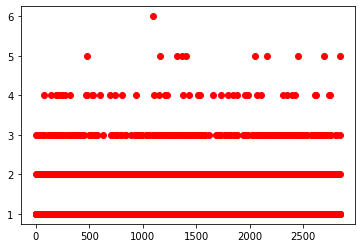

In [92]:
plt.plot(sound_dist,'ro')
plt.show()

In [108]:
word_in_edit = []
for w in list(graph_data["word"]) : 
    if w in words_4_let : 
        word_in_edit.append(w)

In [110]:
sound_in_edit = {}

for w in word_in_edit : 
    sound_in_edit[w] = (str(sound_data[sound_data["word"]==w]['sound'].values[-1]))

In [111]:
print (len(sound_in_edit), len(word_in_edit))

1462 1462


In [112]:
print (len(set(sound_in_edit)))

1462


In [113]:
class FilterFunction(object) : 

    def __init__(self, word):
        self.word = word
        
    def filter_f(self,w) : 
        if self.word in w : 
            return w

In [114]:
sound_occurent = [len(list(filter(FilterFunction(sd).filter_f, sounds))) for sd in sound_in_edit ]

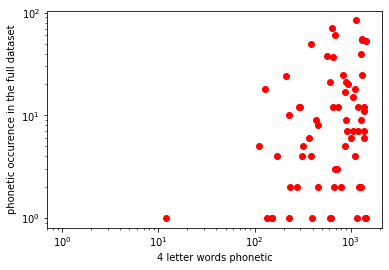

In [115]:
plt.loglog(sound_occurent,'ro')
plt.xlabel("4 letter words phonetic")
plt.ylabel("phonetic occurence in the full dataset")
plt.savefig("phonetic_occurence.png")
plt.show()

In [116]:
alphabets = words_4_let = [w for w in words if len(w)==1]

In [118]:
alphabet_sounds = []

for w in alphabets : 
    alphabet_sounds.append("u"+str(sound_data[sound_data["word"]==w]['sound'].values[-1]))

In [130]:
ipa_bases = pd.read_csv("ipa_bases.csv")
ipas = np.array(list(ipa_bases["ipa"]), dtype=str)

print(ipas, len(ipas))

['ʘ' 'ǀ' 'ǃ' 'ǂ' 'ǁ' 'k͡p' 'ɡ͡b' 'c' 'ɡ' 'k' 'q' 'ɖ' 'ɟ' 'ɠ' 'ɢ' 'ʄ' 'ʈ'
 'ʛ' 'b' 'b͡d' 'd' 'd̪' 'p' 'p͡t' 't' 't̪' 'ɓ' 'ɗ' 'b͡β' 'k͡x' 'p͡ɸ' 'q͡χ'
 'ɡ͡ɣ' 'ɢ͡ʁ' 'c͡ç' 'd͡ʒ' 't͡ʃ' 'ɖ͡ʐ' 'ɟ͡ʝ' 'ʈ͡ʂ' 'b͡v' 'd̪͡z̪' 'd̪͡ð'
 'd̪͡ɮ̪' 'd͡z' 'd͡ɮ' 'd͡ʑ' 'p͡f' 't̪͡s̪' 't̪͡ɬ̪' 't̪͡θ' 't͡s' 't͡ɕ' 't͡ɬ'
 'x' 'ç' 'ħ' 'ɣ' 'ʁ' 'ʂ' 'ʃ' 'ʐ' 'ʒ' 'ʕ' 'ʝ' 'χ' 'f' 's' 's̪' 'v' 'z'
 'z̪' 'ð' 'ɸ' 'β' 'θ' 'ɧ' 'ɕ' 'ɬ' 'ɬ̪' 'ɮ' 'ʑ' 'ɱ' 'ʔ' 'ŋ' 'ɳ' 'ɴ' 'm' 'n'
 'n̪' 'ɲ' 'ɥ' 'ɰ' 'ʋ' 'ʀ' 'ʙ' 'ʟ' 'ɭ' 'ɽ' 'ʎ' 'r' 'r̪' 'ɫ' 'ɺ' 'ɾ' 'ʍ' 'h'
 'j' 'w' 'ɹ' 'ɻ' 'l' 'l̪' 'ɦ' 'ɑ' 'ɘ' 'ɞ' 'ɤ' 'ɵ' 'ʉ' 'a' 'e' 'i' 'o' 'u'
 'y' 'æ' 'ø' 'œ' 'ɒ' 'ɔ' 'ə' 'ɘ' 'ɵ' 'ɞ' 'ɜ' 'ɛ' 'ɨ' 'ɪ' 'ɯ' 'ɶ' 'ʊ' 'ɐ'
 'ʌ' 'ʏ'] 145


In [120]:
ipa_frequencies = {}
for ipa in ipas : 
    freq = list(filter(FilterFunction(ipa).filter_f, sound_in_edit.values()) )
    if len(freq) >0 : 
        ipa_frequencies[ipa] = float(len(freq))

In [121]:
print (ipa_frequencies.values())

dict_values([103.0, 259.0, 156.0, 269.0, 215.0, 334.0, 45.0, 39.0, 126.0, 310.0, 50.0, 211.0, 9.0, 10.0, 38.0, 198.0, 228.0, 158.0, 78.0, 55.0, 80.0, 330.0, 69.0, 134.0, 271.0, 99.0, 97.0, 142.0, 97.0, 84.0, 263.0, 33.0, 454.0, 205.0, 118.0])


In [122]:
a = "\xc9\x99"
b = 'nono'
print("the charactar is %s"% a)

the charactar is É


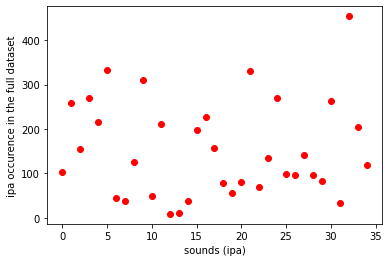

In [123]:
#plt.xticks(ipa_frequencies.values(), ipa_frequencies.keys())
plt.plot(ipa_frequencies.values(), 'ro')
plt.xlabel("sounds (ipa)")
plt.ylabel("ipa occurence in the full dataset")
#plt.savefig("phonetic_occurence.png")
plt.show()

In [124]:
sounds_probs = {}
for key in ipa_frequencies.keys(): 
    sounds_probs[key] = ipa_frequencies[key]/sum(ipa_frequencies.values())

In [125]:
phonetic_sounds = {}

for word in word_in_edit : 
    p = 1 
    for key in sounds_probs.keys(): 
        if key in sound_in_edit[word] : 
            p = p * sounds_probs[key]
    phonetic_sounds[word] = p 

In [126]:
plot_data_sds  = []
plot_data_degree  = []
dict_ = []

for key in phonetic_sounds.keys(): 
    plot_data_sds.append(phonetic_sounds[key])
    plot_data_degree.append(float(graph_data[graph_data['word']== key]['degree']))
    
    dict_.append([phonetic_sounds[key],float(graph_data[graph_data['word']== key]['degree'])])

In [127]:
print (len(plot_data_degree), len(plot_data_sds))

1462 1462


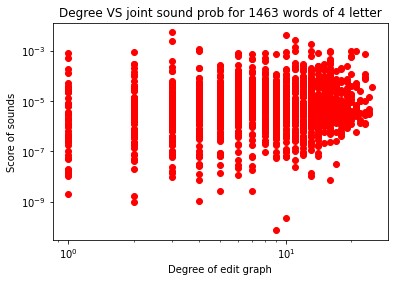

In [128]:
plt.loglog(plot_data_degree,plot_data_sds,'ro')
plt.ylabel("Score of sounds")
plt.xlabel("Degree of edit graph")

plt.title("Degree VS joint sound prob for 1463 words of 4 letter")
plt.savefig("log_phonetic_score.pdf")
plt.show()

In [74]:
medians = []
degrees = []
for degree in list(set(plot_data_degree)) : 
    list_ = []
    for lin in dict_ : 
        if lin[1] == degree : 
            list_.append(lin[0])
    medians.append(np.median(list_))
    degrees.append(degree)

In [75]:
print (len(medians), len(degrees))

25 25


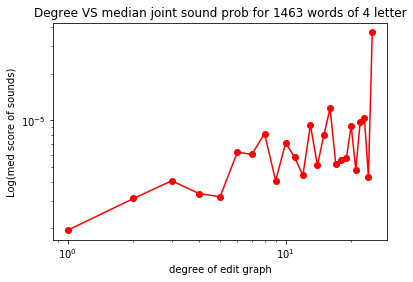

In [76]:
plt.loglog(degrees,medians,'r-o')
plt.ylabel("Log(med score of sounds)")
plt.xlabel("degree of edit graph")

plt.title("Degree VS median joint sound prob for 1463 words of 4 letter")
plt.savefig("log_median_ phonetic_score.pdf")
plt.show()

In [86]:
degrees = np.array(plot_data_degree)
medians = np.array(plot_data_sds)
correlation = np.sum((degrees - np.mean(degrees))*(medians- np.mean(medians))) / np.sum(np.sqrt(np.sum((degrees - np.mean(degrees))**2)*np.sum((medians- np.mean(medians))**2)))


In [87]:
print(correlation)

0.007925092549097928


In [79]:
print (medians)

[1.38218039e-06 1.37662852e-06 3.67440176e-04 ... 1.42665364e-06
 1.28134998e-05 3.84826483e-05]


# Conditional prob. of sound

- $M : N_s = N_s(\lambda)$, Where $\lambda$ is the phonetic score 

- Word --> [$X_i$]

- $\lambda = P(X_1)P(X_2|X_1) ... P(X_{n-1})P(X_n|X_{n-1})  $

- $P(X_i)$ is the frequency of sound $X_i$ in the data set of synonyms in English 

In [3]:
syn_data = pd.read_csv("freqVSSyn.csv")

syn_data

,Unnamed: 0,word,frequence,number_of_edges
0,0,fawn,761340.0,6.0
1,1,deferment,342709.0,1.0
2,2,woods,14647735.0,1.0
3,3,clotted,89781.0,4.0
4,4,hanging,10190519.0,6.0
...,...,...,...,...
20669,20669,rotting,606382.0,4.0
20670,20670,space,121505269.0,4.0
20671,20671,northerly,479948.0,4.0
20672,20672,untalented,36419.0,1.0


In [34]:
sound_data = pd.read_table("words.ipa.tsv")
#sound_data = sound_data.drop(sound_data['sound']==clear_sounds)

In [4]:
clean_data = []
tatal_ipa = []
for row in sound_data.values : 
    if (row[0] in syn_data['word'].values) : 
        clean_data.append(row)
        tatal_ipa = tatal_ipa + list(row[1])

In [5]:
len(set(tatal_ipa))

40

In [6]:
ipa_bases = pd.read_csv("ipa_bases.csv")
ipas = np.array(list(set(list(ipa_bases["ipa"])+tatal_ipa)), dtype=str)

print(ipas, len(ipas))

['ɒ' 't͡ʃ' 'ɧ' 'ɬ̪' 'c' 'θ' 'h' 'ʒ' 'ǃ' 'ʘ' 'ɬ' 'ɢ͡ʁ' 'n̪' 'd͡ʑ' 't͡s'
 'd͡z' 'ɘ' 't̪͡ɬ̪' 'ʄ' 'p͡t' 'ʈ' 'r' 'd' 'j' 'ɱ' 'ɯ' 'ʁ' 'x' 'ɹ' 'b͡v' 'ǁ'
 'ɡ' 'k͡p' 'ʃ' 'ɓ' 'ː' 'ʙ' 'p' 'ʝ' 'y' 'ɤ' ')' 'ʀ' 'ɟ͡ʝ' 'ɑ' 't' 's̪' 'ɥ'
 'ɨ' 'w' 'b͡β' 'ɐ' 'ʋ' 'ɗ' 'ʕ' 't̪͡θ' 'u' 'd̪͡z̪' 'ʂ' 'ɣ' 'a' 'd͡ʒ' 'ø'
 'k͡x' 't̪͡s̪' 'd͡ɮ' 'ð' 'χ' 'm' 'ŋ' 'æ' 'ɖ' 'ɮ' 's' 'ʛ' 'ʔ' 'ɻ' 'o' 't͡ɬ'
 'l̪' 't͡ɕ' 'ɵ' 'ɖ͡ʐ' 'ʐ' 'ɟ' 'ɸ' 'ʑ' 'ɪ' 'z̪' 'ʏ' 'ɠ' 'ǂ' 'ɔ' 'ɡ͡b' 'b͡d'
 'ħ' 'd̪' 'ˌ' 'ɶ' 'ɦ' 'r̪' 'ɺ' 't̪' 'k' 'ʟ' 'n' 'p͡f' 'ç' '(' 'ɲ' 'p͡ɸ'
 'e' 'ɰ' 'ʈ͡ʂ' 'ɛ' 'ʌ' 'ʎ' 'ɫ' 'ɾ' 'c͡ç' 'ɜ' 'z' 'ɭ' 'ɴ' 'ʍ' 'ɕ' 'ɞ' 'ɢ'
 'ʉ' 'œ' 'b' 'ə' 'd̪͡ð' 'd̪͡ɮ̪' 'i' 'q' 'f' 'ǀ' 'v' 'ˈ' 'ɳ' 'l' 'ʊ' 'ɽ'
 'q͡χ' 'ɡ͡ɣ' 'β'] 147


In [7]:
clean_sound_data = pd.DataFrame(clean_data, columns=['word', 'sound'])

In [8]:
class FilterFunction(object) : 

    def __init__(self, word):
        self.word = word
        
    def filter_f(self,w) : 
        if type(w) == str : 
            if self.word in list(w) : 
                return w
            
class FilterFunction2(object) : 

    def __init__(self, word):
        self.word = word
        
    def filter_f(self,w) : 
        if type(w) == str : 
            if self.word in w: 
                return w

In [9]:
ipa_frequencies = {}
for ipa in ipas : 
    freq = list(filter(FilterFunction(ipa).filter_f, clean_sound_data['sound'].values ))
    if len(freq) >0 : 
        ipa_frequencies[ipa] = float(len(freq))/93518.0

(array([14., 10.,  4.,  6.,  2.,  1.,  1.,  0.,  1.,  1.]),
 array([0.00085545, 0.01142775, 0.02200004, 0.03257234, 0.04314464,
        0.05371693, 0.06428923, 0.07486152, 0.08543382, 0.09600612,
        0.10657841]),
 <BarContainer object of 10 artists>)

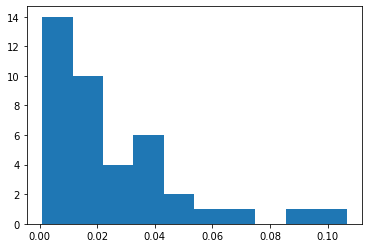

In [10]:
#sum(ipa_frequencies.values())
plt.hist(ipa_frequencies.values())

In [11]:
ipa_to_int = {}
keys = list(ipa_frequencies.keys())
for i in range(len(keys)) : 
    ipa_to_int[i] = keys[i]

In [12]:
ipa_to_int

{0: 'ɒ',
 1: 'θ',
 2: 'h',
 3: 'ʒ',
 4: 'r',
 5: 'd',
 6: 'j',
 7: 'ɡ',
 8: 'ʃ',
 9: 'ː',
 10: 'p',
 11: ')',
 12: 'ɑ',
 13: 't',
 14: 'w',
 15: 'u',
 16: 'a',
 17: 'ð',
 18: 'm',
 19: 'ŋ',
 20: 'æ',
 21: 's',
 22: 'ɪ',
 23: 'ɔ',
 24: 'ˌ',
 25: 'k',
 26: 'n',
 27: '(',
 28: 'e',
 29: 'ʌ',
 30: 'ɜ',
 31: 'z',
 32: 'b',
 33: 'ə',
 34: 'i',
 35: 'f',
 36: 'v',
 37: 'ˈ',
 38: 'l',
 39: 'ʊ'}

In [13]:
M_ij= np.zeros((40,40))
total_freq = 0.
for i in range(40) : 
    for j in range(40) :
        ipa = str(ipa_to_int[i])+str(ipa_to_int[j])
        #print(ipa)
        freq = list(filter(FilterFunction2(ipa).filter_f, clean_sound_data['sound'].values ))
        total_freq += len(freq)
        M_ij[i,j] = float(len(freq))

In [14]:
total_freq

91291.0

In [16]:
M_ij = M_ij/total_freq

In [17]:
P_i = []
for i in range(40) : 
    P_i.append(ipa_frequencies[ipa_to_int[i]])

In [18]:
s1 = clean_sound_data['sound'].values[0]

In [19]:
print(list(s1), s1)

['b', 'a', 'ɪ'] baɪ


In [22]:
vect_w = []
for sym in list(s1) : 
    print('first sym:',list(s1)[0] ) 
    print (int_to_ipa[sym])
    vect_w.append(int_to_ipa[sym])

first sym: b
32
first sym: b
16
first sym: b
22


In [23]:
print(vect_w[0], vect_w, ipa_frequencies[ipa_to_int[vect_w[0]]])
for i in range(len(vect_w)-1) : 
    print((vect_w[i], vect_w[i+1]), M_ij[vect_w[i],vect_w[i+1]])

32 [32, 16, 22] 0.015889989093008833
(32, 16) 6.9594042630249095e-09
(16, 22) 1.4650745870954163e-07


In [24]:

int_to_ipa = {}
for i in range(40) : 
    int_to_ipa[ipa_to_int[i]] = i
    
def chainProb(s) : 
    w_sound = list(s)
    p= ipa_frequencies[w_sound[0]]
    for i in range(len(w_sound)-1) : 
        p = p*M_ij[int_to_ipa[w_sound[i]],int_to_ipa[w_sound[i+1]]]
        
    return p 

In [25]:
Probs = [] 
numberofSyn = []

for w in clean_sound_data['word'].values : 
    Probs.append(chainProb(clean_sound_data[clean_sound_data['word']==w]['sound'].values[0]))
    numberofSyn.append(syn_data[syn_data['word']==w]['number_of_edges'].values[0])

Text(0, 0.5, "Log(Sound's prob.)")

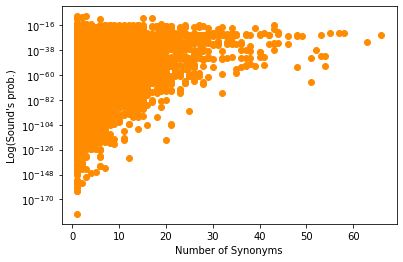

In [26]:
plt.yscale('log')
plt.scatter(numberofSyn, Probs, color='darkorange') 
plt.xlabel('Number of Synonyms')
plt.ylabel('Log(Sound\'s prob.)')
#plt.savefig('soundProb.pdf')

In [27]:
medians_prob = []
max_prob = []
min_prob = []
numberofSyn = np.array(numberofSyn)
Probs = np.array(Probs)
for ns in list(set(numberofSyn)) : 
    medians_prob.append(np.median(Probs[np.where(numberofSyn==ns)[0]]))
    max_prob.append(np.max(Probs[np.where(numberofSyn==ns)[0]]))
    min_prob.append(np.min(Probs[np.where(numberofSyn==ns)[0]]))
    

Text(0, 0.5, "Log(Median sound's prob.)")

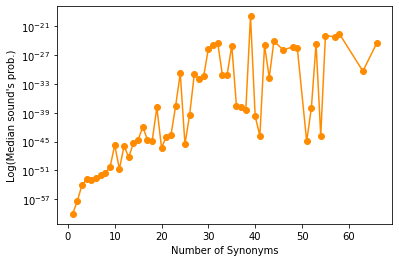

In [31]:
plt.yscale('log')
plt.plot(list(set(numberofSyn)), medians_prob, 'o-',color='darkorange')
#plt.fill_between(list(set(numberofSyn)), (min_prob), (max_prob), color='darkorange', alpha=.1)
plt.xlabel('Number of Synonyms')
plt.ylabel('Log(Median sound\'s prob.)')
#plt.savefig('soundProb_median.pdf') 

Text(0, 0.5, "Log(Median sound's prob.)")

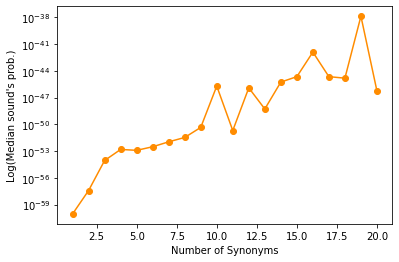

In [35]:
plt.yscale('log')
plt.plot(list(set(numberofSyn))[:20], medians_prob[:20], 'o-',color='darkorange')
#plt.fill_between(list(set(numberofSyn)), (min_prob), (max_prob), color='darkorange', alpha=.1)
plt.xlabel('Number of Synonyms')
plt.ylabel('Log(Median sound\'s prob.)')
#plt.savefig('soundProb_median.pdf') 